## MA0218 Mini-Project

#### Dataset 1 : World's Top Scientists (https://www.kaggle.com/datasets/carlmcbrideellis/worlds-100000-top-scientists/data)

Tutorial Group: MA4

Team Name: Pancakes

Team Members: Saha Aditi (U2323483L), Zhang Meijia (U2222089C), Cheng Jin Kit, Lloyd (U2320628G), Gao Wenbo (U2323420F)

### Question: How can our predictive model assist users in determining their relative running among top scientists and categorising them into distinct performance tiers?

In [50]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import warnings
warnings.filterwarnings('ignore')
sb.set() # set the default Seaborn style for graphics

In [52]:
scientistData = pd.read_csv('Top_scientists_2023.csv')
scientistData.head()
scientistData.shape

(217097, 47)

## Making Sense of the Data!

In [55]:
scientistData=scientistData.sort_values('rank')
placeholder = scientistData.pop('rank')
scientistData.insert(0, 'rank', placeholder)
scientistData.head()

rank            authfull                                  inst_name cntry  \
1     1     Wang, Zhong Lin                Chinese Academy of Sciences   chn   
0     2   Graetzel, Michael   École Polytechnique Fédérale de Lausanne   che   
2     3  Willett, Walter C.  Harvard T.H. Chan School of Public Health   usa   
3     4       Kresse, Georg                           Universität Wien   aut   
5     5       Friston, Karl                  University College London   gbr   

   np6023  firstyr  lastyr  rank (ns)  nc9623 (ns)  h23 (ns)  ...  nc9623_rw  \
1    2644     1986    2025          2       279327       250  ...        162   
0    1760     1971    2024          1       365234       270  ...        125   
2    2416     1970    2024          3       346654       306  ...        174   
3     388     1992    2024          4       297085       109  ...         34   
5    1270     1989    2024          6       188600       200  ...         45   

                  sm-subfield-1  sm-subfield-1-frac            sm-subfield-2  \
1  Nanoscience & Nanotechnology            0.576952                Materials   
0  Nanoscience & Nanotechnology            0.200796         Chemical Physics   
2                  Epidemiology            0.189627    Nutrition & Dietetics   
3               Applied Physics            0.420103         Chemical Physics   
5      Neurology & Neurosurgery            0.513428  Experimental Psychology   

   sm-subfield-2-frac                           sm-field  sm-field-frac  \
1            0.101971  Enabling & Strategic Technologies       0.739955   
0            0.123436  Enabling & Strategic Technologies       0.410694   
2            0.164315                  Clinical Medicine       0.529461   
3            0.252577                Physics & Astronomy       0.884021   
5            0.113744                  Clinical Medicine       0.672986   

   rank sm-subfield-1  rank sm-subfield-1 (ns)  sm-subfield-1 count  
1                   1                        2               135958  
0                   2                        1               135958  
2                   1                        1                 9875  
3                   1                        1               304738  
5                   1                        1               341636  

[5 rows x 47 columns]

In [57]:
#Cutting to top 100k 
sci100k_Data = scientistData[:-117097]
sci100k_Data.head(20)

rank               authfull  \
1      1        Wang, Zhong Lin   
0      2      Graetzel, Michael   
2      3     Willett, Walter C.   
3      4          Kresse, Georg   
5      5          Friston, Karl   
4      6     Kessler, Ronald C.   
7      7       McEwen, Bruce S.   
10     8       Barnes, Peter J.   
6      9     Altman, Douglas G.   
8     10  Whitesides, George M.   
9     11         Witten, Edward   
11    12        Perdew, John P.   
13    13           Ridker, Paul   
12    14       Halliwell, Barry   
17    15           Yusuf, Salim   
21    16   Ioannidis, John P.A.   
14    17         Karin, Michael   
16    18      Semenza, Gregg L.   
18    19           Libby, Peter   
19    20         Langer, Robert   

                                         inst_name cntry  np6023  firstyr  \
1                      Chinese Academy of Sciences   chn    2644     1986   
0         École Polytechnique Fédérale de Lausanne   che    1760     1971   
2        Harvard T.H. Chan School of Public Health   usa    2416     1970   
3                                 Universität Wien   aut     388     1992   
5                        University College London   gbr    1270     1989   
4                           Harvard Medical School   usa    1098     1975   
7                           Rockefeller University   usa    1205     1959   
10               National Heart and Lung Institute   gbr    1872     1974   
6   University of Oxford Medical Sciences Division   gbr    1043     1972   
8             Harvard Faculty of Arts and Sciences   usa    1389     1962   
9                     Institute for Advanced Study   usa     319     1970   
11                               Tulane University   usa     351     1970   
13                          Harvard Medical School   usa    1189     1985   
12                National University of Singapore   sgp     724     1965   
17                             McMaster University   can    1584     1979   
21                             Stanford University   usa    1384     1994   
14                 UC San Diego School of Medicine   usa     710     1979   
16     Johns Hopkins University School of Medicine   usa     492     1984   
18                    Brigham and Women's Hospital   usa     970     1972   
19           Massachusetts Institute of Technology   usa    1849     1974   

    lastyr  rank (ns)  nc9623 (ns)  h23 (ns)  ...  nc9623_rw  \
1     2025          2       279327       250  ...        162   
0     2024          1       365234       270  ...        125   
2     2024          3       346654       306  ...        174   
3     2024          4       297085       109  ...         34   
5     2024          6       188600       200  ...         45   
4     2024          5       267255       237  ...         69   
7     2023          8       153846       190  ...         45   
10    2024         11       146952       186  ...        201   
6     2024          7       566794       254  ...        318   
8     2023          9       244615       223  ...         68   
9     2024         10       101514       137  ...         20   
11    2024         12       300498        92  ...         72   
13    2024         14       214130       214  ...        114   
12    2024         13       113708       156  ...        100   
17    2024         18       254242       230  ...        125   
21    2024         22       242211       175  ...        169   
14    2024         15       208736       226  ...        488   
16    2024         17       120758       167  ...        337   
18    2024         19       161034       197  ...        139   
19    2024         20       243723       240  ...        170   

                         sm-subfield-1  sm-subfield-1-frac  \
1         Nanoscience & Nanotechnology            0.576952   
0         Nanoscience & Nanotechnology            0.200796   
2                         Epidemiology            0.189627   
3                      Applied Physics            0.42010

In [59]:
sci100k_Data.columns

Index(['rank', 'authfull', 'inst_name', 'cntry', 'np6023', 'firstyr', 'lastyr',
       'rank (ns)', 'nc9623 (ns)', 'h23 (ns)', 'hm23 (ns)', 'nps (ns)',
       'ncs (ns)', 'cpsf (ns)', 'ncsf (ns)', 'npsfl (ns)', 'ncsfl (ns)',
       'c (ns)', 'npciting (ns)', 'cprat (ns)', 'np6023 cited9623 (ns)',
       'self%', 'nc9623', 'h23', 'hm23', 'nps', 'ncs', 'cpsf', 'ncsf', 'npsfl',
       'ncsfl', 'c', 'npciting', 'cprat', 'np6023 cited9623', 'np6023_rw',
       'nc9623_to_rw', 'nc9623_rw', 'sm-subfield-1', 'sm-subfield-1-frac',
       'sm-subfield-2', 'sm-subfield-2-frac', 'sm-field', 'sm-field-frac',
       'rank sm-subfield-1', 'rank sm-subfield-1 (ns)', 'sm-subfield-1 count'],
      dtype='object')

In [61]:
sci100k_Data.isna().sum()

rank                         0
authfull                     0
inst_name                  140
cntry                      391
np6023                       0
firstyr                      0
lastyr                       0
rank (ns)                    0
nc9623 (ns)                  0
h23 (ns)                     0
hm23 (ns)                    0
nps (ns)                     0
ncs (ns)                     0
cpsf (ns)                    0
ncsf (ns)                    0
npsfl (ns)                   0
ncsfl (ns)                   0
c (ns)                       0
npciting (ns)                0
cprat (ns)                   0
np6023 cited9623 (ns)        0
self%                        0
nc9623                       0
h23                          0
hm23                         0
nps                          0
ncs                          0
cpsf                         0
ncsf                         0
npsfl                        0
ncsfl                        0
c                            0
npciting

In our problem, we will be working with data regarding all citations! As such, we are removing those that exclude self-citations. We are also removing any strings in the dataset, as they do not help with the data analysis. 

In [64]:
#restrict to "self-citations excluded" dataset
sci100k = sci100k_Data.drop(['authfull', 'inst_name', 'cntry', 'rank (ns)', 'nc9623 (ns)', 'h23 (ns)', 'hm23 (ns)', 'nps (ns)',
       'ncs (ns)', 'cpsf (ns)', 'ncsf (ns)', 'npsfl (ns)', 'ncsfl (ns)',
       'c (ns)', 'npciting (ns)', 'cprat (ns)', 'np6023 cited9623 (ns)', 'sm-subfield-1', 'sm-subfield-2','sm-subfield-1 count','rank sm-subfield-1','rank sm-subfield-1 (ns)', 'sm-subfield-1-frac', 'sm-subfield-2-frac'], axis = 1)
sci100k.head(20)

rank  np6023  firstyr  lastyr   self%  nc9623  h23        hm23  nps  \
1      1    2644     1986    2025  0.1475  327659  275  140.601151  115   
0      2    1760     1971    2024  0.0692  392395  281  120.981965   59   
2      3    2416     1970    2024  0.0917  381657  320  127.503846  123   
3      4     388     1992    2024  0.0203  303251  117   51.704883    6   
5      5    1270     1989    2024  0.1035  210372  215  114.742940  100   
4      6    1098     1975    2024  0.0613  284705  249   89.943757   39   
7      7    1205     1959    2023  0.0803  167287  197  115.902036  131   
10     8    1872     1974    2024  0.1055  164276  198  122.940230  380   
6      9    1043     1972    2024  0.0271  582575  258  108.470949   77   
8     10    1389     1962    2023  0.0520  258023  229  117.547785   41   
9     11     319     1970    2024  0.0125  102804  139  110.750000  155   
11    12     351     1970    2024  0.0178  305935   96   52.044517   20   
13    13    1189     1985    2024  0.1123  241223  227   85.178819  101   
12    14     724     1965    2024  0.0448  119040  161  103.560022  135   
17    15    1584     1979    2024  0.0856  278028  240   67.885919   60   
21    16    1384     1994    2024  0.0665  259475  188   96.906619  188   
14    17     710     1979    2024  0.0446  218486  233   94.660958   34   
16    18     492     1984    2024  0.0698  129826  173   94.598641  113   
18    19     970     1972    2024  0.0768  174438  207   92.534459   86   
19    20    1849     1974    2024  0.0825  265647  254  114.978725   73   

      ncs  ...   ncsfl         c  npciting     cprat  np6023 cited9623  \
1   22775  ...  264116  5.580768    128016  2.559516              2461   
0   30508  ...  252230  5.569447    142509  2.753475              1688   
2   12742  ...  142359  5.496408    220721  1.729138              2253   
3   60117  ...  279757  5.460618    135764  2.233663               379   
5   20296  ...  146494  5.457504    105494  1.994161              1179   
4    7088  ...  204328  5.439991    181084  1.572226              1067   
7   28290  ...  109242  5.401436     89602  1.867001              1145   
10  27361  ...   99919  5.393041     92352  1.778803              1677   
6    5099  ...  237769  5.392896    428127  1.360753               970   
8   10005  ...  218129  5.381626    148677  1.735460              1324   
9   57996  ...  102699  5.360689     61574  1.669601               304   
11  21591  ...  291182  5.351241    224872  1.360485               337   
13   9698  ...  115956  5.340720    145762  1.654910              1125   
12  30784  ...   96150  5.329650     88857  1.339681               676   
17  12775  ...  139922  5.326278    181948  1.528063              1413   
21  19668  ...   81885  5.318902    211299  1.227999              1283   
14  10261  ...  169421  5.318819    142093  1.537627               679   
16  36364  ...   95610  5.317286     67359  1.927374               459   
18  19431  ...   89820  5.312114    109429  1.594075               899   
19   6541  ...  141351  5.311650    163970  1.620095              1644   

    np6023_rw  nc9623_to_rw  nc9623_rw                           sm-field  \
1           0             0        162  Enabling & Strategic Technologies   
0           1             8        125  Enabling & Strategic Technologies   
2           0             0        174                  Clinical Medicine   
3           0             0         34                Physics & Astronomy   
5           0             0         45                  Clinical Medicine   
4           0             0         69                  Clinical Medicine   
7           0             0         45                  Clinical Medicine   
10          3           400        201                  Clinical Medicine   
6           0             0        318                  Clinical Medicine   
8           0             0         68                          Chemistry   
9           0             

In [66]:
sci100k.isna().sum()

rank                0
np6023              0
firstyr             0
lastyr              0
self%               0
nc9623              0
h23                 0
hm23                0
nps                 0
ncs                 0
cpsf                0
ncsf                0
npsfl               0
ncsfl               0
c                   0
npciting            0
cprat               0
np6023 cited9623    0
np6023_rw           0
nc9623_to_rw        0
nc9623_rw           0
sm-field            0
sm-field-frac       0
dtype: int64

No empty cells from what we need!

In [69]:
sci100k.shape

(100000, 23)

In [71]:
sci100k.columns

Index(['rank', 'np6023', 'firstyr', 'lastyr', 'self%', 'nc9623', 'h23', 'hm23',
       'nps', 'ncs', 'cpsf', 'ncsf', 'npsfl', 'ncsfl', 'c', 'npciting',
       'cprat', 'np6023 cited9623', 'np6023_rw', 'nc9623_to_rw', 'nc9623_rw',
       'sm-field', 'sm-field-frac'],
      dtype='object')

In [73]:
##add in a feature actyr to reflect active years of research
sci100k['actyr'] = sci100k['lastyr'] - sci100k['firstyr']

##add in features npf (number of first authored papers) and ncf (total cites to first authored papers). 
#this is to create more features for us to analyse their correlation to rank
sci100k['npf'] = sci100k['cpsf'] - sci100k['nps']
sci100k['ncf'] = sci100k['ncsf'] - sci100k['ncs']

##we can also remove firstyr and lastyr since we have created actyr
sci100k = sci100k.drop(['firstyr', 'lastyr'], axis = 1)

In [75]:
sci100k.shape

(100000, 24)

In [77]:
sci100k.columns

Index(['rank', 'np6023', 'self%', 'nc9623', 'h23', 'hm23', 'nps', 'ncs',
       'cpsf', 'ncsf', 'npsfl', 'ncsfl', 'c', 'npciting', 'cprat',
       'np6023 cited9623', 'np6023_rw', 'nc9623_to_rw', 'nc9623_rw',
       'sm-field', 'sm-field-frac', 'actyr', 'npf', 'ncf'],
      dtype='object')

For easier visualisation, we split the dataset into 4 parts prior to creating correlation heatmaps!
We will look for features that have a correlation of at least 0.3 as the more important features.

rank    np6023     self%    nc9623       h23      hm23       nps
rank    1.000000 -0.385795  0.101506 -0.589964 -0.556322 -0.708207 -0.316197
np6023 -0.385795  1.000000  0.368955  0.631479  0.717666  0.617498  0.089804
self%   0.101506  0.368955  1.000000  0.017300  0.190025  0.120677 -0.134919
nc9623 -0.589964  0.631479  0.017300  1.000000  0.904265  0.498693 -0.157100
h23    -0.556322  0.717666  0.190025  0.904265  1.000000  0.616353 -0.167192
hm23   -0.708207  0.617498  0.120677  0.498693  0.616353  1.000000  0.225978
nps    -0.316197  0.089804 -0.134919 -0.157100 -0.167192  0.225978  1.000000

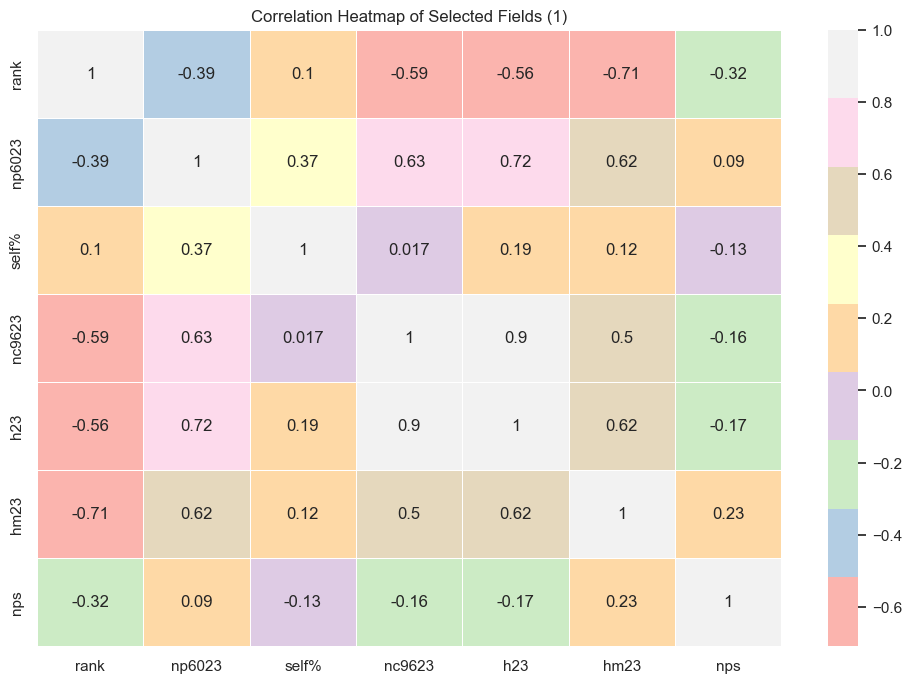

In [80]:
sci100k_1 = pd.DataFrame(sci100k[['rank','np6023', 'self%', 'nc9623', 'h23', 'hm23', 'nps']])
plt.figure(figsize=(12, 8))
sb.heatmap(sci100k_1.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Fields (1)')
sci100k_1.corr(method = 'spearman')

rank       ncs      cpsf      ncsf     npsfl     ncsfl
rank   1.000000 -0.439636 -0.314196 -0.595491 -0.423960 -0.740371
ncs   -0.439636  1.000000  0.267563  0.336997 -0.038648 -0.003125
cpsf  -0.314196  0.267563  1.000000  0.370922  0.593057  0.090320
ncsf  -0.595491  0.336997  0.370922  1.000000  0.077082  0.482811
npsfl -0.423960 -0.038648  0.593057  0.077082  1.000000  0.498333
ncsfl -0.740371 -0.003125  0.090320  0.482811  0.498333  1.000000

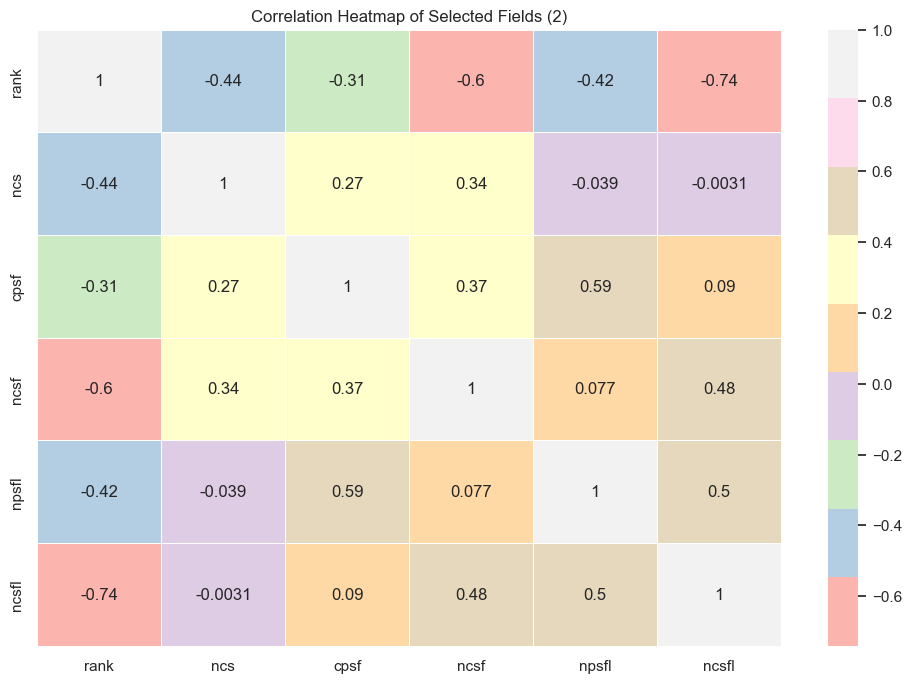

In [82]:
sci100k_2 = pd.DataFrame(sci100k[['rank', 'ncs', 'cpsf', 'ncsf', 'npsfl', 'ncsfl']])
plt.figure(figsize=(12, 8))
sb.heatmap(sci100k_2.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Fields (2)')
sci100k_2.corr(method = 'spearman')

Note: we are trying to create a feature that has a higher correlation score than c

rank         c  npciting     cprat  np6023 cited9623  \
rank              1.000000 -1.000000 -0.541968 -0.197232         -0.404062   
c                -1.000000  1.000000  0.541968  0.197232          0.404062   
npciting         -0.541968  0.541968  1.000000 -0.124809          0.609962   
cprat            -0.197232  0.197232 -0.124809  1.000000          0.210462   
np6023 cited9623 -0.404062  0.404062  0.609962  0.210462          1.000000   
np6023_rw        -0.068286  0.068286  0.121712  0.010127          0.136514   

                  np6023_rw  
rank              -0.068286  
c                  0.068286  
npciting           0.121712  
cprat              0.010127  
np6023 cited9623   0.136514  
np6023_rw          1.000000

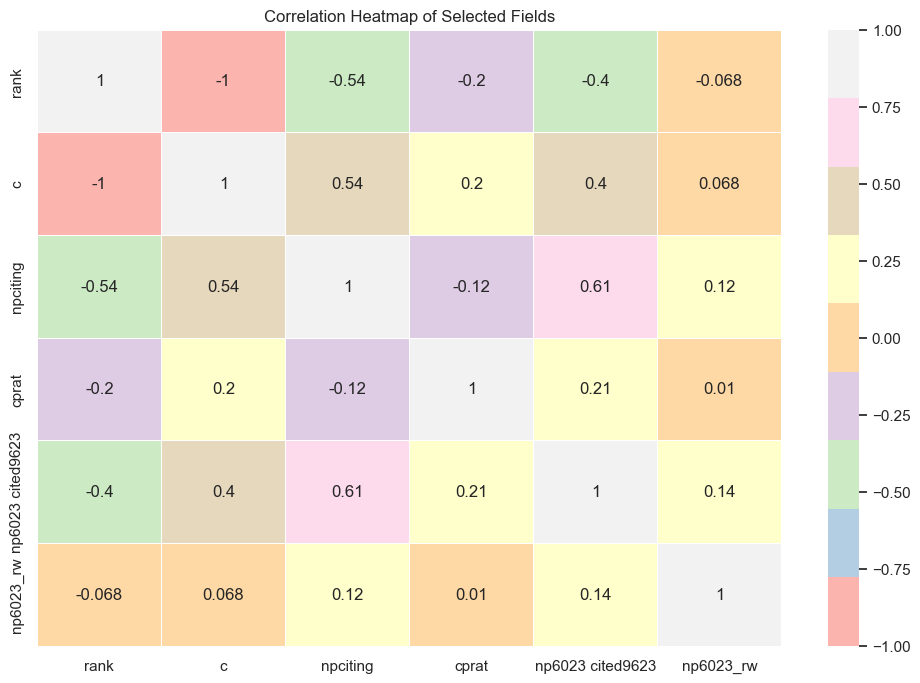

In [85]:
sci100k_3 = pd.DataFrame(sci100k[['rank', 'c', 'npciting', 'cprat', 'np6023 cited9623', 'np6023_rw']])
plt.figure(figsize=(12, 8))
sb.heatmap(sci100k_3.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Fields')
sci100k_3.corr(method = 'spearman')

rank  nc9623_to_rw  nc9623_rw  sm-field-frac       npf  \
rank           1.000000     -0.067875  -0.340271      -0.012860 -0.247780   
nc9623_to_rw  -0.067875      1.000000   0.224209      -0.026035  0.039870   
nc9623_rw     -0.340271      0.224209   1.000000      -0.024245  0.072677   
sm-field-frac -0.012860     -0.026035  -0.024245       1.000000  0.093760   
npf           -0.247780      0.039870   0.072677       0.093760  1.000000   
ncf           -0.456087      0.042220   0.246666       0.038750  0.462890   
actyr         -0.189919     -0.017805  -0.022026       0.052269  0.164040   

                    ncf     actyr  
rank          -0.456087 -0.189919  
nc9623_to_rw   0.042220 -0.017805  
nc9623_rw      0.246666 -0.022026  
sm-field-frac  0.038750  0.052269  
npf            0.462890  0.164040  
ncf            1.000000 -0.134664  
actyr         -0.134664  1.000000

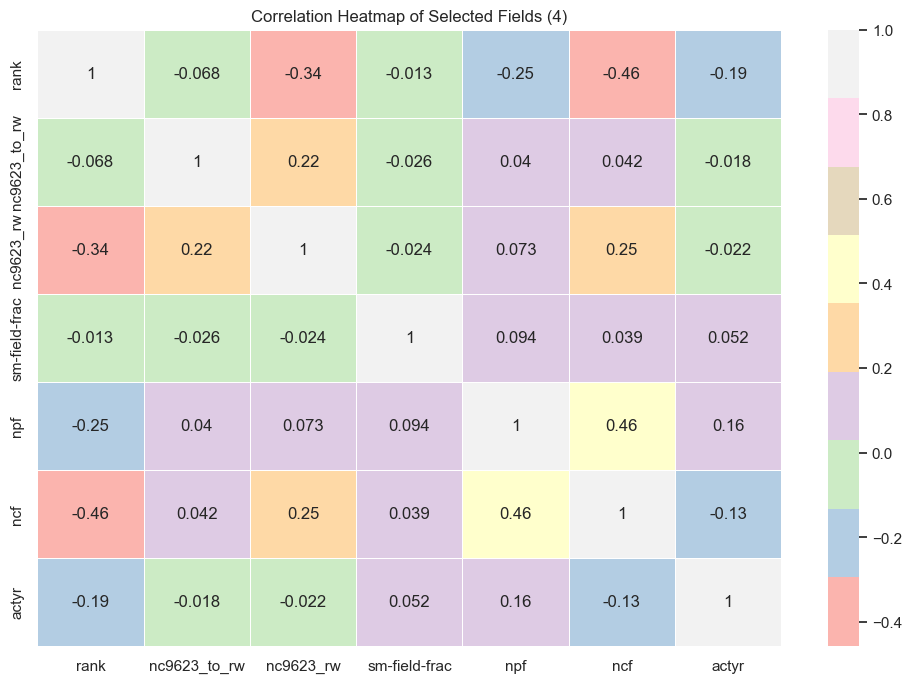

In [87]:
sci100k_4 = pd.DataFrame(sci100k[['rank', 'nc9623_to_rw', 'nc9623_rw', 'sm-field-frac', 'npf', 'ncf', 'actyr']])
plt.figure(figsize=(12, 8))
sb.heatmap(sci100k_4.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Fields (4)')
sci100k_4.corr(method = 'spearman')

From analysing the 4 heatmaps above, here is a DataFrame solely consisting of features having a correlation of at least 0.3. We have removed 'ncf' as it is derived off 'ncsf', but has a lower correlation score.

In [90]:
sci100k_impt = pd.DataFrame(sci100k[['rank', 'np6023', 'nc9623', 'h23', 'hm23', 'ncsf', 'npsfl', 'ncsfl', 'npciting', 'np6023 cited9623']])

In [92]:
sci100k_impt.head()

rank  np6023  nc9623  h23        hm23    ncsf  npsfl   ncsfl  npciting  \
1     1    2644  327659  275  140.601151   41009   1966  264116    128016   
0     2    1760  392395  281  120.981965   32280    943  252230    142509   
2     3    2416  381657  320  127.503846   37917    826  142359    220721   
3     4     388  303251  117   51.704883  260685    194  279757    135764   
5     5    1270  210372  215  114.742940   75496    752  146494    105494   

   np6023 cited9623  
1              2461  
0              1688  
2              2253  
3               379  
5              1179

rank    np6023    nc9623       h23      hm23      ncsf  \
rank              1.000000 -0.385795 -0.589964 -0.556322 -0.708207 -0.595491   
np6023           -0.385795  1.000000  0.631479  0.717666  0.617498  0.012650   
nc9623           -0.589964  0.631479  1.000000  0.904265  0.498693  0.265838   
h23              -0.556322  0.717666  0.904265  1.000000  0.616353  0.154373   
hm23             -0.708207  0.617498  0.498693  0.616353  1.000000  0.242053   
ncsf             -0.595491  0.012650  0.265838  0.154373  0.242053  1.000000   
npsfl            -0.423960  0.826406  0.360165  0.443799  0.696936  0.077082   
ncsfl            -0.740371  0.455063  0.734303  0.656906  0.652191  0.482811   
npciting         -0.541968  0.584921  0.970397  0.844859  0.426217  0.245145   
np6023 cited9623 -0.404062  0.992236  0.661813  0.755017  0.639662  0.019016   

                     npsfl     ncsfl  npciting  np6023 cited9623  
rank             -0.423960 -0.740371 -0.541968         -0.404062  
np6023            0.826406  0.455063  0.584921          0.992236  
nc9623            0.360165  0.734303  0.970397          0.661813  
h23               0.443799  0.656906  0.844859          0.755017  
hm23              0.696936  0.652191  0.426217          0.639662  
ncsf              0.077082  0.482811  0.245145          0.019016  
npsfl             1.000000  0.498333  0.319109          0.800301  
ncsfl             0.498333  1.000000  0.691956          0.478093  
npciting          0.319109  0.691956  1.000000          0.609962  
np6023 cited9623  0.800301  0.478093  0.609962          1.000000

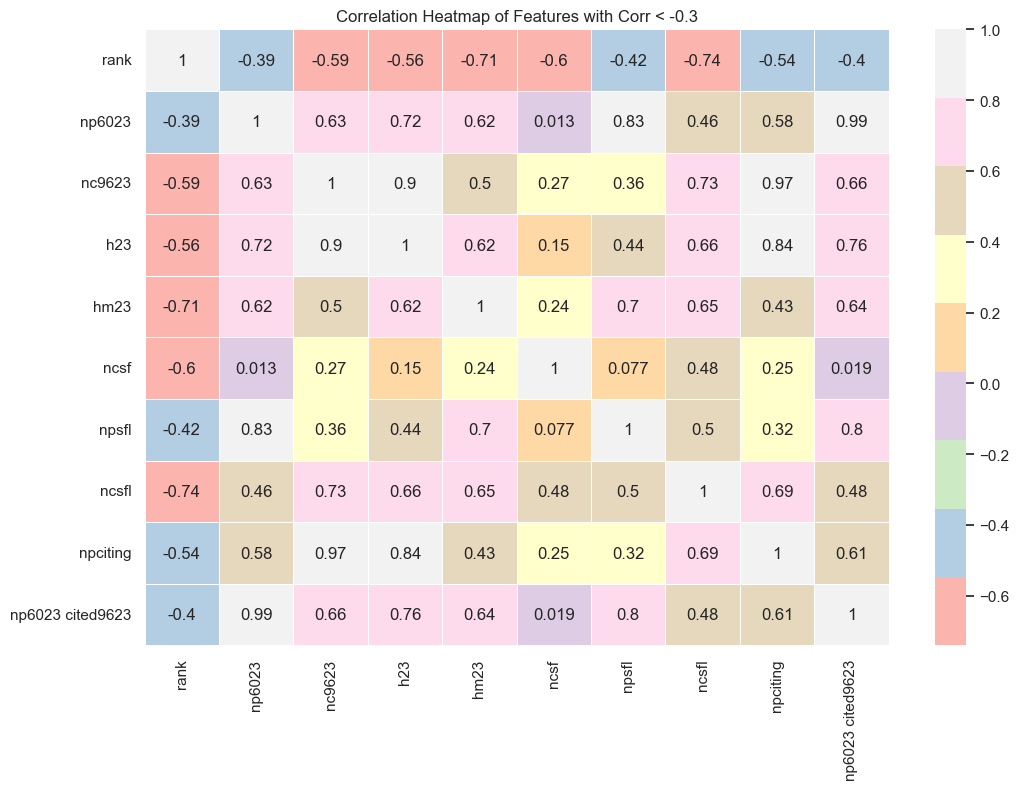

In [94]:
plt.figure(figsize=(12, 8))
sb.heatmap(sci100k_impt.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Features with Corr < -0.3')
sci100k_impt.corr(method = 'spearman')

In [96]:
sci100k_impt.isna().sum()

rank                0
np6023              0
nc9623              0
h23                 0
hm23                0
ncsf                0
npsfl               0
ncsfl               0
npciting            0
np6023 cited9623    0
dtype: int64

In [98]:
sci100k.isna().sum()

rank                0
np6023              0
self%               0
nc9623              0
h23                 0
hm23                0
nps                 0
ncs                 0
cpsf                0
ncsf                0
npsfl               0
ncsfl               0
c                   0
npciting            0
cprat               0
np6023 cited9623    0
np6023_rw           0
nc9623_to_rw        0
nc9623_rw           0
sm-field            0
sm-field-frac       0
actyr               0
npf                 0
ncf                 0
dtype: int64

rank    np6023    nc9623       h23      hm23      ncsf  \
rank              1.000000 -0.363001 -0.448576 -0.550120 -0.674423 -0.409117   
np6023           -0.363001  1.000000  0.579356  0.686048  0.616074  0.127426   
nc9623           -0.448576  0.579356  1.000000  0.822145  0.521919  0.454492   
h23              -0.550120  0.686048  0.822145  1.000000  0.694814  0.251811   
hm23             -0.674423  0.616074  0.521919  0.694814  1.000000  0.327150   
ncsf             -0.409117  0.127426  0.454492  0.251811  0.327150  1.000000   
npsfl            -0.376460  0.835592  0.346932  0.437335  0.653194  0.155319   
ncsfl            -0.513475  0.429476  0.743291  0.624433  0.654939  0.665660   
npciting         -0.414864  0.517352  0.969007  0.753501  0.448728  0.442090   
np6023 cited9623 -0.379587  0.988717  0.612353  0.725684  0.642685  0.137110   

                     npsfl     ncsfl  npciting  np6023 cited9623  
rank             -0.376460 -0.513475 -0.414864         -0.379587  
np6023            0.835592  0.429476  0.517352          0.988717  
nc9623            0.346932  0.743291  0.969007          0.612353  
h23               0.437335  0.624433  0.753501          0.725684  
hm23              0.653194  0.654939  0.448728          0.642685  
ncsf              0.155319  0.665660  0.442090          0.137110  
npsfl             1.000000  0.458612  0.300997          0.798791  
ncsfl             0.458612  1.000000  0.694412          0.452475  
npciting          0.300997  0.694412  1.000000          0.545098  
np6023 cited9623  0.798791  0.452475  0.545098          1.000000

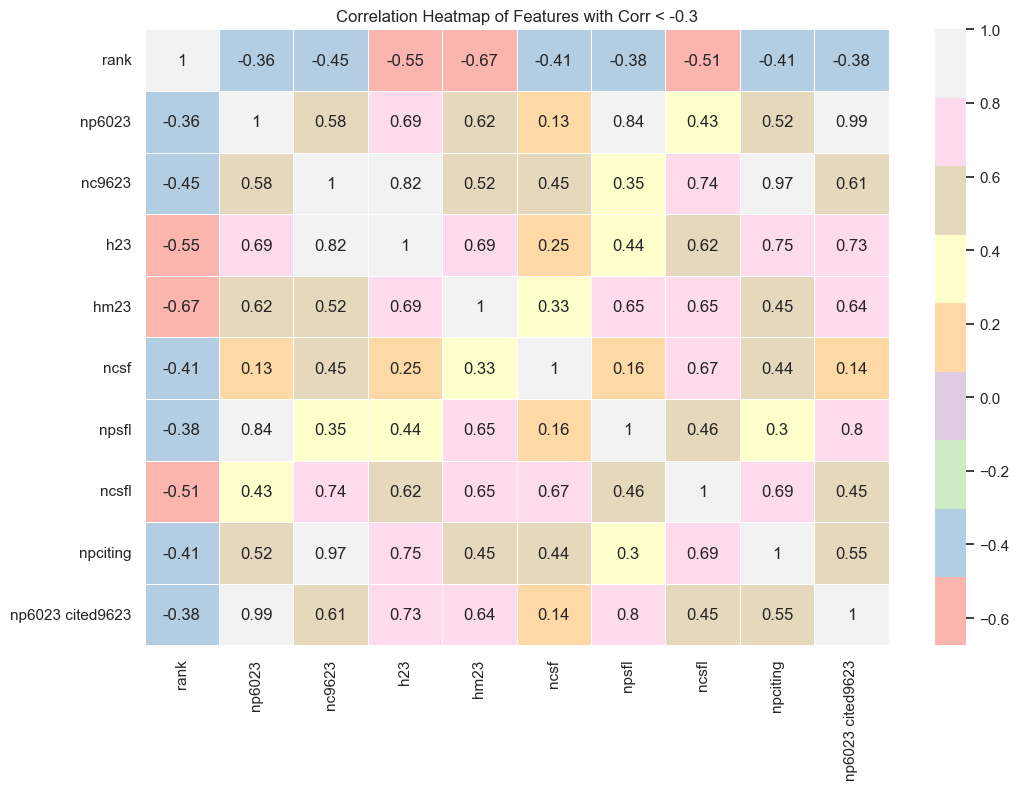

In [100]:
##other corr methods:
plt.figure(figsize=(12, 8))
sb.heatmap(sci100k_impt.corr(method = 'pearson'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Features with Corr < -0.3')
sci100k_impt.corr(method = 'pearson')

rank    np6023    nc9623       h23      hm23      ncsf  \
rank              1.000000 -0.264338 -0.421788 -0.397318 -0.524823 -0.425807   
np6023           -0.264338  1.000000  0.453287  0.534743  0.442689  0.005453   
nc9623           -0.421788  0.453287  1.000000  0.763296  0.351740  0.178417   
h23              -0.397318  0.534743  0.763296  1.000000  0.446910  0.100425   
hm23             -0.524823  0.442689  0.351740  0.446910  1.000000  0.162056   
ncsf             -0.425807  0.005453  0.178417  0.100425  0.162056  1.000000   
npsfl            -0.292088  0.651344  0.247070  0.312182  0.511842  0.050546   
ncsfl            -0.557652  0.315894  0.566083  0.491442  0.477595  0.345407   
npciting         -0.382568  0.415010  0.855200  0.675952  0.294875  0.165472   
np6023 cited9623 -0.277699  0.935776  0.479231  0.570020  0.461217  0.009371   

                     npsfl     ncsfl  npciting  np6023 cited9623  
rank             -0.292088 -0.557652 -0.382568         -0.277699  
np6023            0.651344  0.315894  0.415010          0.935776  
nc9623            0.247070  0.566083  0.855200          0.479231  
h23               0.312182  0.491442  0.675952          0.570020  
hm23              0.511842  0.477595  0.294875          0.461217  
ncsf              0.050546  0.345407  0.165472          0.009371  
npsfl             1.000000  0.348542  0.217339          0.620822  
ncsfl             0.348542  1.000000  0.522127          0.333727  
npciting          0.217339  0.522127  1.000000          0.435684  
np6023 cited9623  0.620822  0.333727  0.435684          1.000000

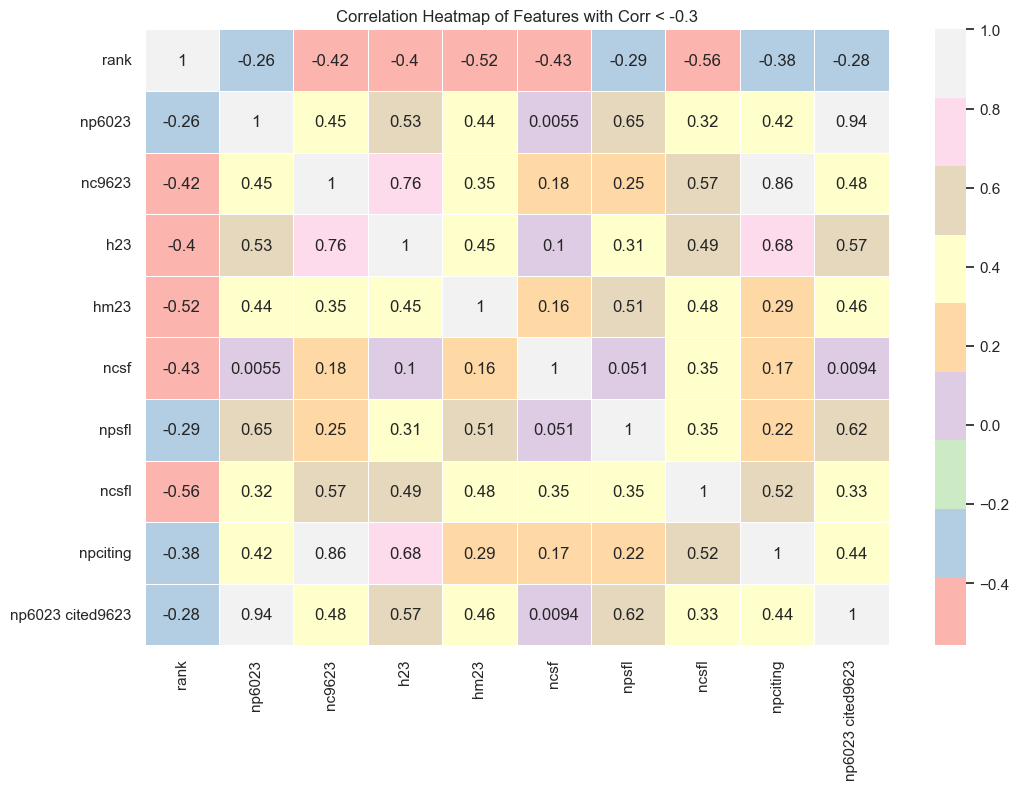

In [102]:
##other corr methods:
plt.figure(figsize=(12, 8))
sb.heatmap(sci100k_impt.corr(method = 'kendall'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Features with Corr < -0.3')
sci100k_impt.corr(method = 'kendall')

# Attempting to take reciprocals to find corr

In [104]:
scireci = pd.DataFrame(sci100k_impt['rank'])
scireci['renp6023'] = 1/sci100k_impt['np6023']
scireci['rehm23'] = 1/sci100k_impt['hm23']
scireci['renc9623'] = 1/sci100k_impt['nc9623']
scireci['rencsf'] = 1/sci100k_impt['ncsf']
scireci['renpsfl'] = 1/sci100k_impt['npsfl']
scireci['rencsfl'] = 1/sci100k_impt['ncsfl']
scireci['renpciting'] = 1/sci100k_impt['npciting']
scireci['renp6023 cited9623'] = 1/sci100k_impt['np6023 cited9623']

rank  renp6023    rehm23  renc9623    rencsf  \
rank                1.000000  0.385795  0.708207  0.589964  0.595491   
renp6023            0.385795  1.000000  0.617498  0.631479  0.012650   
rehm23              0.708207  0.617498  1.000000  0.498693  0.242053   
renc9623            0.589964  0.631479  0.498693  1.000000  0.265838   
rencsf              0.595491  0.012650  0.242053  0.265838  1.000000   
renpsfl             0.423960  0.826406  0.696936  0.360165  0.077082   
rencsfl             0.740371  0.455063  0.652191  0.734303  0.482811   
renpciting          0.541968  0.584921  0.426217  0.970397  0.245145   
renp6023 cited9623  0.404103  0.992236  0.639702  0.661855  0.019046   

                     renpsfl   rencsfl  renpciting  renp6023 cited9623  
rank                0.423960  0.740371    0.541968            0.404103  
renp6023            0.826406  0.455063    0.584921            0.992236  
rehm23              0.696936  0.652191    0.426217            0.639702  
renc9623            0.360165  0.734303    0.970397            0.661855  
rencsf              0.077082  0.482811    0.245145            0.019046  
renpsfl             1.000000  0.498333    0.319109            0.800323  
rencsfl             0.498333  1.000000    0.691956            0.478136  
renpciting          0.319109  0.691956    1.000000            0.610006  
renp6023 cited9623  0.800323  0.478136    0.610006            1.000000

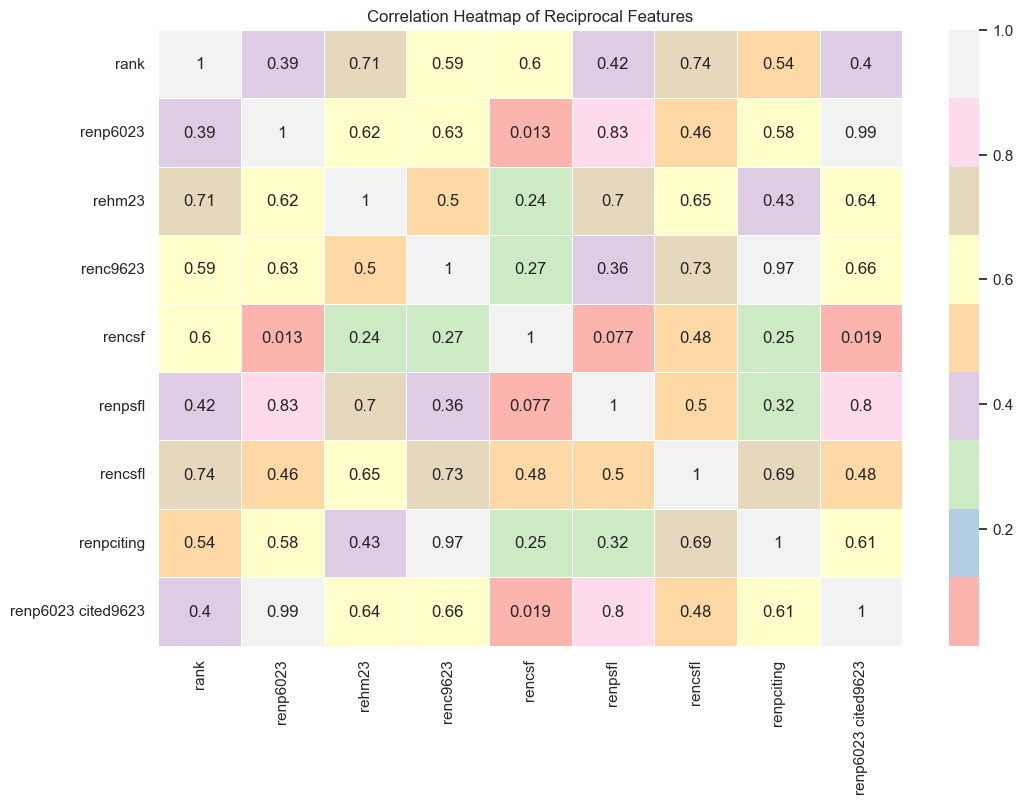

In [107]:
plt.figure(figsize=(12, 8))
sb.heatmap(scireci.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Reciprocal Features')
scireci.corr(method = 'spearman')

# Attempting to square root to find corr

In [110]:
scisqr = pd.DataFrame(sci100k_impt['rank'])
scisqr['sqnp6023'] = sci100k_impt['np6023'] **0.5
scisqr['sqhm23'] = sci100k_impt['hm23'] **0.5
scisqr['sqh23'] = sci100k_impt['h23'] **0.5

scisqr['sqnc9623'] = sci100k_impt['nc9623'] ** 0.5
scisqr['sqncsf'] = sci100k_impt['ncsf'] **0.5
scisqr['sqnpsfl'] = sci100k_impt['npsfl'] **0.5
scisqr['sqncsfl'] = sci100k_impt['ncsfl'] **0.5
scisqr['sqnpciting'] = sci100k_impt['npciting'] **0.5 
scisqr['sqnp6023 cited9623'] = sci100k_impt['np6023 cited9623']**0.5

rank  sqnp6023    sqhm23     sqh23  sqnc9623  \
rank                1.000000 -0.385795 -0.708207 -0.556322 -0.589964   
sqnp6023           -0.385795  1.000000  0.617498  0.717666  0.631479   
sqhm23             -0.708207  0.617498  1.000000  0.616353  0.498693   
sqh23              -0.556322  0.717666  0.616353  1.000000  0.904265   
sqnc9623           -0.589964  0.631479  0.498693  0.904265  1.000000   
sqncsf             -0.595491  0.012650  0.242053  0.154373  0.265838   
sqnpsfl            -0.423960  0.826406  0.696936  0.443799  0.360165   
sqncsfl            -0.740371  0.455063  0.652191  0.656906  0.734303   
sqnpciting         -0.541968  0.584921  0.426217  0.844859  0.970397   
sqnp6023 cited9623 -0.404062  0.992236  0.639662  0.755017  0.661813   

                      sqncsf   sqnpsfl   sqncsfl  sqnpciting  \
rank               -0.595491 -0.423960 -0.740371   -0.541968   
sqnp6023            0.012650  0.826406  0.455063    0.584921   
sqhm23              0.242053  0.696936  0.652191    0.426217   
sqh23               0.154373  0.443799  0.656906    0.844859   
sqnc9623            0.265838  0.360165  0.734303    0.970397   
sqncsf              1.000000  0.077082  0.482811    0.245145   
sqnpsfl             0.077082  1.000000  0.498333    0.319109   
sqncsfl             0.482811  0.498333  1.000000    0.691956   
sqnpciting          0.245145  0.319109  0.691956    1.000000   
sqnp6023 cited9623  0.019016  0.800301  0.478093    0.609962   

                    sqnp6023 cited9623  
rank                         -0.404062  
sqnp6023                      0.992236  
sqhm23                        0.639662  
sqh23                         0.755017  
sqnc9623                      0.661813  
sqncsf                        0.019016  
sqnpsfl                       0.800301  
sqncsfl                       0.478093  
sqnpciting                    0.609962  
sqnp6023 cited9623            1.000000

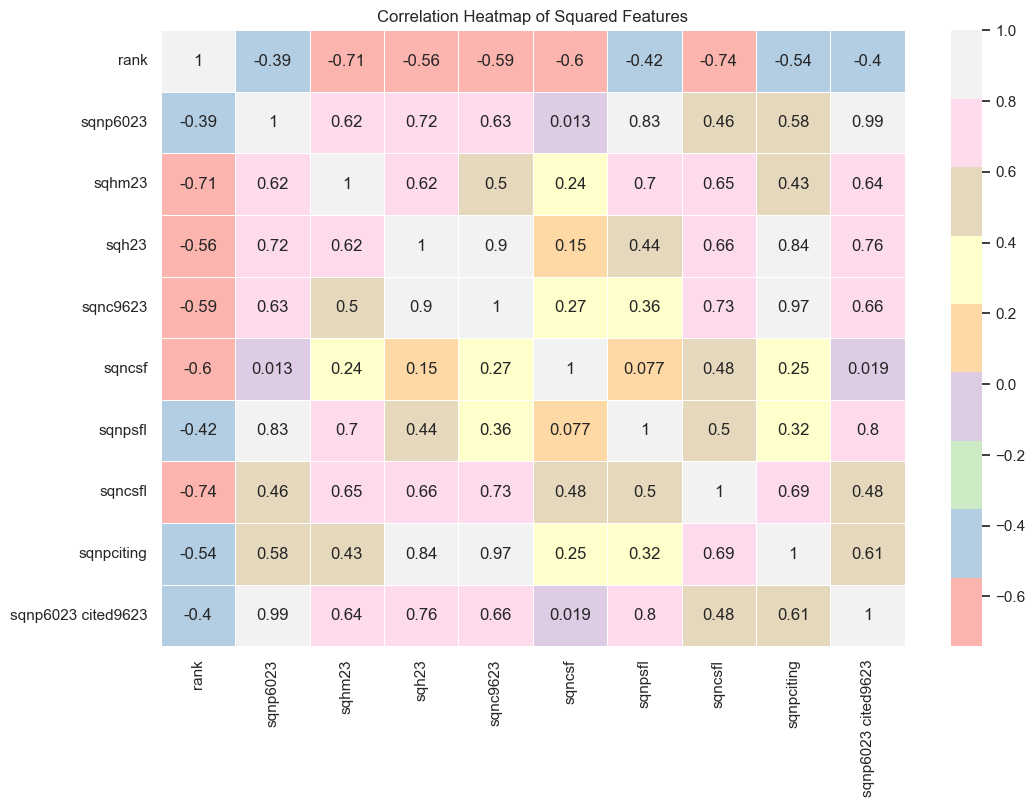

In [112]:
plt.figure(figsize=(12, 8))
sb.heatmap(scisqr.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Squared Features')
scisqr.corr(method = 'spearman')

## How about log10?

In [115]:
scilog = pd.DataFrame(sci100k_impt['rank'])
scilog['lognp6023'] = np.log10(sci100k_impt['np6023'])
scilog['loghm23'] = np.log10(sci100k_impt['hm23'])
scilog['logh23'] = np.log10(sci100k_impt['h23'])
scilog['lognc9623'] = np.log10(sci100k_impt['nc9623'])
scilog['logncsf'] = np.log10(sci100k_impt['ncsf'])
scilog['lognpsfl'] = np.log10(sci100k_impt['npsfl'])
scilog['logncsfl'] = np.log10(sci100k_impt['ncsfl'])
scilog['lognpciting'] = np.log10(sci100k_impt['npciting'])
scilog['lognp6023 cited9623'] = np.log10(sci100k_impt['np6023 cited9623'])

rank  lognp6023   loghm23    logh23  lognc9623  \
rank                 1.000000  -0.385795 -0.708207 -0.556322  -0.589964   
lognp6023           -0.385795   1.000000  0.617498  0.717666   0.631479   
loghm23             -0.708207   0.617498  1.000000  0.616353   0.498693   
logh23              -0.556322   0.717666  0.616353  1.000000   0.904265   
lognc9623           -0.589964   0.631479  0.498693  0.904265   1.000000   
logncsf             -0.595491   0.012650  0.242053  0.154373   0.265838   
lognpsfl            -0.423960   0.826406  0.696936  0.443799   0.360165   
logncsfl            -0.740371   0.455063  0.652191  0.656906   0.734303   
lognpciting         -0.541968   0.584921  0.426217  0.844859   0.970397   
lognp6023 cited9623 -0.404103   0.992236  0.639703  0.755018   0.661855   

                      logncsf  lognpsfl  logncsfl  lognpciting  \
rank                -0.595491 -0.423960 -0.740371    -0.541968   
lognp6023            0.012650  0.826406  0.455063     0.584921   
loghm23              0.242053  0.696936  0.652191     0.426217   
logh23               0.154373  0.443799  0.656906     0.844859   
lognc9623            0.265838  0.360165  0.734303     0.970397   
logncsf              1.000000  0.077082  0.482811     0.245145   
lognpsfl             0.077082  1.000000  0.498333     0.319109   
logncsfl             0.482811  0.498333  1.000000     0.691956   
lognpciting          0.245145  0.319109  0.691956     1.000000   
lognp6023 cited9623  0.019046  0.800323  0.478136     0.610006   

                     lognp6023 cited9623  
rank                           -0.404103  
lognp6023                       0.992236  
loghm23                         0.639703  
logh23                          0.755018  
lognc9623                       0.661855  
logncsf                         0.019046  
lognpsfl                        0.800323  
logncsfl                        0.478136  
lognpciting                     0.610006  
lognp6023 cited9623             1.000000

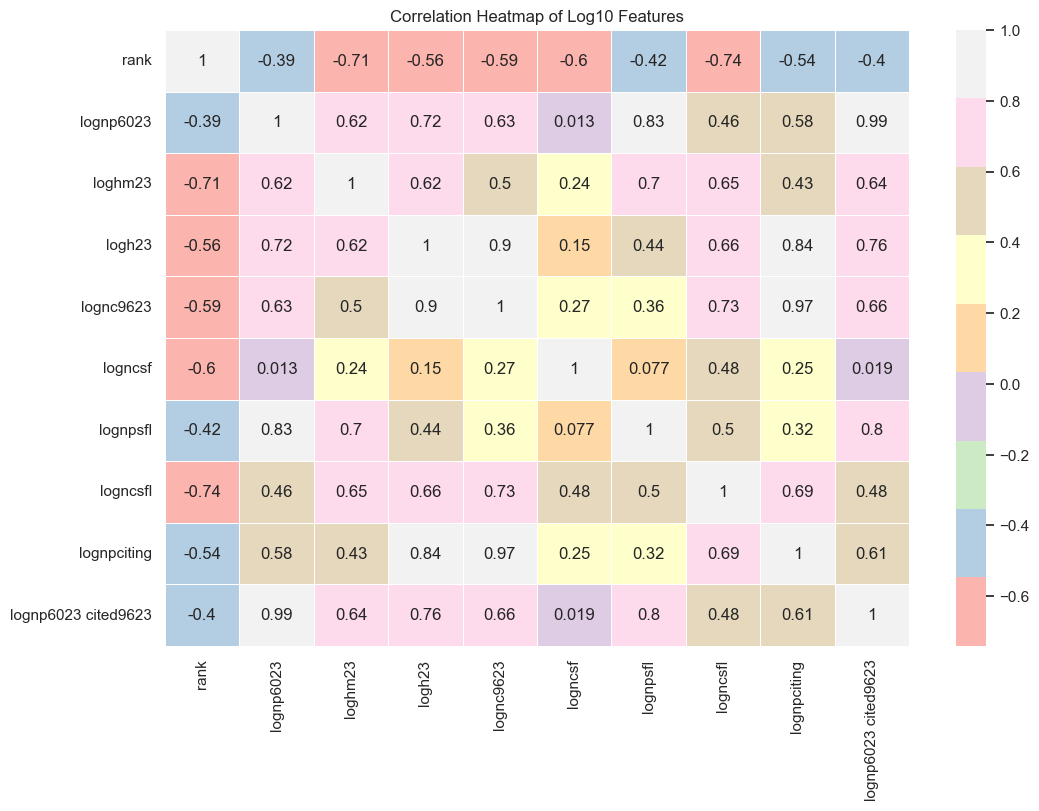

In [117]:
plt.figure(figsize=(12, 8))
sb.heatmap(scilog.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Log10 Features')
scilog.corr(method = 'spearman')

It seems that univariate "manipulation" does nothing for Spearman coefficient. Let's try multiplying stuff instead

# Multiply hm23 to everything

In [121]:
sci1 = pd.DataFrame(sci100k_impt['rank'])
sci1['anp6023'] = sci100k_impt['np6023'] * sci100k_impt['hm23']
sci1['ahm23'] = sci100k_impt['hm23']* sci100k_impt['hm23']
sci1['ah23'] = sci100k_impt['h23']* sci100k_impt['h23']
sci1['anc9623'] = sci100k_impt['nc9623']* sci100k_impt['hm23']
sci1['ancsf'] = sci100k_impt['ncsf'] * sci100k_impt['hm23']
sci1['anpsfl'] = sci100k_impt['npsfl']*  sci100k_impt['hm23']
sci1['ancsfl'] = sci100k_impt['ncsfl'] * sci100k_impt['hm23']
sci1['anpciting'] = sci100k_impt['npciting']* sci100k_impt['hm23']
sci1['anp6023 cited9623'] = sci100k_impt['np6023 cited9623']* sci100k_impt['hm23']

rank   anp6023     ahm23      ah23   anc9623     ancsf  \
rank               1.000000 -0.531652 -0.708207 -0.556322 -0.694763 -0.757470   
anp6023           -0.531652  1.000000  0.802918  0.748516  0.771561  0.343253   
ahm23             -0.708207  0.802918  1.000000  0.616353  0.706934  0.535355   
ah23              -0.556322  0.748516  0.616353  1.000000  0.923872  0.330011   
anc9623           -0.694763  0.771561  0.706934  0.923872  1.000000  0.470579   
ancsf             -0.757470  0.343253  0.535355  0.330011  0.470579  1.000000   
anpsfl            -0.550620  0.903528  0.847647  0.530328  0.608544  0.399315   
ancsfl            -0.792707  0.696231  0.825737  0.695754  0.827711  0.644301   
anpciting         -0.669013  0.735416  0.660322  0.892355  0.980016  0.445643   
anp6023 cited9623 -0.543877  0.995429  0.817285  0.772401  0.791423  0.351801   

                     anpsfl    ancsfl  anpciting  anp6023 cited9623  
rank              -0.550620 -0.792707  -0.669013          -0.543877  
anp6023            0.903528  0.696231   0.735416           0.995429  
ahm23              0.847647  0.825737   0.660322           0.817285  
ah23               0.530328  0.695754   0.892355           0.772401  
anc9623            0.608544  0.827711   0.980016           0.791423  
ancsf              0.399315  0.644301   0.445643           0.351801  
anpsfl             1.000000  0.727497   0.575339           0.889590  
ancsfl             0.727497  1.000000   0.797707           0.712101  
anpciting          0.575339  0.797707   1.000000           0.752306  
anp6023 cited9623  0.889590  0.712101   0.752306           1.000000

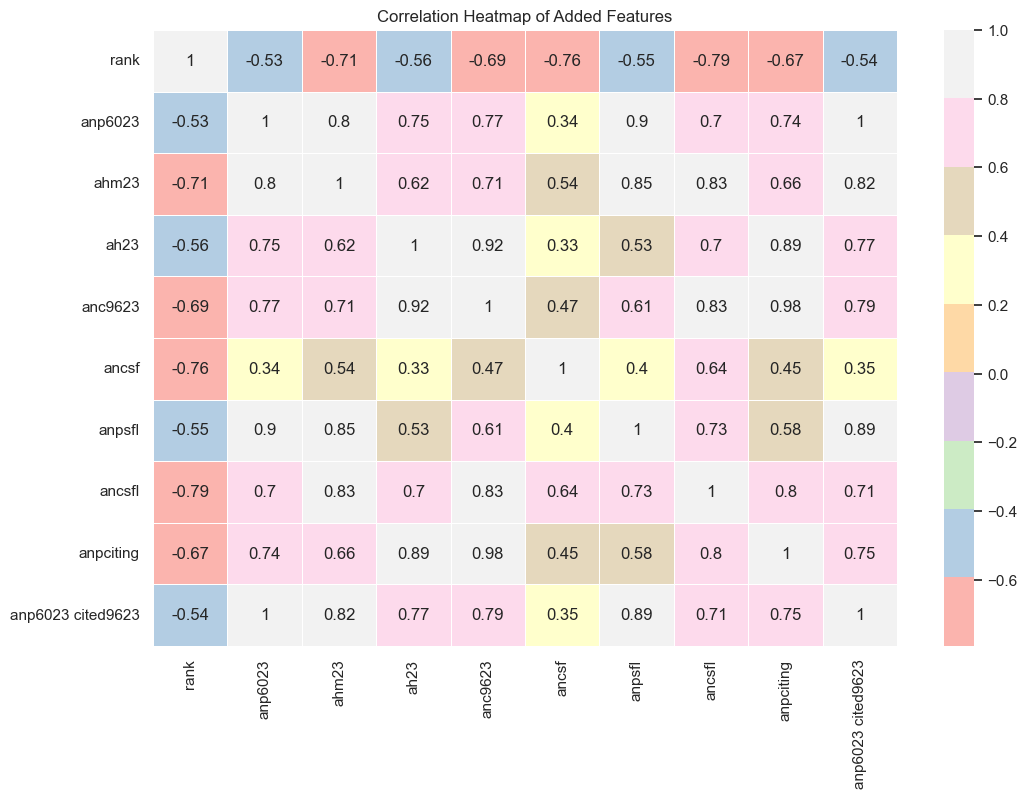

In [123]:
plt.figure(figsize=(12, 8))
sb.heatmap(sci1.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Added Features')
sci1.corr(method = 'spearman')

# Multiply h23 to everything

In [126]:
sci2 = pd.DataFrame(sci100k_impt['rank'])
sci2['anp6023'] = sci100k_impt['np6023'] * sci100k_impt['h23']
sci2['ahm23'] = sci100k_impt['hm23']* sci100k_impt['h23']
sci2['ah23'] = sci100k_impt['h23']* sci100k_impt['h23']
sci2['anc9623'] = sci100k_impt['nc9623']* sci100k_impt['h23']
sci2['ancsf'] = sci100k_impt['ncsf'] * sci100k_impt['h23']
sci2['anpsfl'] = sci100k_impt['npsfl']*  sci100k_impt['h23']
sci2['ancsfl'] = sci100k_impt['ncsfl'] * sci100k_impt['h23']
sci2['anpciting'] = sci100k_impt['npciting']* sci100k_impt['h23']
sci2['anp6023 cited9623'] = sci100k_impt['np6023 cited9623']* sci100k_impt['h23']

rank   anp6023     ahm23      ah23   anc9623     ancsf  \
rank               1.000000 -0.479319 -0.691868 -0.556322 -0.588233 -0.739961   
anp6023           -0.479319  1.000000  0.863946  0.875932  0.830496  0.413634   
ahm23             -0.691868  0.863946  1.000000  0.915103  0.853056  0.547875   
ah23              -0.556322  0.875932  0.915103  1.000000  0.956192  0.536656   
anc9623           -0.588233  0.830496  0.853056  0.956192  1.000000  0.586507   
ancsf             -0.739961  0.413634  0.547875  0.536656  0.586507  1.000000   
anpsfl            -0.547498  0.915619  0.838817  0.741419  0.690498  0.399786   
ancsfl            -0.730180  0.740414  0.867803  0.851803  0.880017  0.676726   
anpciting         -0.562755  0.803294  0.813097  0.927385  0.985892  0.564606   
anp6023 cited9623 -0.488161  0.996217  0.880399  0.894990  0.847096  0.425210   

                     anpsfl    ancsfl  anpciting  anp6023 cited9623  
rank              -0.547498 -0.730180  -0.562755          -0.488161  
anp6023            0.915619  0.740414   0.803294           0.996217  
ahm23              0.838817  0.867803   0.813097           0.880399  
ah23               0.741419  0.851803   0.927385           0.894990  
anc9623            0.690498  0.880017   0.985892           0.847096  
ancsf              0.399786  0.676726   0.564606           0.425210  
anpsfl             1.000000  0.744093   0.661337           0.903383  
ancsfl             0.744093  1.000000   0.854617           0.755887  
anpciting          0.661337  0.854617   1.000000           0.817828  
anp6023 cited9623  0.903383  0.755887   0.817828           1.000000

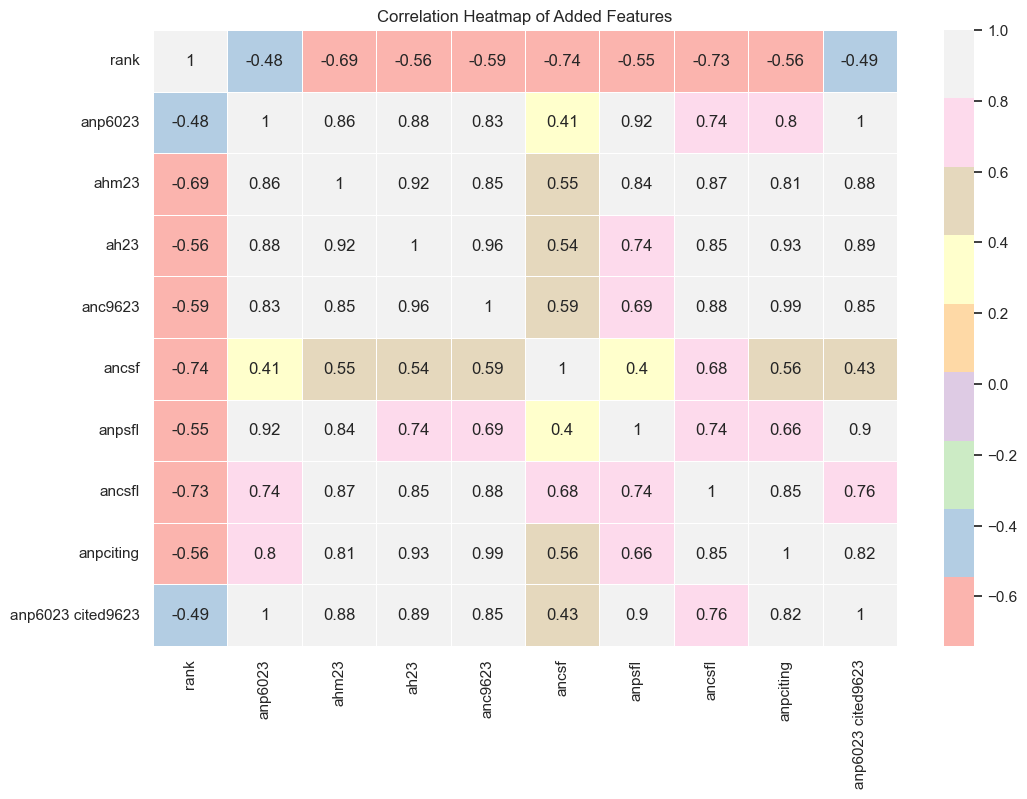

In [128]:
plt.figure(figsize=(12, 8))
sb.heatmap(sci2.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Added Features')
sci2.corr(method = 'spearman')

Let's try a new composite index, hcomp23, which is the product of h23 and hm23.

In [131]:
sci100k_impt['hcomp23'] = (sci100k_impt['hm23'] * sci100k_impt['h23'])

In [133]:
sci3 = pd.DataFrame(sci100k_impt['rank'])
sci3['hnp6023'] = sci100k_impt['np6023'] * sci100k_impt['hcomp23']
sci3['hnc9623'] = sci100k_impt['nc9623']* sci100k_impt['hcomp23']
sci3['hncsf'] = sci100k_impt['ncsf'] * sci100k_impt['hcomp23']
sci3['hnpsfl'] = sci100k_impt['npsfl']* sci100k_impt['hcomp23']
sci3['hncsfl'] = sci100k_impt['ncsfl'] * sci100k_impt['hcomp23']
sci3['hnpciting'] = sci100k_impt['npciting'] * sci100k_impt['hcomp23']
sci3['hnp6023 cited9623'] = sci100k_impt['np6023 cited9623']* sci100k_impt['hcomp23']

In [135]:
sci3.head()

rank       hnp6023       hnc9623         hncsf        hnpsfl        hncsfl  \
1     1  1.022311e+08  1.266904e+10  1.585626e+09  7.601601e+07  1.021213e+10   
0     2  5.983284e+07  1.333983e+10  1.097389e+09  3.205816e+07  8.574794e+09   
2     3  9.857577e+07  1.557208e+10  1.547060e+09  3.370182e+07  5.808422e+09   
3     4  2.347195e+06  1.834508e+09  1.577006e+09  1.173597e+06  1.692382e+09   
5     5  3.133056e+07  5.189821e+09  1.862466e+09  1.855164e+07  3.613968e+09   

      hnpciting  hnp6023 cited9623  
1  4.949779e+09       9.515534e+07  
0  4.844726e+09       5.738513e+07  
2  9.005688e+09       9.192517e+07  
3  8.213004e+08       2.292750e+06  
5  2.602509e+09       2.908561e+07

rank   hnp6023   hnc9623     hncsf    hnpsfl    hncsfl  \
rank               1.000000 -0.568710 -0.663179 -0.822733 -0.614770 -0.767585   
hnp6023           -0.568710  1.000000  0.878476  0.596500  0.943334  0.829191   
hnc9623           -0.663179  0.878476  1.000000  0.696192  0.780143  0.908377   
hncsf             -0.822733  0.596500  0.696192  1.000000  0.602914  0.779211   
hnpsfl            -0.614770  0.943334  0.780143  0.602914  1.000000  0.839281   
hncsfl            -0.767585  0.829191  0.908377  0.779211  0.839281  1.000000   
hnpciting         -0.647918  0.857244  0.989505  0.676520  0.758244  0.889902   
hnp6023 cited9623 -0.574847  0.997452  0.890105  0.605338  0.935556  0.839674   

                   hnpciting  hnp6023 cited9623  
rank               -0.647918          -0.574847  
hnp6023             0.857244           0.997452  
hnc9623             0.989505           0.890105  
hncsf               0.676520           0.605338  
hnpsfl              0.758244           0.935556  
hncsfl              0.889902           0.839674  
hnpciting           1.000000           0.867505  
hnp6023 cited9623   0.867505           1.000000

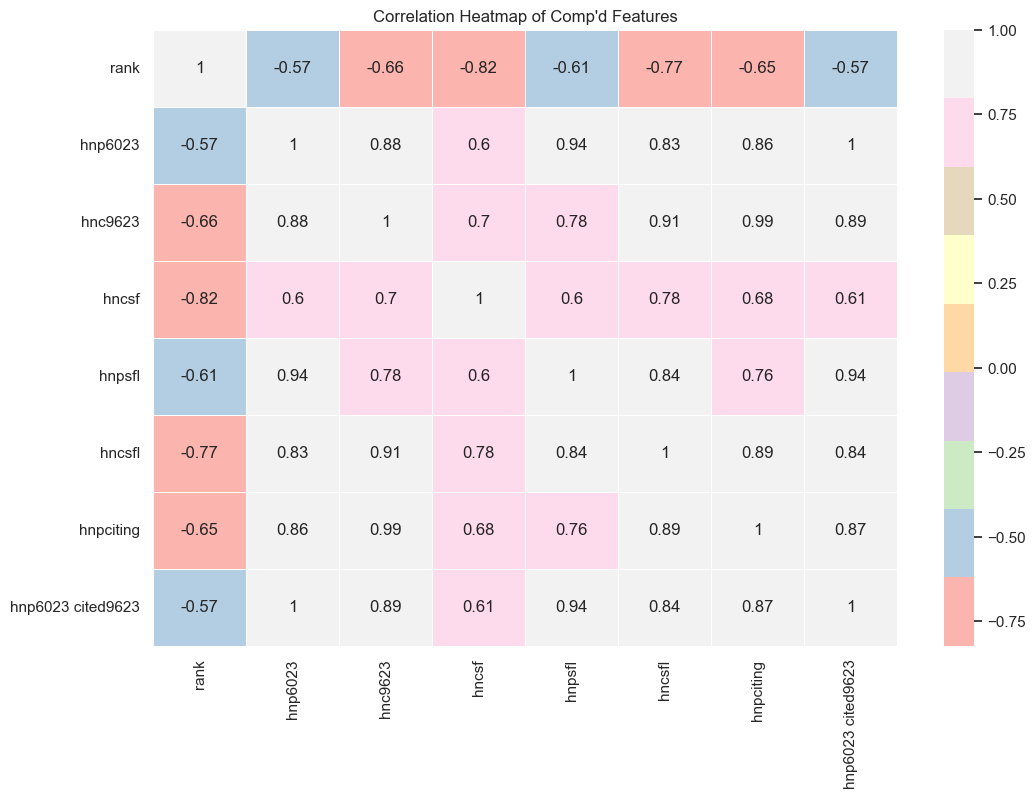

In [137]:
plt.figure(figsize=(12, 8))
sb.heatmap(sci3.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title("Correlation Heatmap of Comp'd Features")
sci3.corr(method = 'spearman')

Seems that we're getting closer. Can we make it any better?

## Bi-Variate KMeans Clustering (using Within Cluster Sum of Squares)

In [141]:
def Bivariate_KMeans_WithinSS(a):
    # Import KMeans from sklearn.cluster
    from sklearn.cluster import KMeans
    
    # Extract the Features from our Data
    X = pd.DataFrame(sci3[['rank', a]])
    
    # Vary the Number of Clusters
    min_clust = 1
    max_clust = 30

    # Compute Within Cluster Sum of Squares
    within_ss = []
    for num_clust in range(min_clust, max_clust+1):
        kmeans = KMeans(n_clusters = num_clust)
        kmeans.fit(X)
        within_ss.append(kmeans.inertia_)

    # Plot Within SS vs Number of Clusters
    f, axes = plt.subplots(1, 1, figsize=(16,4))
    plt.plot(range(min_clust, max_clust+1), within_ss)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within Cluster Sum of Squares')
    plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
    plt.grid(which='major', axis='y')
    plt.show()

    
def Bivariate_KMeans_optimal(a, b):
    # Import KMeans from sklearn.cluster
    from sklearn.cluster import KMeans

    # Extract the Features from our Data
    X = pd.DataFrame(sci3[['rank', a]])
    
    # Create Clustering Model using KMeans
    kmeans = KMeans(n_clusters = num_clust)

    # Fit the Clustering Model on the Data
    kmeans.fit(X)

    # Print the Cluster Centers
    print("Features", b, "\trank")
    print()

    for i, center in enumerate(kmeans.cluster_centers_):
        print("Cluster", i, end=":\t")
        for coord in center:
            print(round(coord, 2), end="\t")
        print()
    print()

    # Print the Within Cluster Sum of Squares
    print("Within Cluster Sum of Squares :", kmeans.inertia_)
    print()
        
    # Predict the Cluster Labels
    labels = kmeans.predict(X)

    # Append Labels to the Data
    X_labeled = X.copy()
    X_labeled["Cluster"] = pd.Categorical(labels)

    # Summary of the Cluster Labels
    sb.countplot(X_labeled["Cluster"])
    
    # Visualize the Clusters in the Data
    f, axes = plt.subplots(1, 1, figsize=(16,8))
    plt.xlabel(a)
    plt.ylabel('rank')
    plt.scatter(x = a, y = "rank", c = "Cluster", cmap = 'viridis', data = X_labeled)
    
    # Boxplots for the Features against the Clusters
    f, axes = plt.subplots(2, 1, figsize=(16,8))
    sb.boxplot(x = a, y = 'Cluster', data = X_labeled, ax = axes[0])
    sb.boxplot(x = 'rank', y = 'Cluster', data = X_labeled, ax = axes[1])
    
    # Average Behaviour of each Cluster
    cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
    cluster_data.plot.bar(figsize = (16,6))

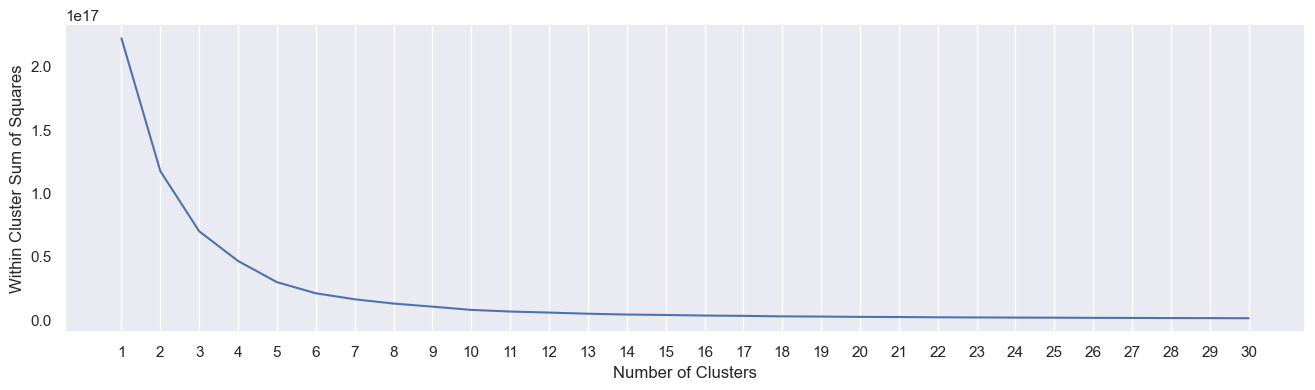

In [143]:
Bivariate_KMeans_WithinSS('hnp6023')

Features 	hnp6023 	rank

Cluster 0:	56380.92	249286.7	
Cluster 1:	1159.36	18630376.98	
Cluster 2:	12008.07	3541867.17	
Cluster 3:	40.25	88200702.87	
Cluster 4:	5304.93	8389702.69	
Cluster 5:	1288.07	37975977.12	
Cluster 6:	26481.24	1269094.65	

Within Cluster Sum of Squares : 1.6551574724199608e+16



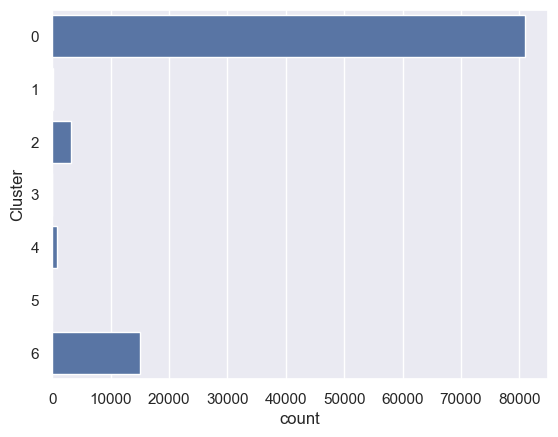

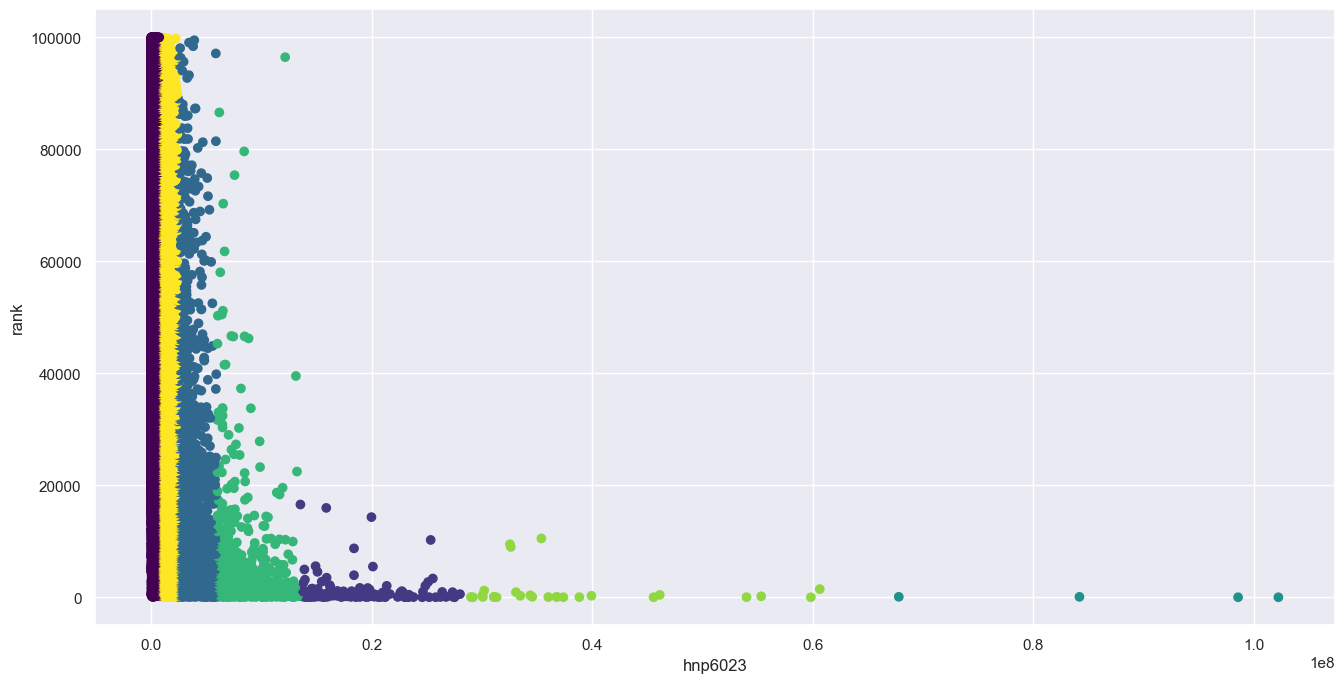

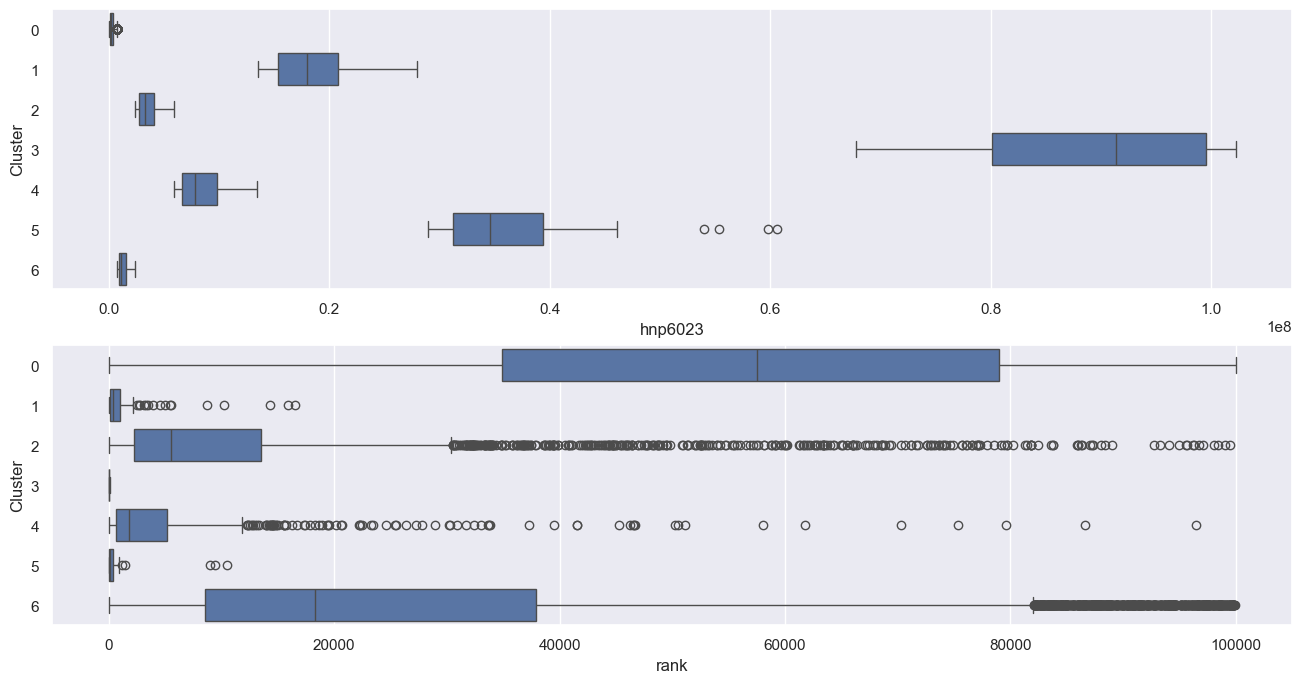

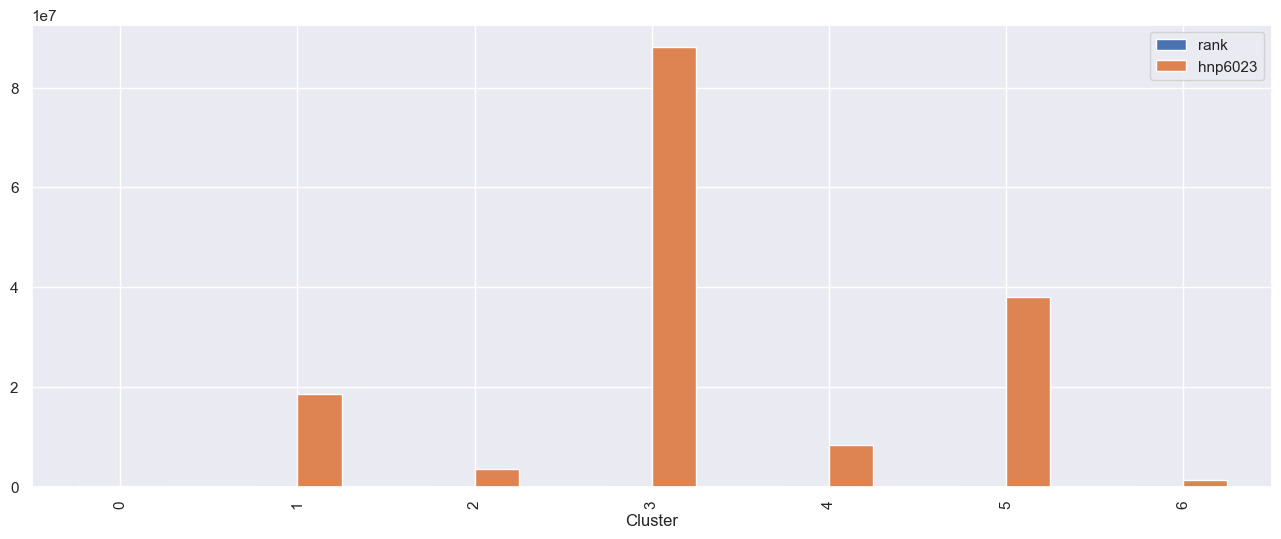

In [144]:
# Set "optimal" Number of Clusters
num_clust = 7

Bivariate_KMeans_optimal('hnp6023', '\thnp6023')

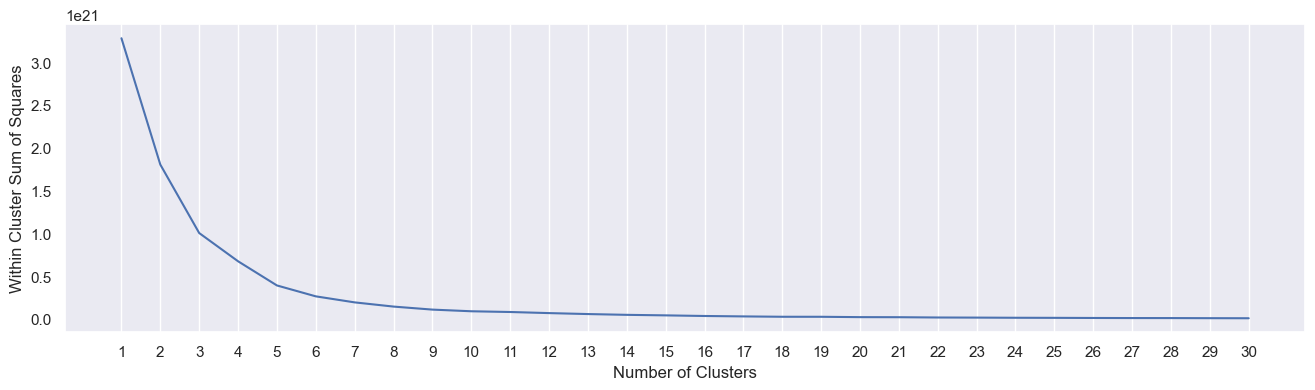

In [154]:
Bivariate_KMeans_WithinSS('hnc9623')

Features 	hnc9623 	rank

Cluster 0:	52779.55	21924107.1	
Cluster 1:	848.4	2145464456.45	
Cluster 2:	3723.62	817182548.47	
Cluster 3:	3.75	14471150895.22	
Cluster 4:	12014.2	236091836.49	
Cluster 5:	166.08	5649038070.75	

Within Cluster Sum of Squares : 2.6510788151948804e+20



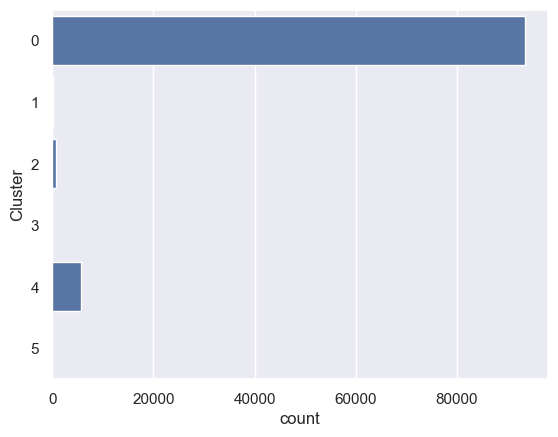

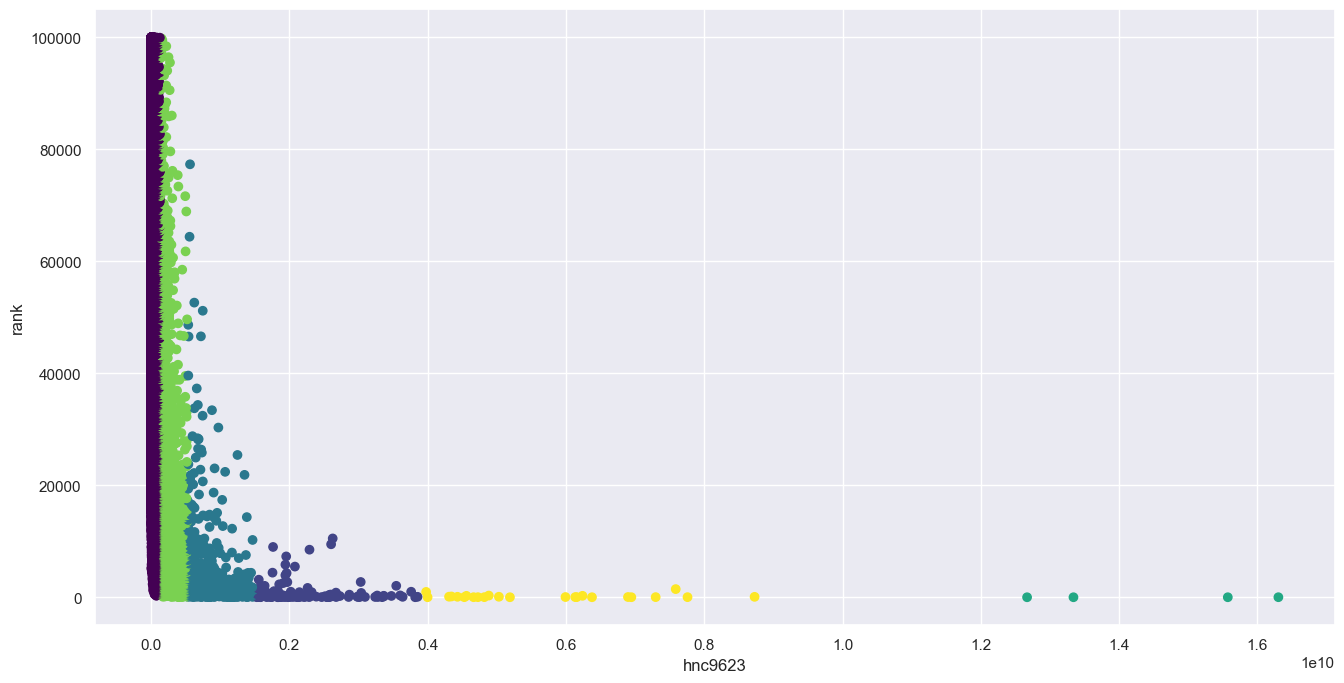

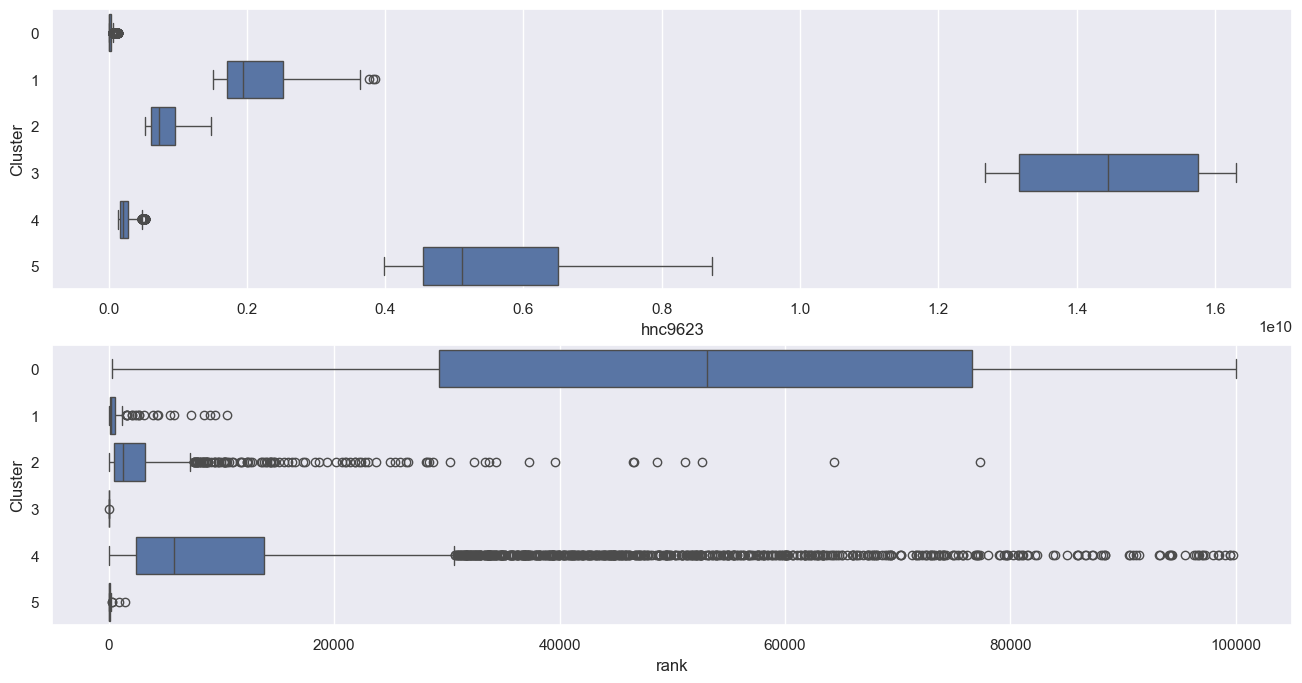

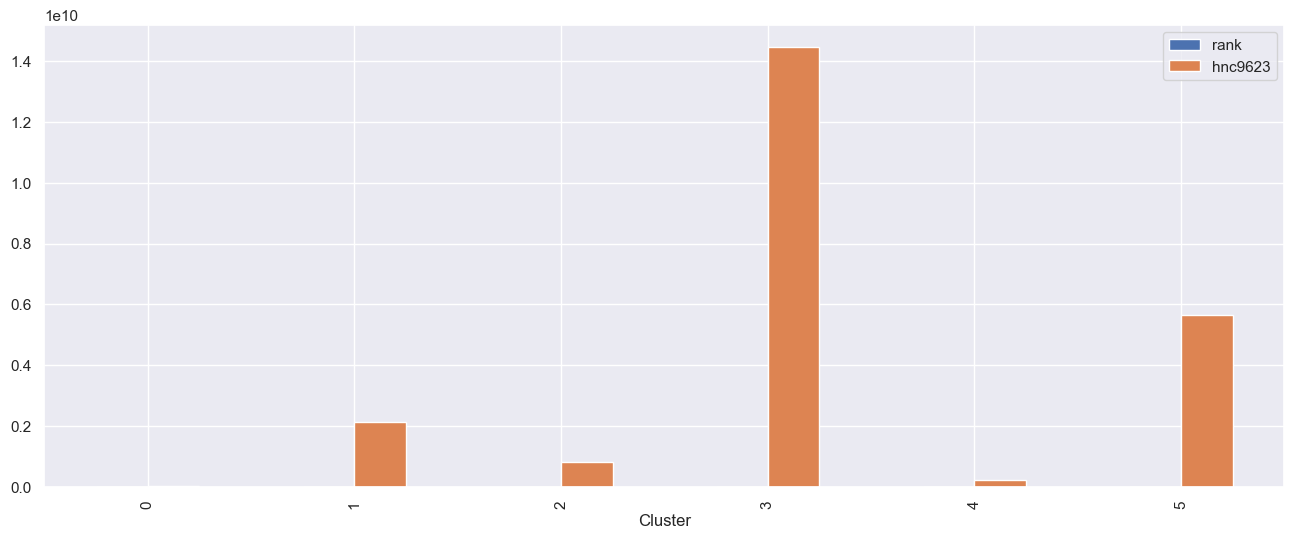

In [155]:
# Set "optimal" Number of Clusters
num_clust = 6

Bivariate_KMeans_optimal('hnc9623', '\thnc9623')

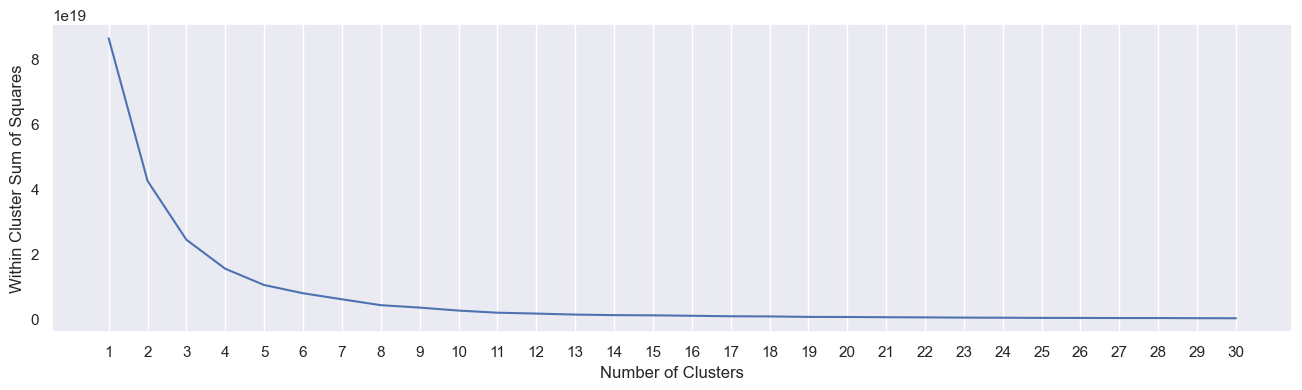

In [158]:
Bivariate_KMeans_WithinSS('hncsf')

Features 	hncsf 	rank

Cluster 0:	54508.46	3336104.25	
Cluster 1:	158.58	434636532.3	
Cluster 2:	47.79	850085807.28	
Cluster 3:	2015.92	79317090.42	
Cluster 4:	15.12	1717711289.42	
Cluster 5:	9235.61	24870458.61	
Cluster 6:	542.59	201781987.89	

Within Cluster Sum of Squares : 6.045504248688765e+18



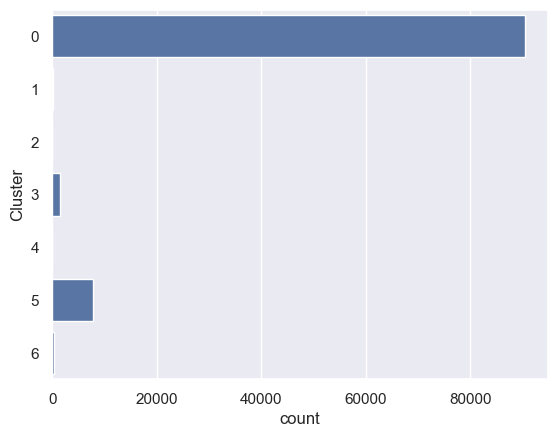

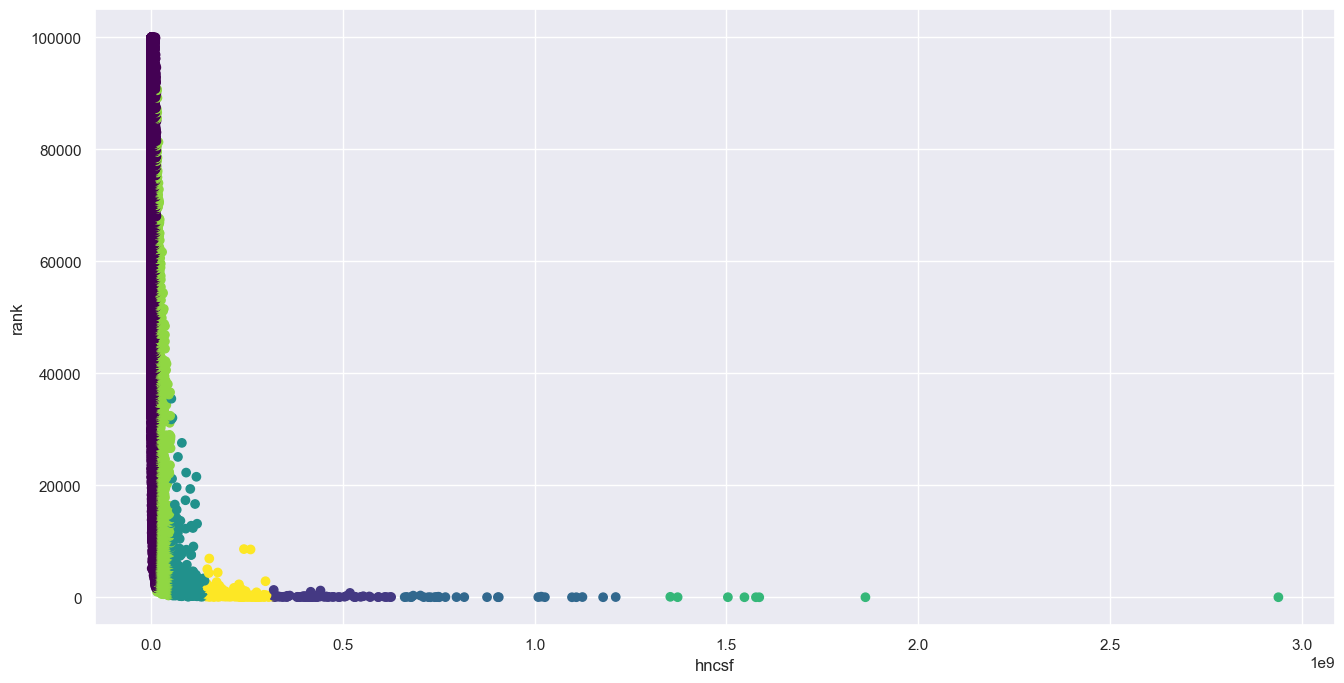

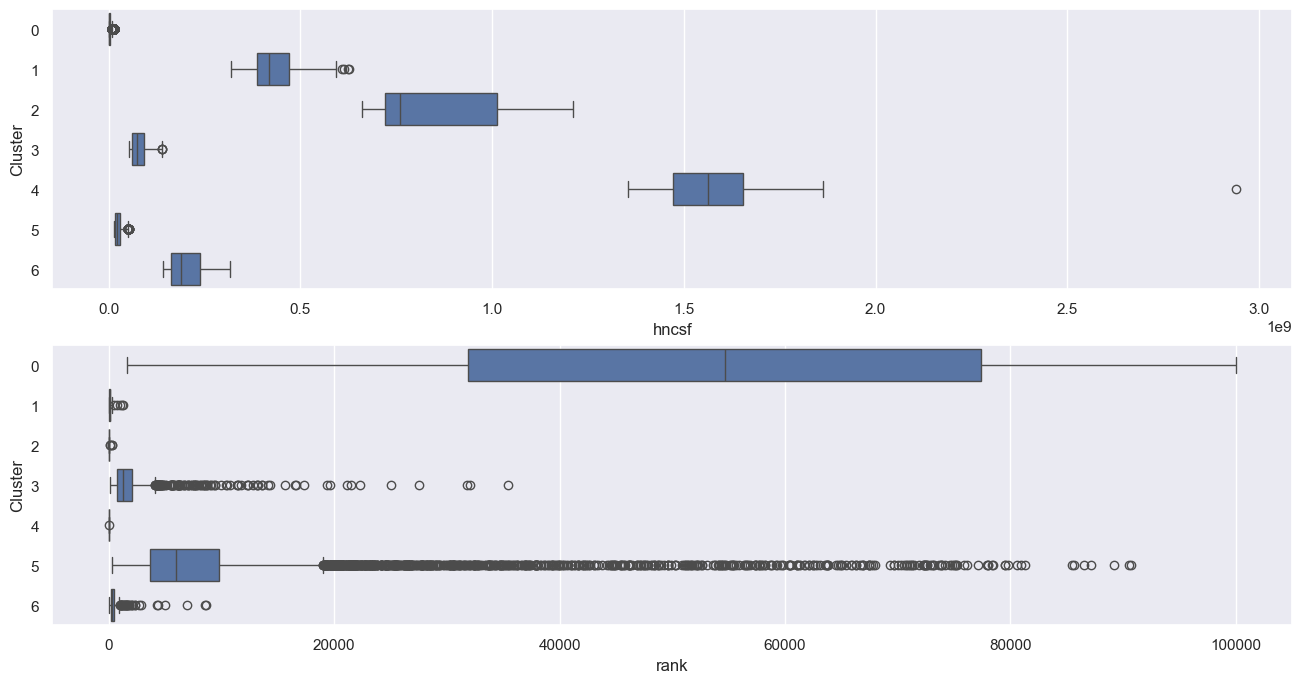

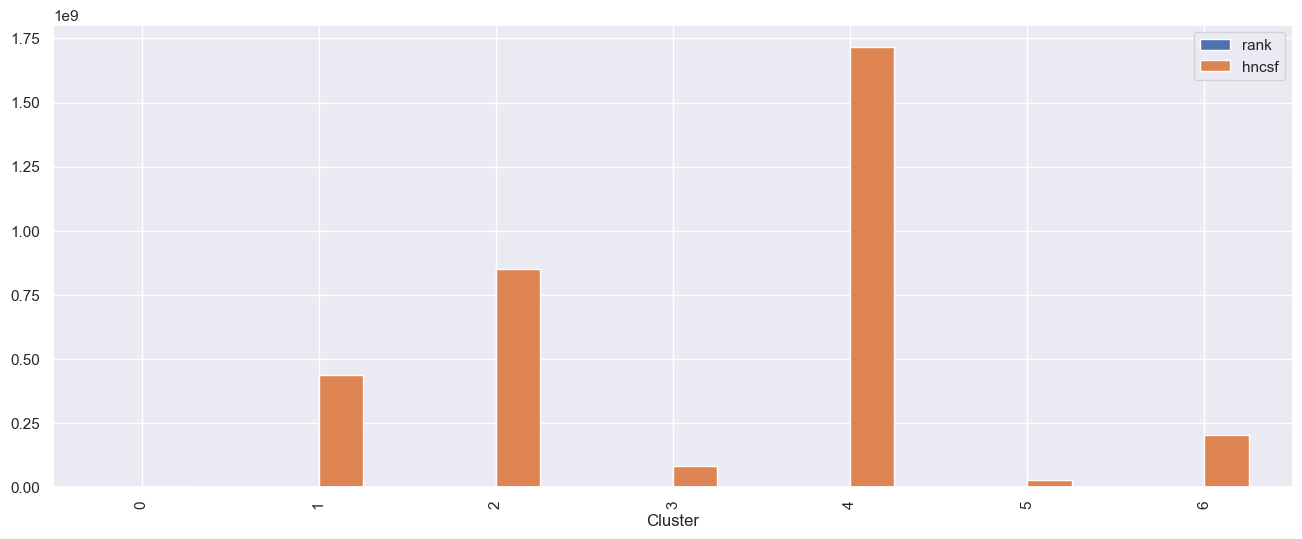

In [159]:
# Set "optimal" Number of Clusters
num_clust = 7

Bivariate_KMeans_optimal('hncsf', '\thncsf')

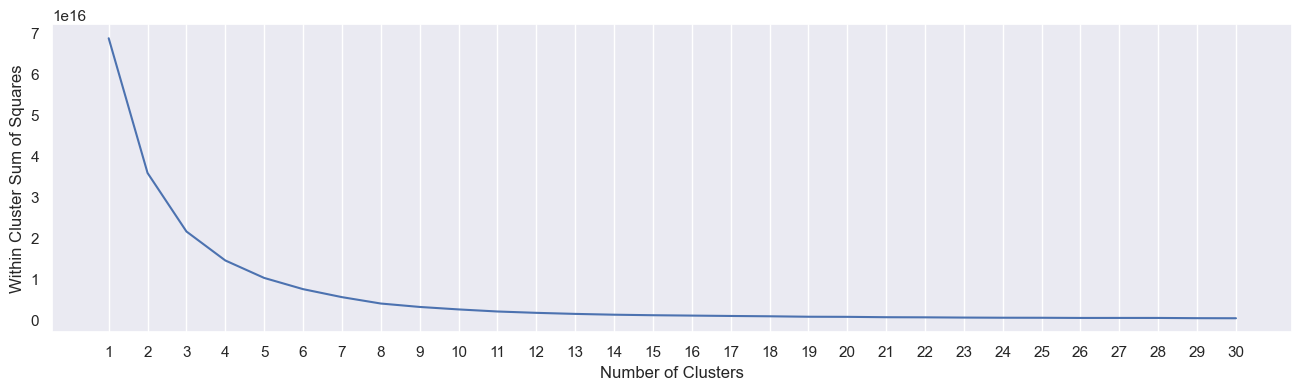

In [162]:
Bivariate_KMeans_WithinSS('hnpsfl')

Features 	hnpsfl 	rank

Cluster 0:	57803.17	131159.43	
Cluster 1:	2667.54	7270179.06	
Cluster 2:	12564.27	1551464.65	
Cluster 3:	2130.75	14858794.95	
Cluster 4:	6057.14	3457565.92	
Cluster 5:	26690.4	590096.16	
Cluster 6:	162.7	35729088.7	

Within Cluster Sum of Squares : 5726699663921747.0



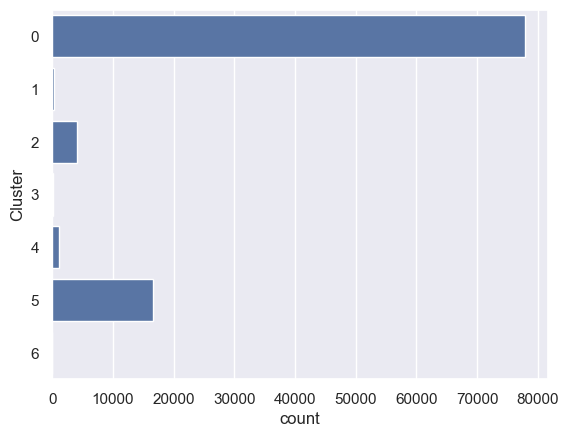

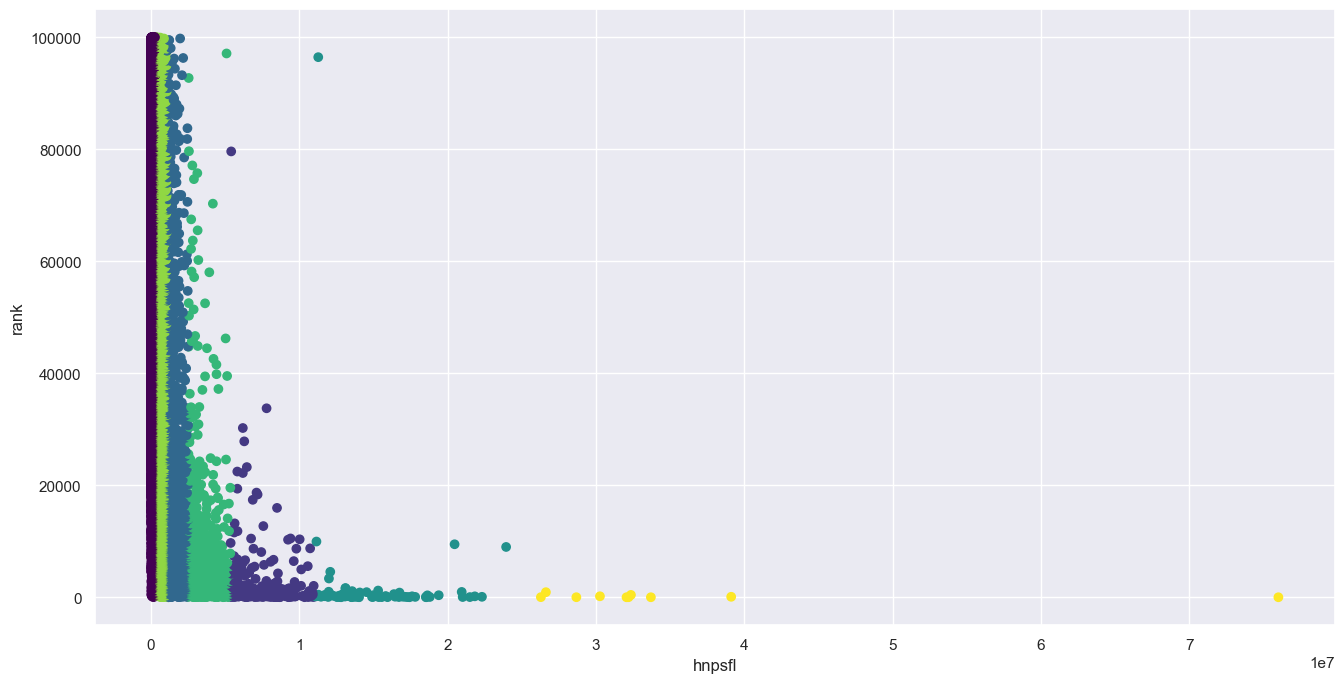

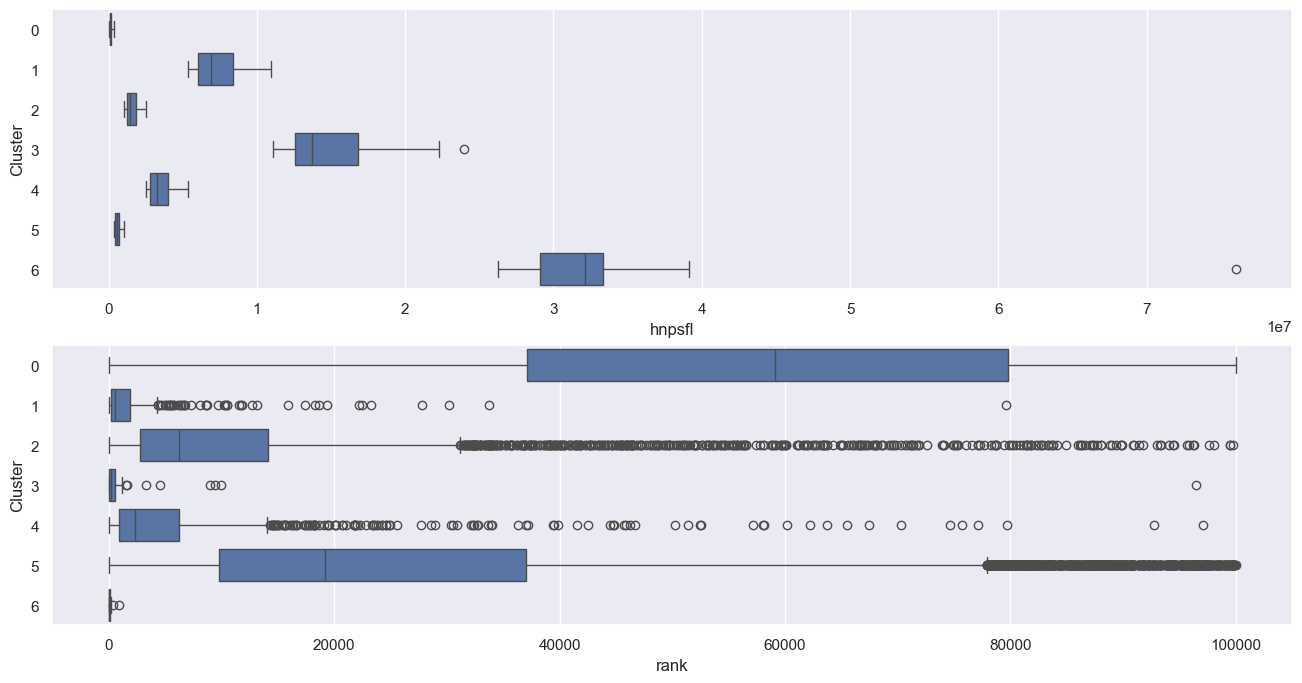

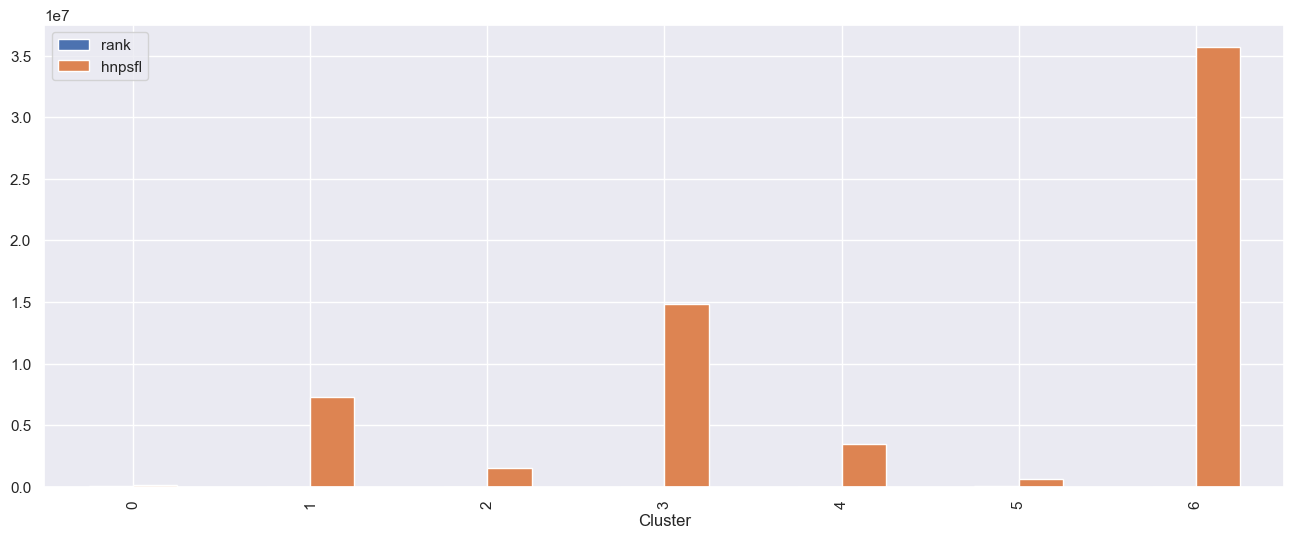

In [163]:
# Set "optimal" Number of Clusters
num_clust = 7

Bivariate_KMeans_optimal('hnpsfl', '\thnpsfl')

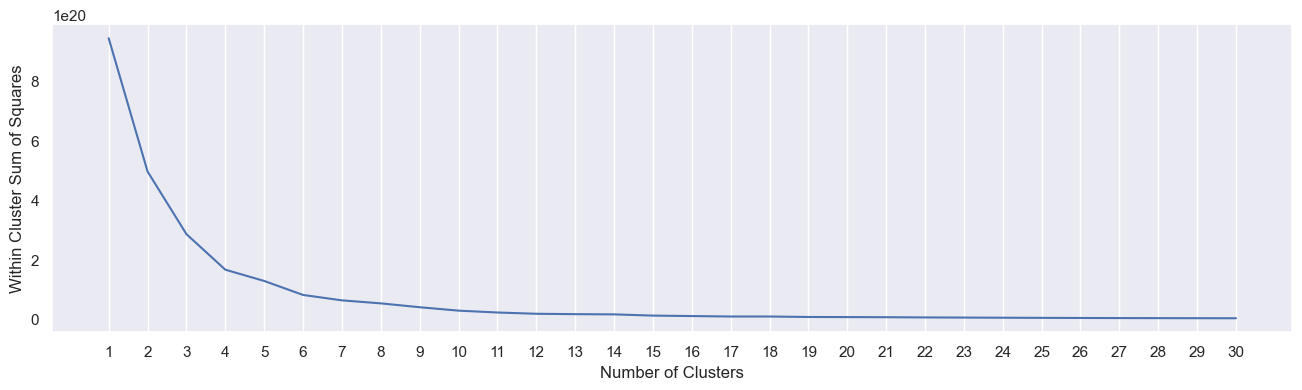

In [166]:
Bivariate_KMeans_WithinSS('hncsfl')

Features 	hncsfl 	rank

Cluster 0:	52220.51	11619336.77	
Cluster 1:	1934.65	530675155.96	
Cluster 2:	6864.95	145827514.33	
Cluster 3:	22.8	4618975732.86	
Cluster 4:	658.27	1554647694.49	
Cluster 5:	1.5	9393461387.97	

Within Cluster Sum of Squares : 8.386512958747555e+19



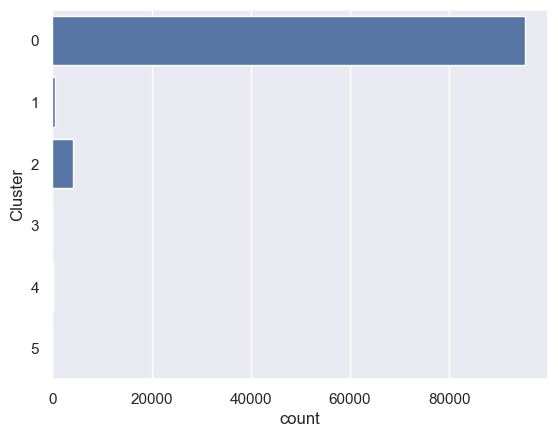

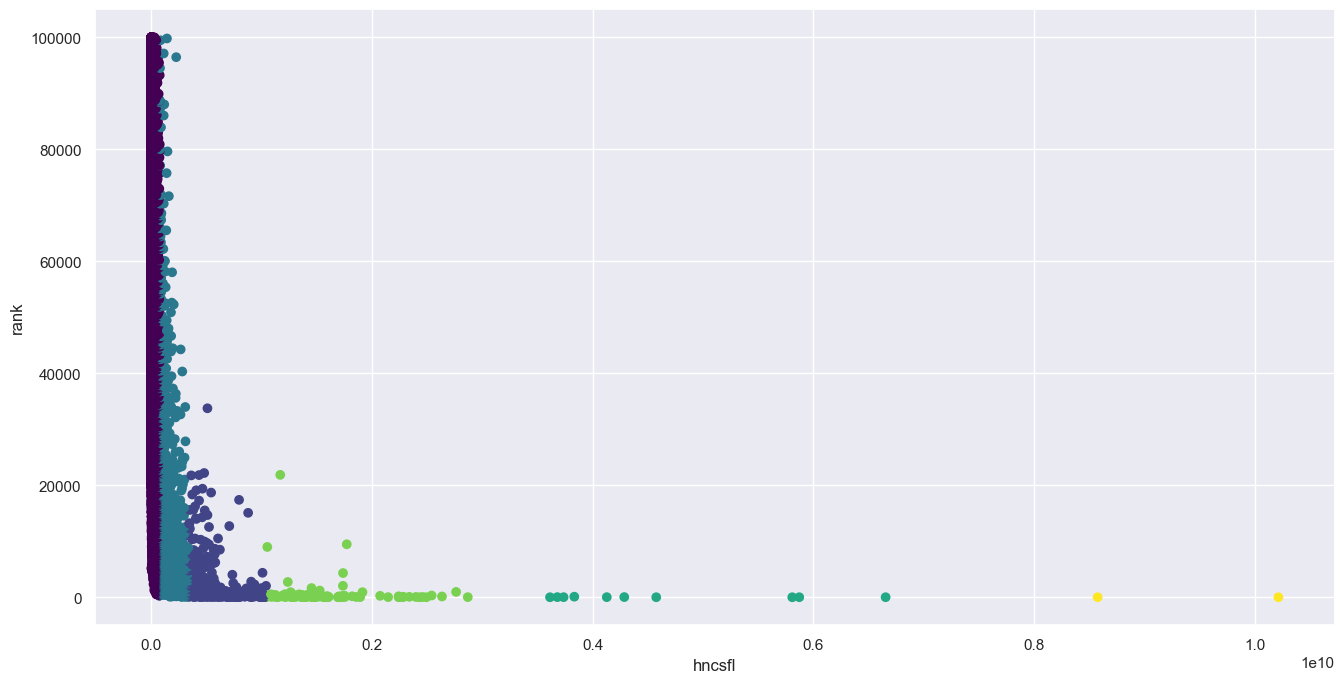

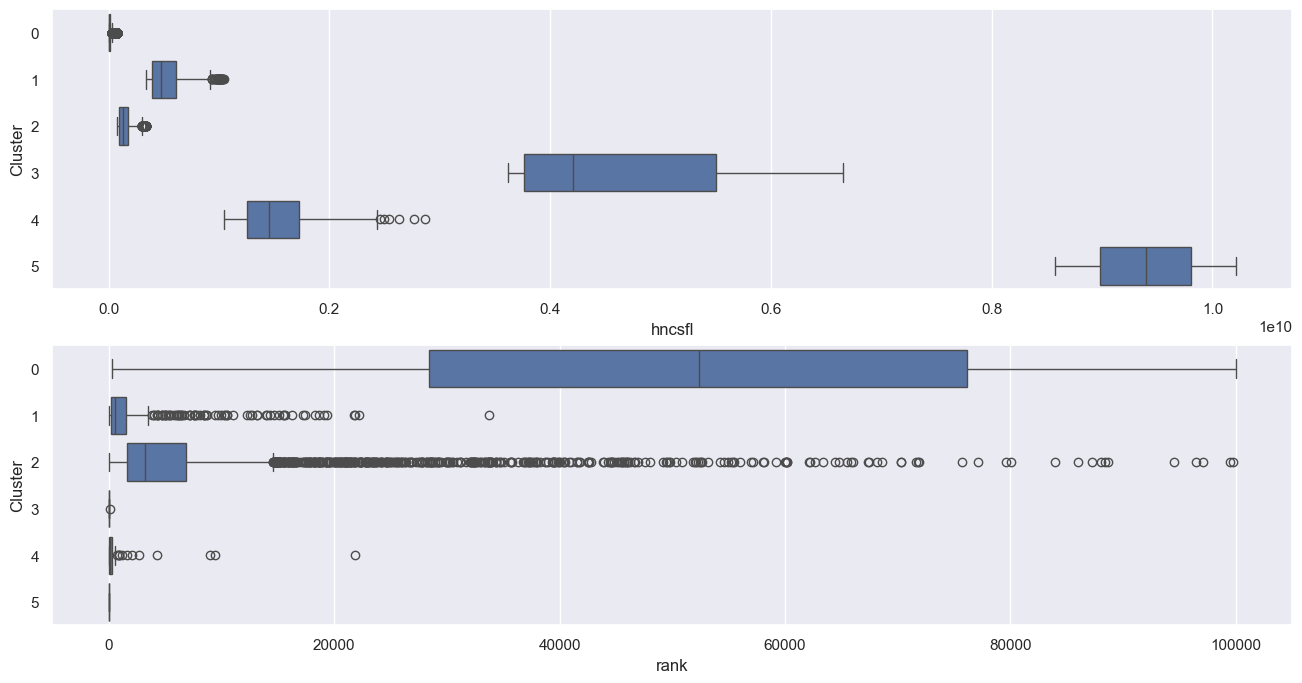

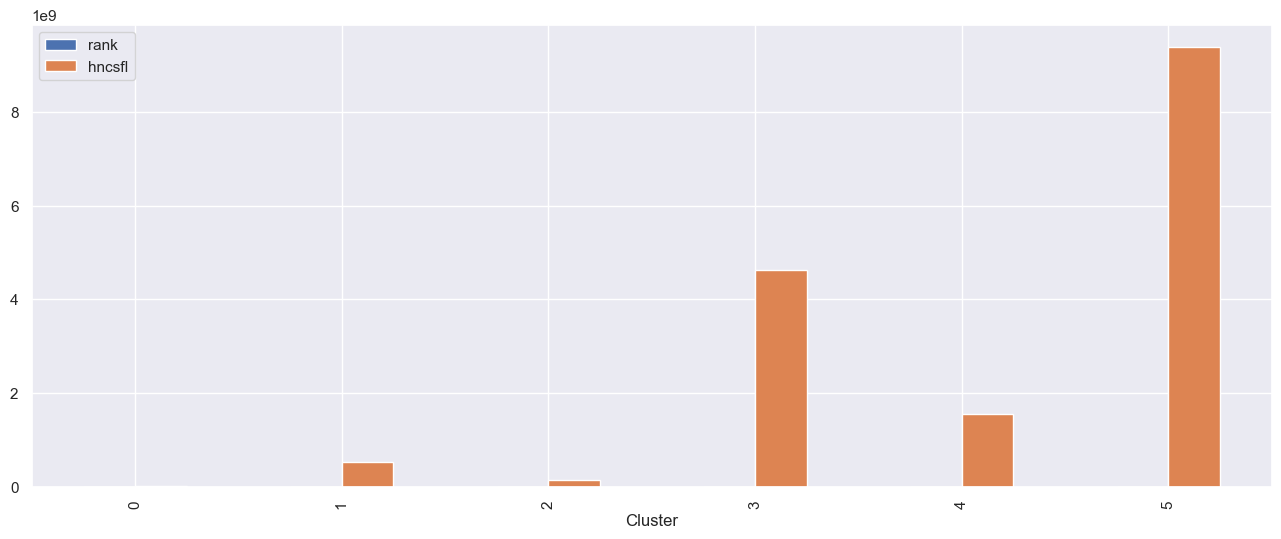

In [167]:
# Set "optimal" Number of Clusters
num_clust = 6

Bivariate_KMeans_optimal('hncsfl', '\thncsfl')

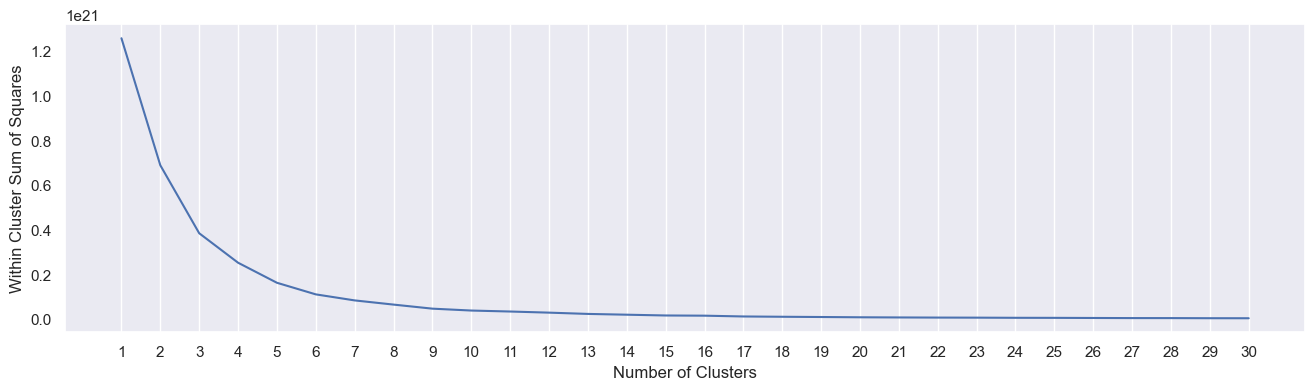

In [170]:
Bivariate_KMeans_WithinSS('hnpciting')

Features 	hnpciting 	rank

Cluster 0:	54874.12	11454885.49	
Cluster 1:	1228.33	1280385491.76	
Cluster 2:	201.25	6352159952.33	
Cluster 3:	3464.09	598932493.92	
Cluster 4:	200.89	3071147105.38	
Cluster 5:	8316.35	253131324.75	
Cluster 6:	20417.42	82694494.46	

Within Cluster Sum of Squares : 1.13301337959204e+20



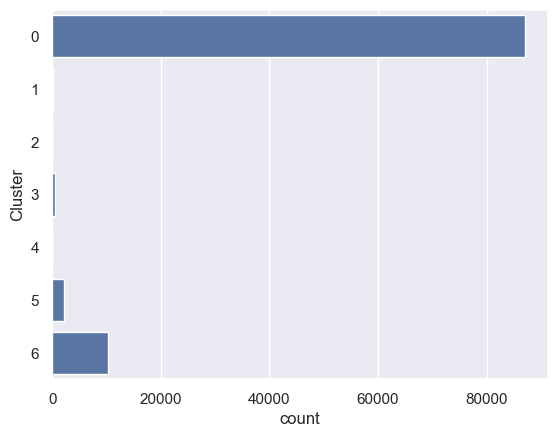

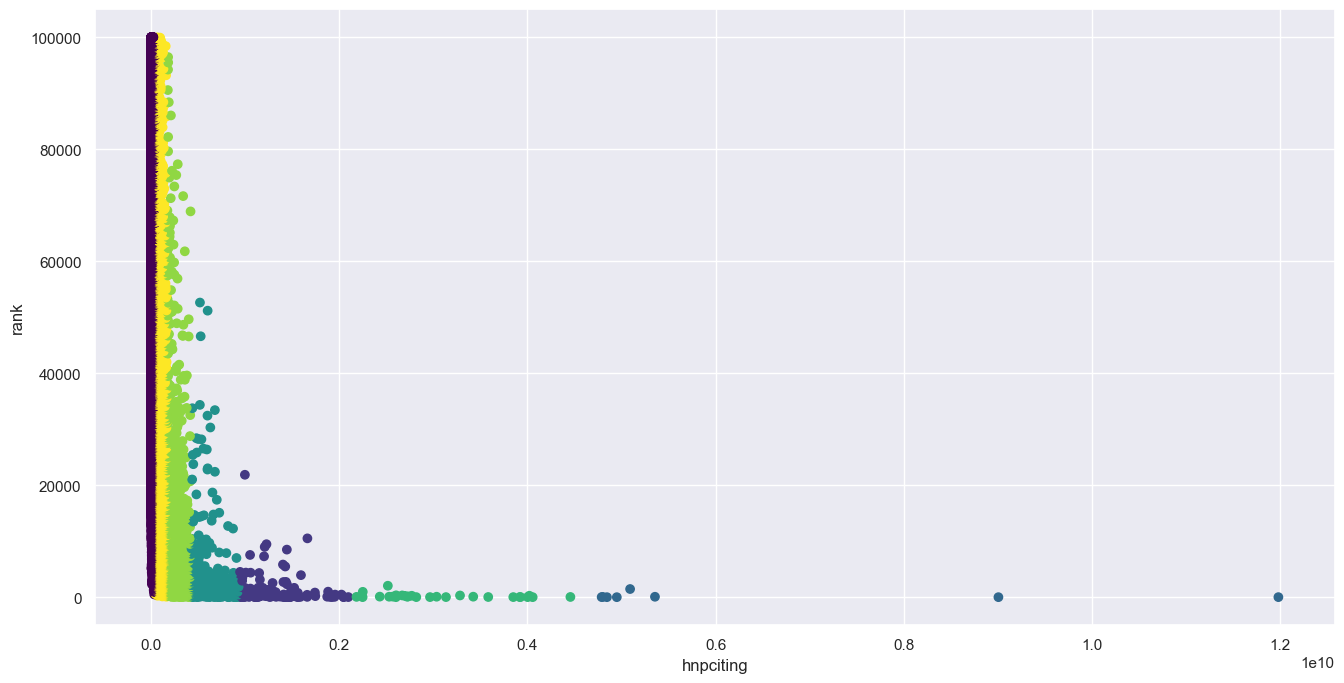

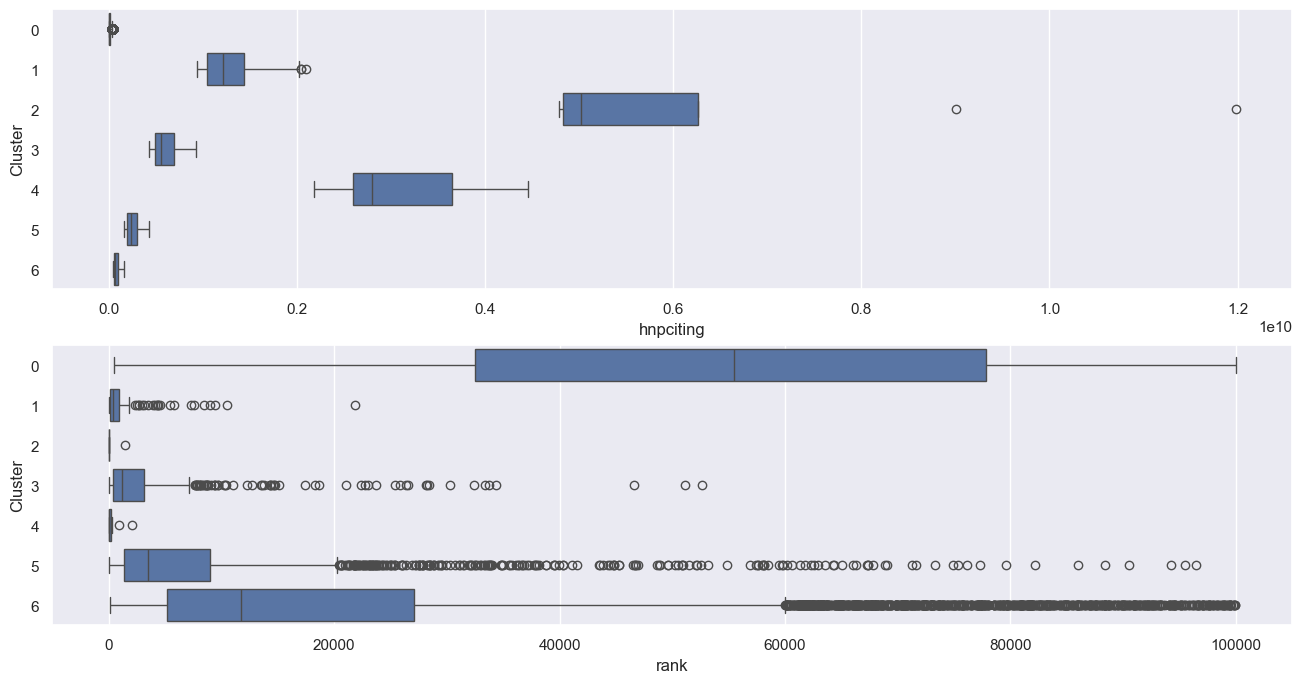

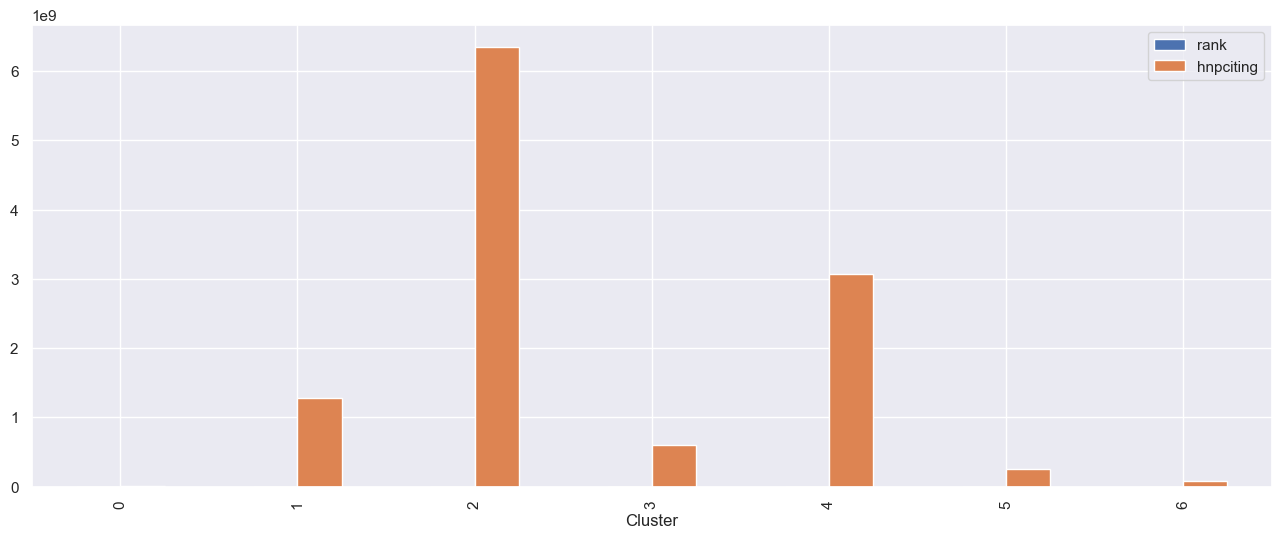

In [171]:
# Set "optimal" Number of Clusters
num_clust = 7

Bivariate_KMeans_optimal('hnpciting', '\thnpciting')

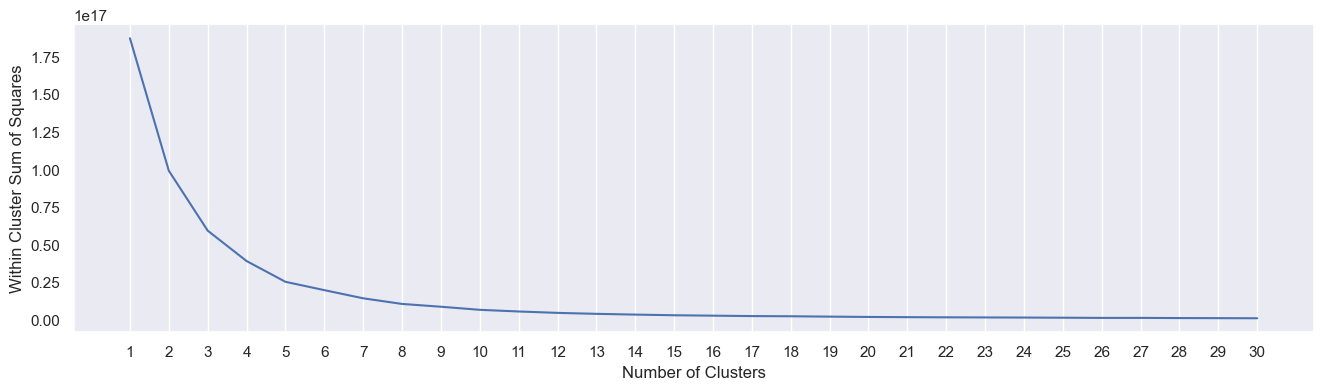

In [174]:
Bivariate_KMeans_WithinSS('hnp6023 cited9623')

Features 	hnp6023 cited9623 	rank

Cluster 0:	55469.82	243856.7	
Cluster 1:	3762.05	9814466.63	
Cluster 2:	23733.53	1357723.06	
Cluster 3:	226.88	67643431.09	
Cluster 4:	1151.38	23074562.12	
Cluster 5:	9978.94	3998156.12	

Within Cluster Sum of Squares : 1.7544505103704028e+16



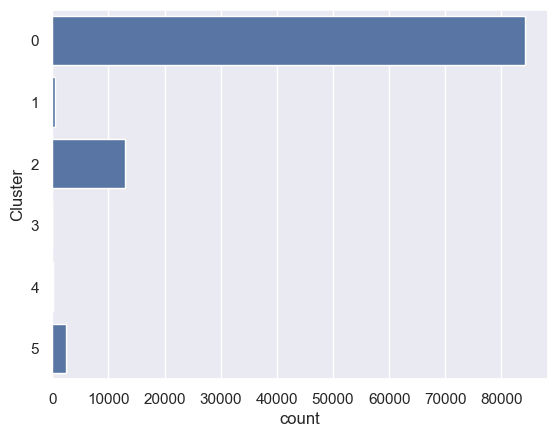

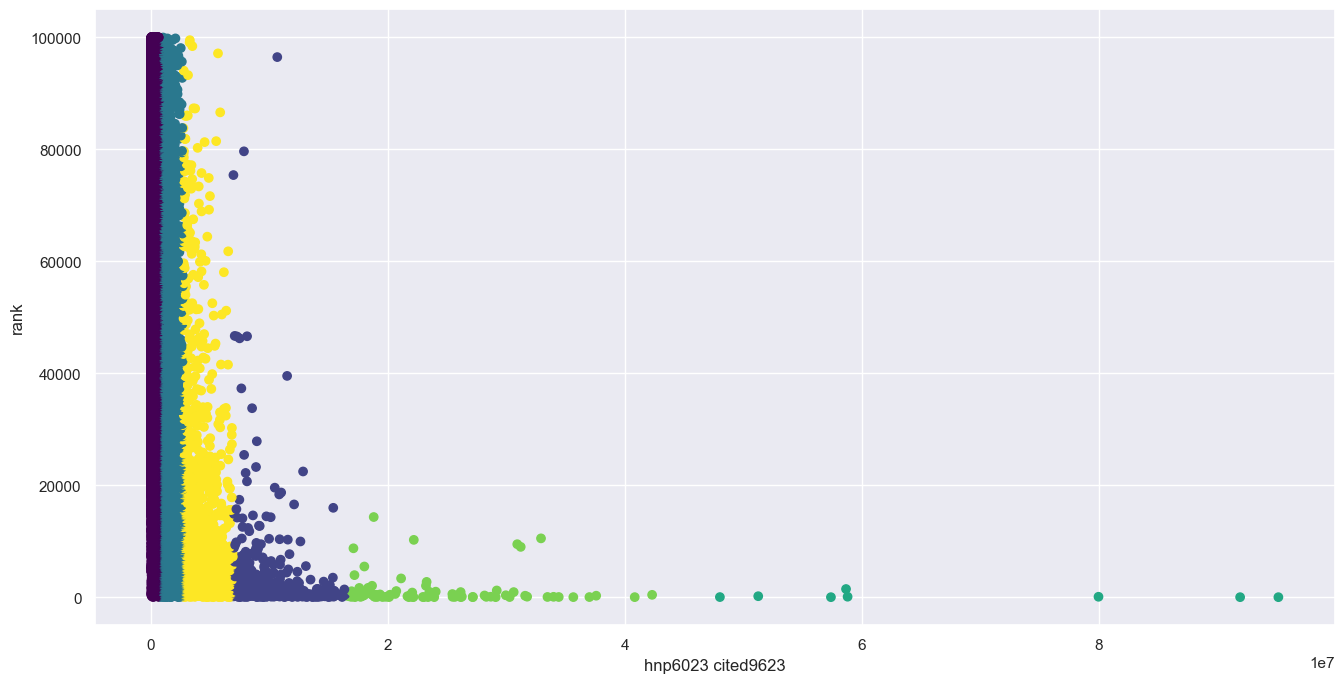

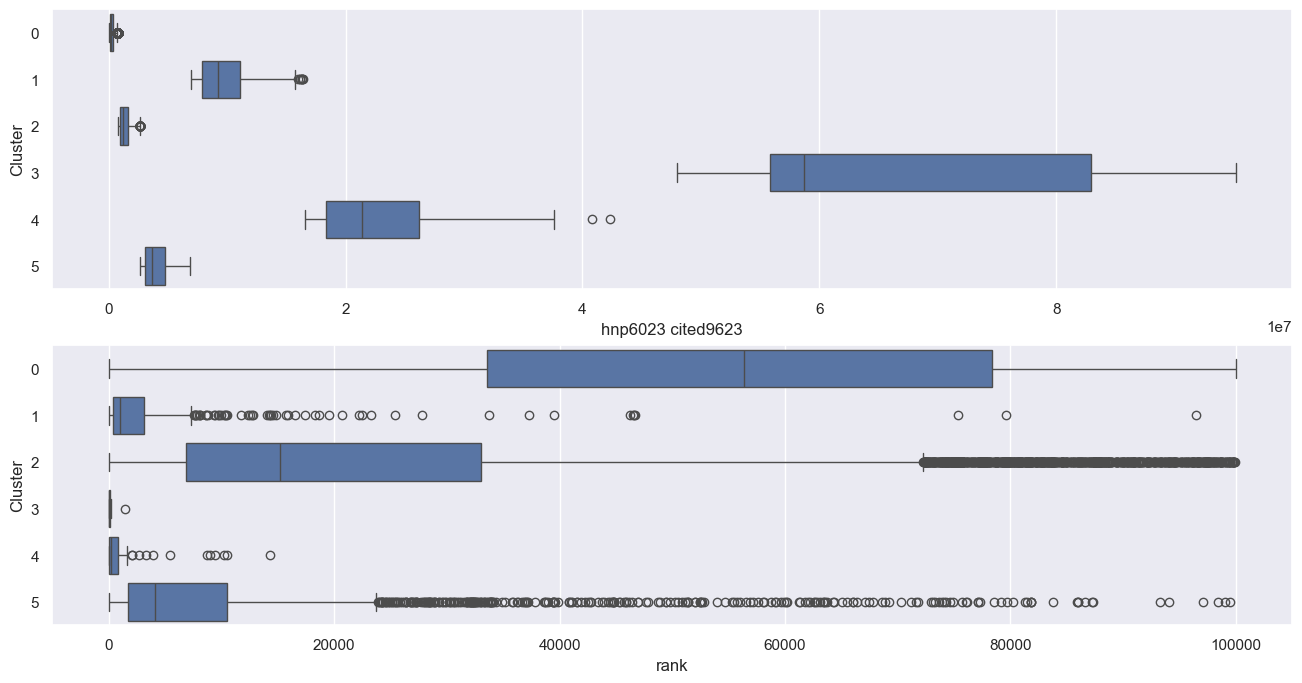

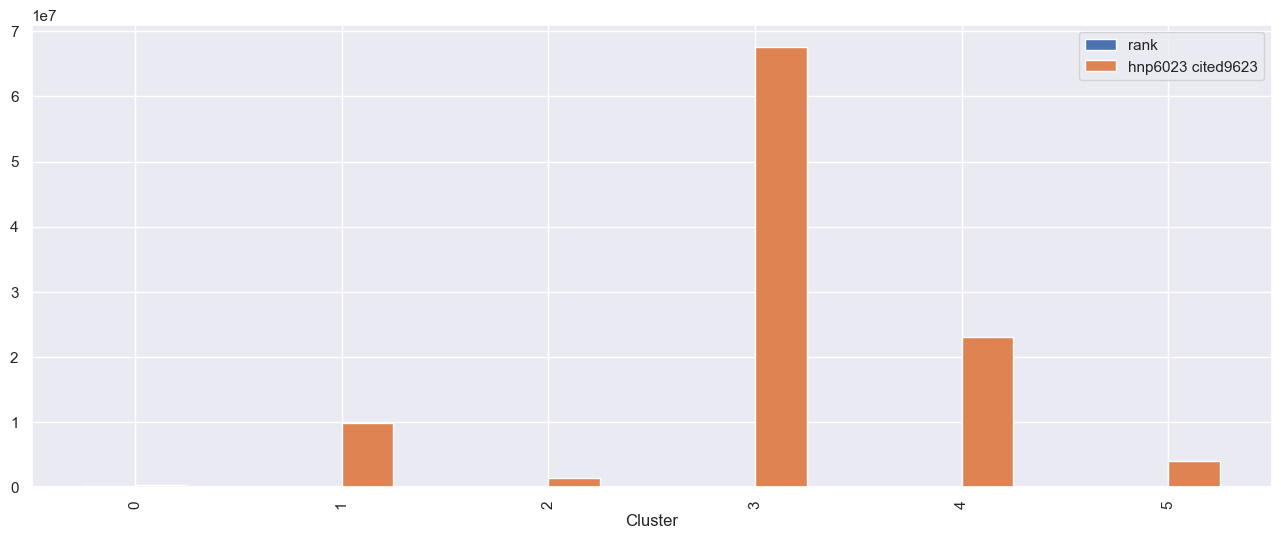

In [175]:
# Set "optimal" Number of Clusters
num_clust = 6

Bivariate_KMeans_optimal('hnp6023 cited9623', '\thnp6023 cited9623')

## Bi-Variate KMeans++ Clustering (using Within Cluster Sum of Squares)

In [179]:
def Bivariate_KMeansPlus_WithinSS(a):
    # Import KMeans from sklearn.cluster
    from sklearn.cluster import KMeans
    
    # Extract the Features from our Data
    X = pd.DataFrame(sci3[['rank', a]])

    # Set the Initialization to KMeans++
    init_algo = 'k-means++'

    # Vary the Number of Clusters
    min_clust = 1
    max_clust = 30

    # Compute Within Cluster Sum of Squares
    within_ss = []
    for num_clust in range(min_clust, max_clust+1):
        kmeans = KMeans(n_clusters = num_clust,        # number of clusters
                        init = init_algo,              # initialization algorithm
                        n_init = 5)                    # number of initializations
        kmeans.fit(X)
        within_ss.append(kmeans.inertia_)

    # Plot Within SS vs Number of Clusters
    f, axes = plt.subplots(1, 1, figsize=(16,4))
    plt.plot(range(min_clust, max_clust+1), within_ss)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within Cluster Sum of Squares')
    plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
    plt.grid(which='major', axis='y')
    plt.show()

    
def Bivariate_KMeansPlus_optimal(a, b):
    # Import KMeans from sklearn.cluster
    from sklearn.cluster import KMeans

    # Extract the Features from our Data
    X = pd.DataFrame(sci3[['rank', a]])
    
    # Set the Initialization to KMeans++
    init_algo = 'k-means++'
    
    # Create Clustering Model using KMeans
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 20)

    # Fit the Clustering Model on the Data
    kmeans.fit(X)

    # Print the Cluster Centers
    print("Features", b, "\trank")
    print()

    for i, center in enumerate(kmeans.cluster_centers_):
        print("Cluster", i, end=":\t")
        for coord in center:
            print(round(coord, 2), end="\t")
        print()
    print()

    # Print the Within Cluster Sum of Squares
    print("Within Cluster Sum of Squares :", kmeans.inertia_)
    print()
        
    # Predict the Cluster Labels
    labels = kmeans.predict(X)

    # Append Labels to the Data
    X_labeled = X.copy()
    X_labeled["Cluster"] = pd.Categorical(labels)

    # Summary of the Cluster Labels
    sb.countplot(X_labeled["Cluster"])
    
    # Visualize the Clusters in the Data
    f, axes = plt.subplots(1, 1, figsize=(16,8))
    plt.xlabel(a)
    plt.ylabel('rank')
    plt.scatter(x = a, y = "rank", c = "Cluster", cmap = 'viridis', data = X_labeled)
    
    # Boxplots for the Features against the Clusters
    f, axes = plt.subplots(2, 1, figsize=(16,8))
    sb.boxplot(x = a, y = 'Cluster', data = X_labeled, ax = axes[0])
    sb.boxplot(x = 'rank', y = 'Cluster', data = X_labeled, ax = axes[1])
    
    # Average Behaviour of each Cluster
    cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
    cluster_data.plot.bar(figsize = (16,6))

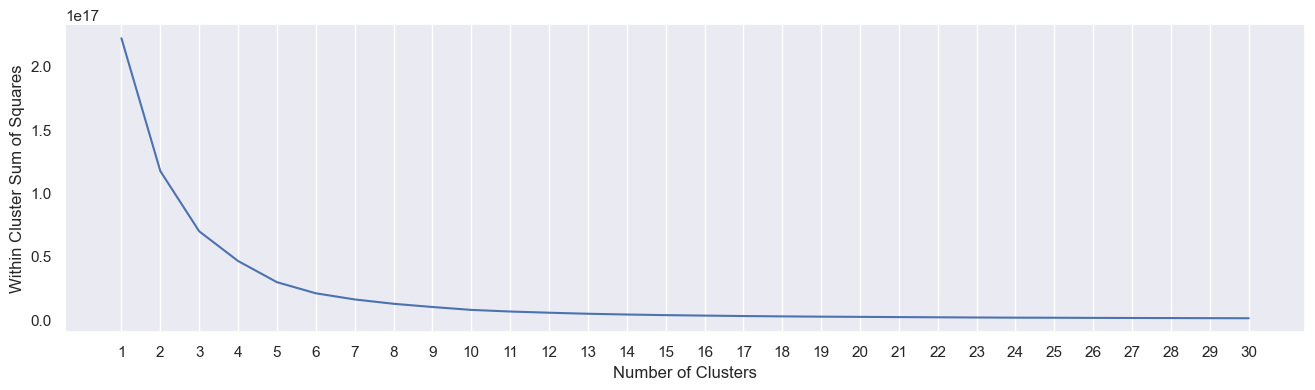

In [181]:
Bivariate_KMeansPlus_WithinSS('hnp6023')

Features 	hnp6023 	rank

Cluster 0:	24123.47	1483914.1	
Cluster 1:	1113.1	24613111.37	
Cluster 2:	55536.93	269300.34	
Cluster 3:	10233.32	4324817.08	
Cluster 4:	3917.82	10472076.56	
Cluster 5:	226.88	72825004.84	

Within Cluster Sum of Squares : 2.0545223144686264e+16



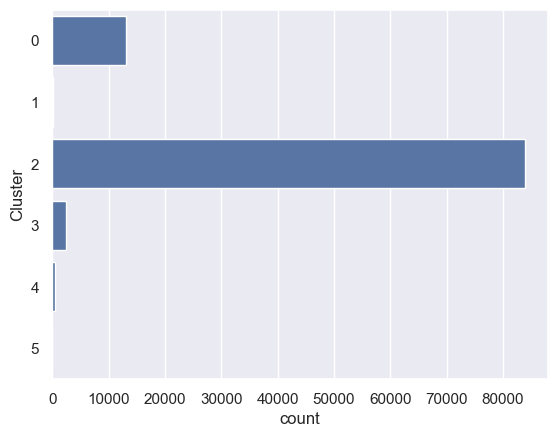

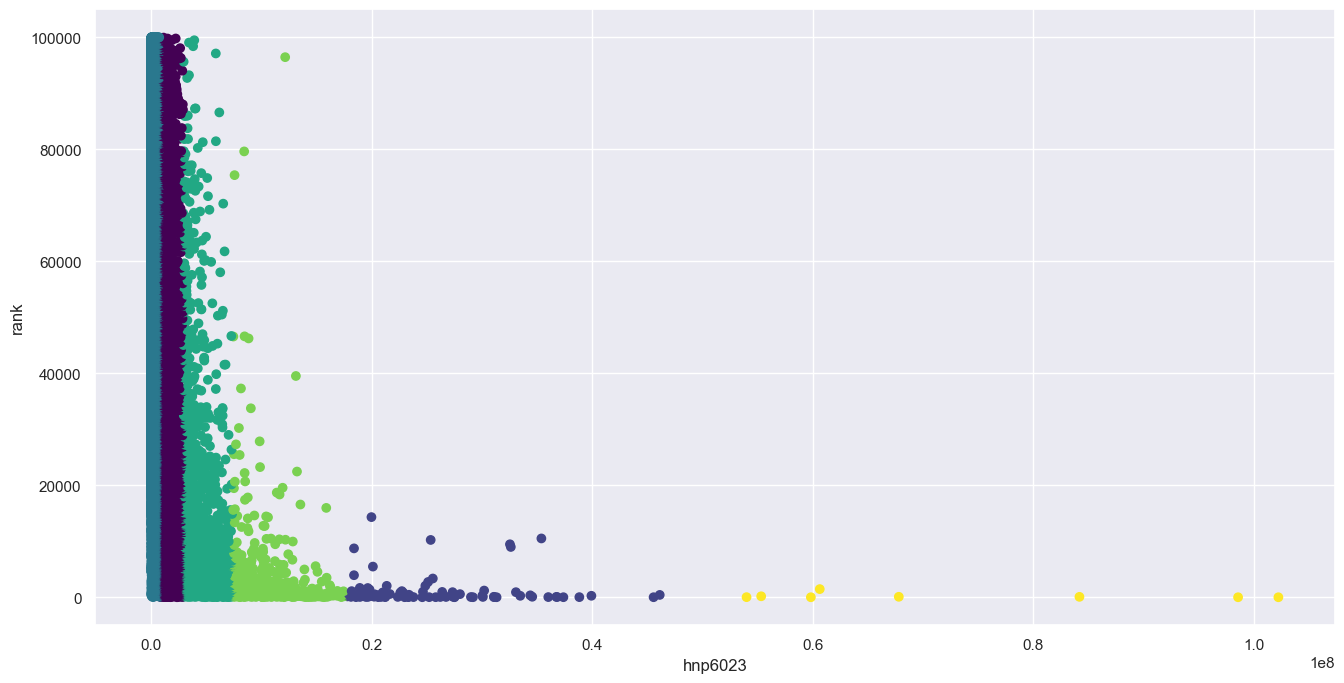

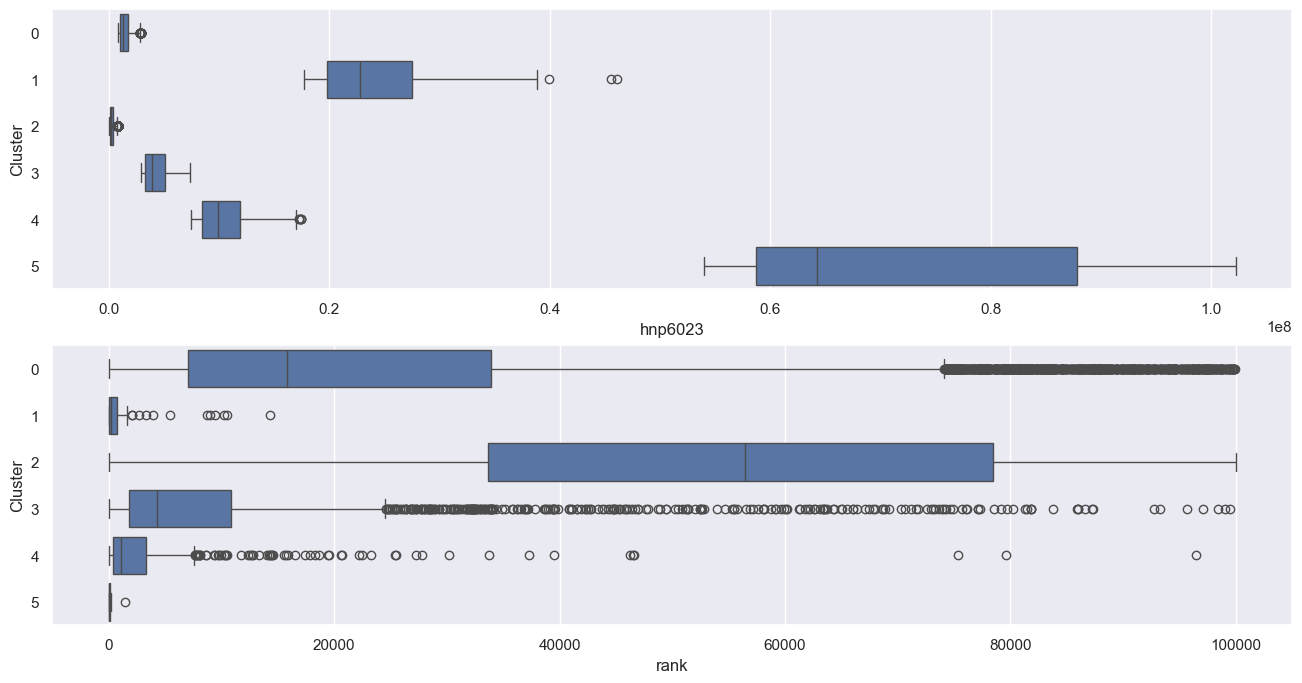

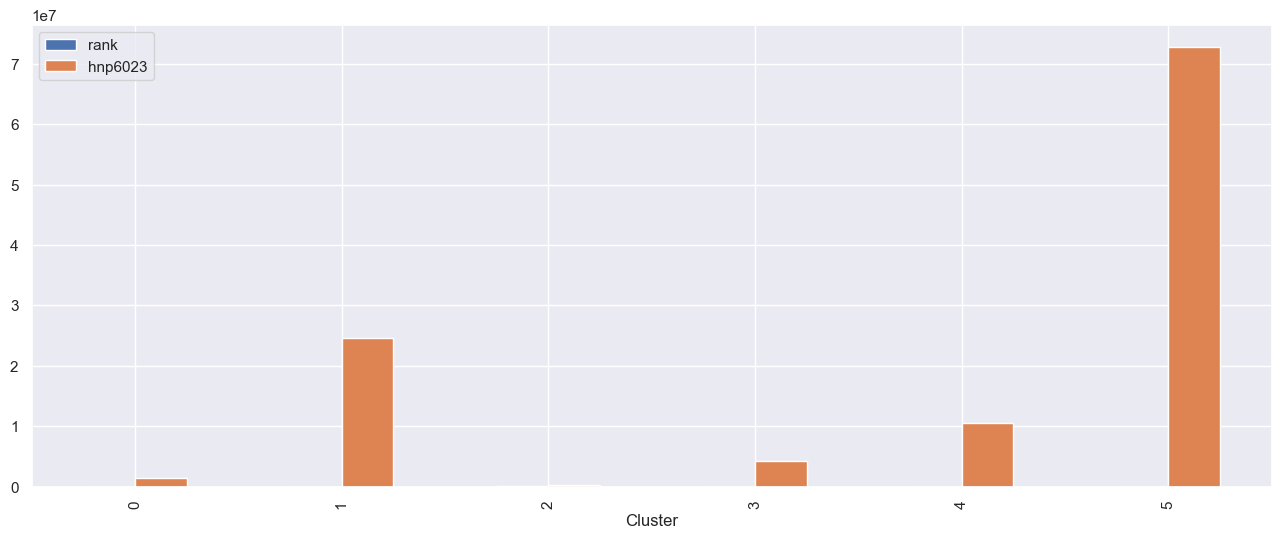

In [182]:
# Set "optimal" Number of Clusters
num_clust = 6

Bivariate_KMeansPlus_optimal('hnp6023', '\thnp6023')

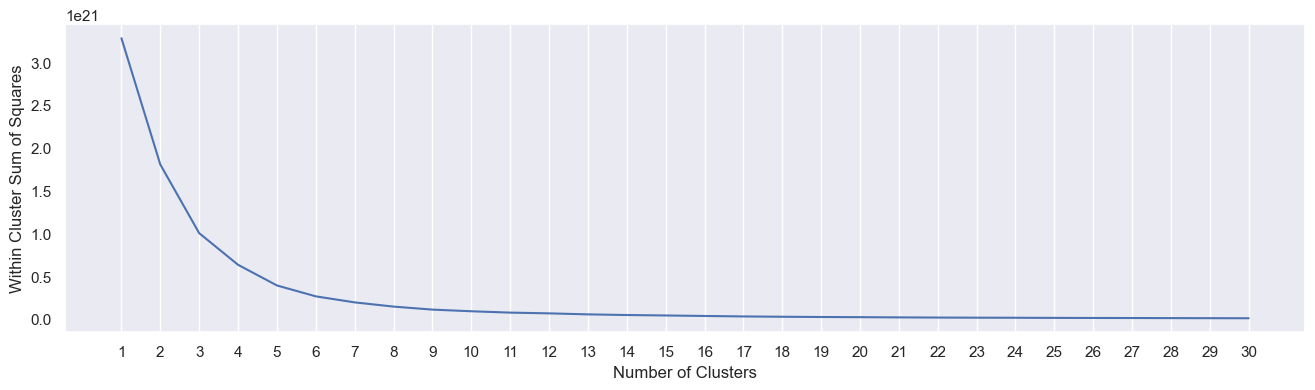

In [185]:
Bivariate_KMeansPlus_WithinSS('hnc9623')

Features 	hnc9623 	rank

Cluster 0:	53134.23	20874252.33	
Cluster 1:	1139.72	1920926235.9	
Cluster 2:	3.75	14471150895.22	
Cluster 3:	4523.61	705562121.78	
Cluster 4:	13343.31	208062396.1	
Cluster 5:	187.41	5444847361.37	

Within Cluster Sum of Squares : 2.641525256607047e+20



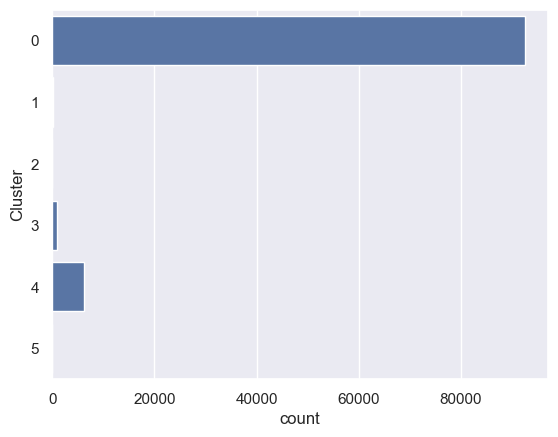

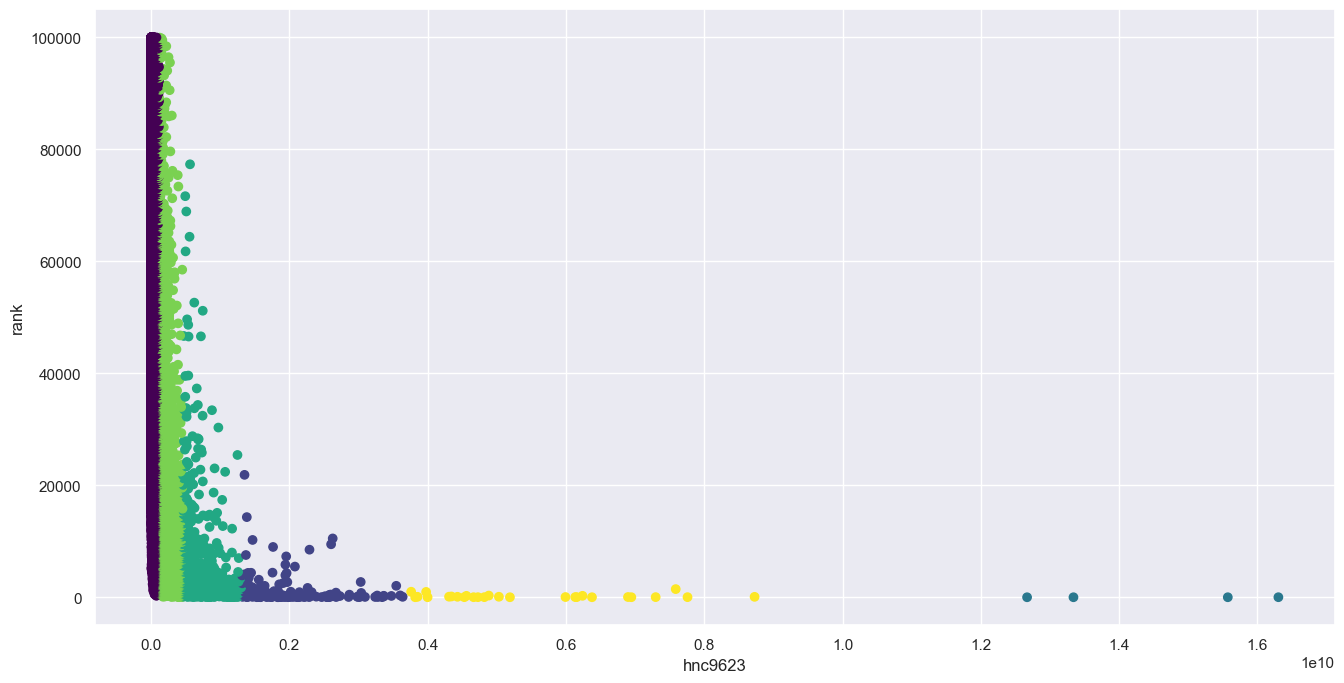

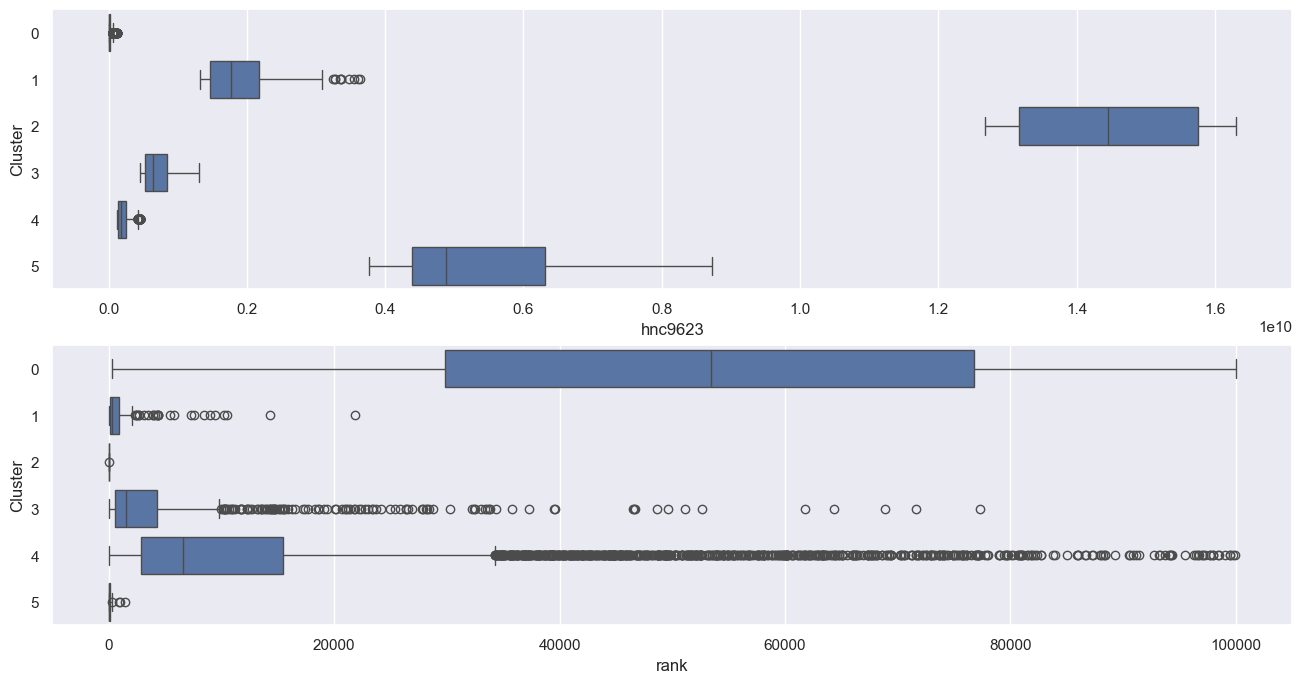

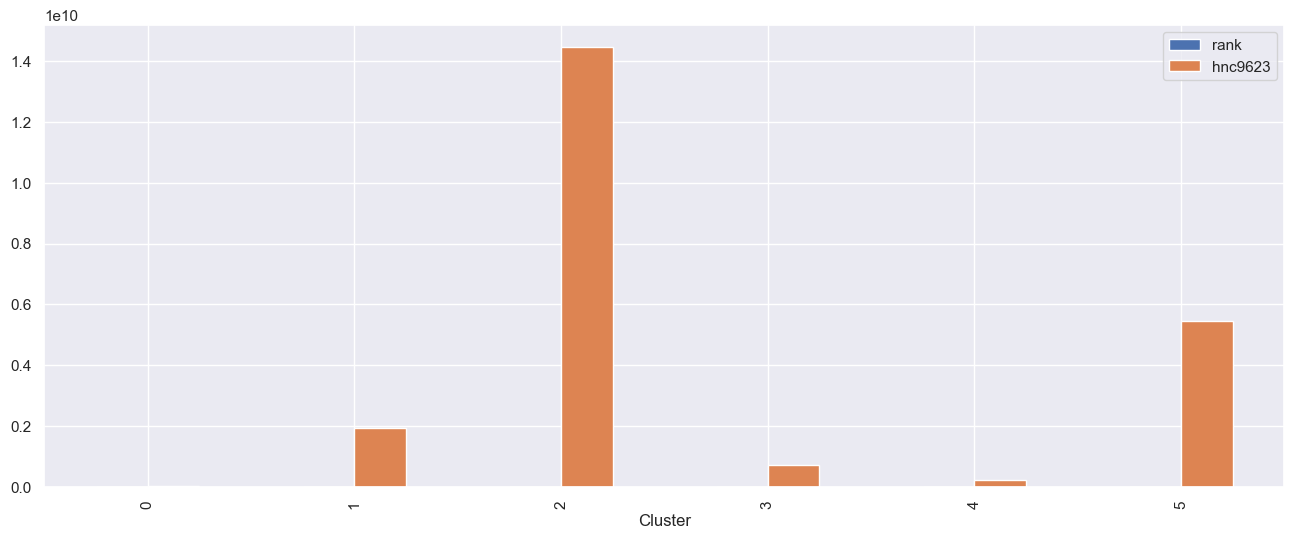

In [186]:
# Set "optimal" Number of Clusters
num_clust = 6

Bivariate_KMeansPlus_optimal('hnc9623', '\thnc9623')

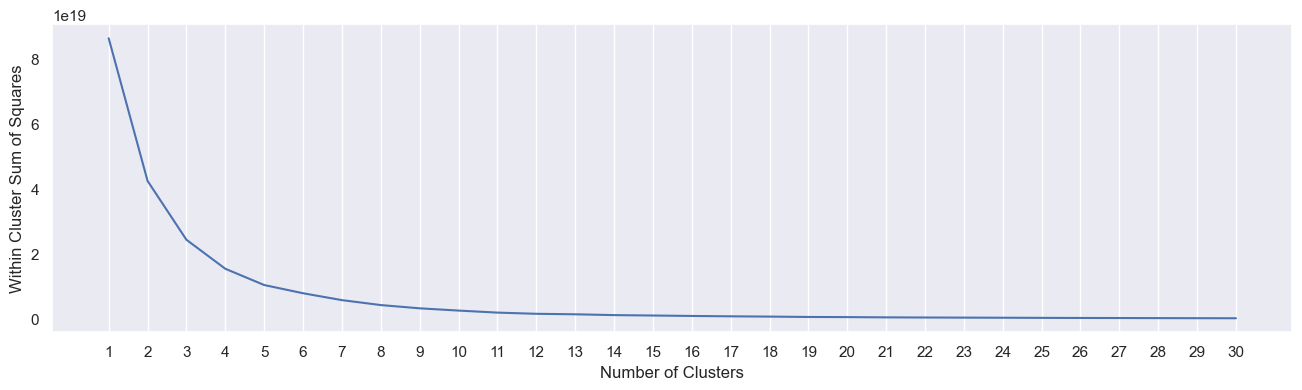

In [187]:
Bivariate_KMeansPlus_WithinSS('hncsf')

Features 	hncsf 	rank

Cluster 0:	53234.28	3730896.16	
Cluster 1:	15.12	1717711289.42	
Cluster 2:	1275.2	115722753.71	
Cluster 3:	6571.61	33964976.92	
Cluster 4:	48.39	794440559.46	
Cluster 5:	347.31	319968723.89	

Within Cluster Sum of Squares : 7.882986907832532e+18



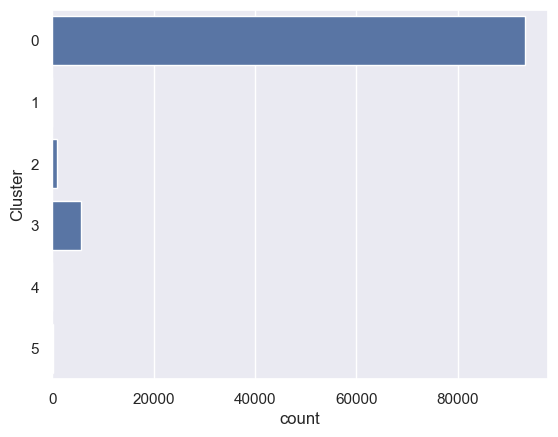

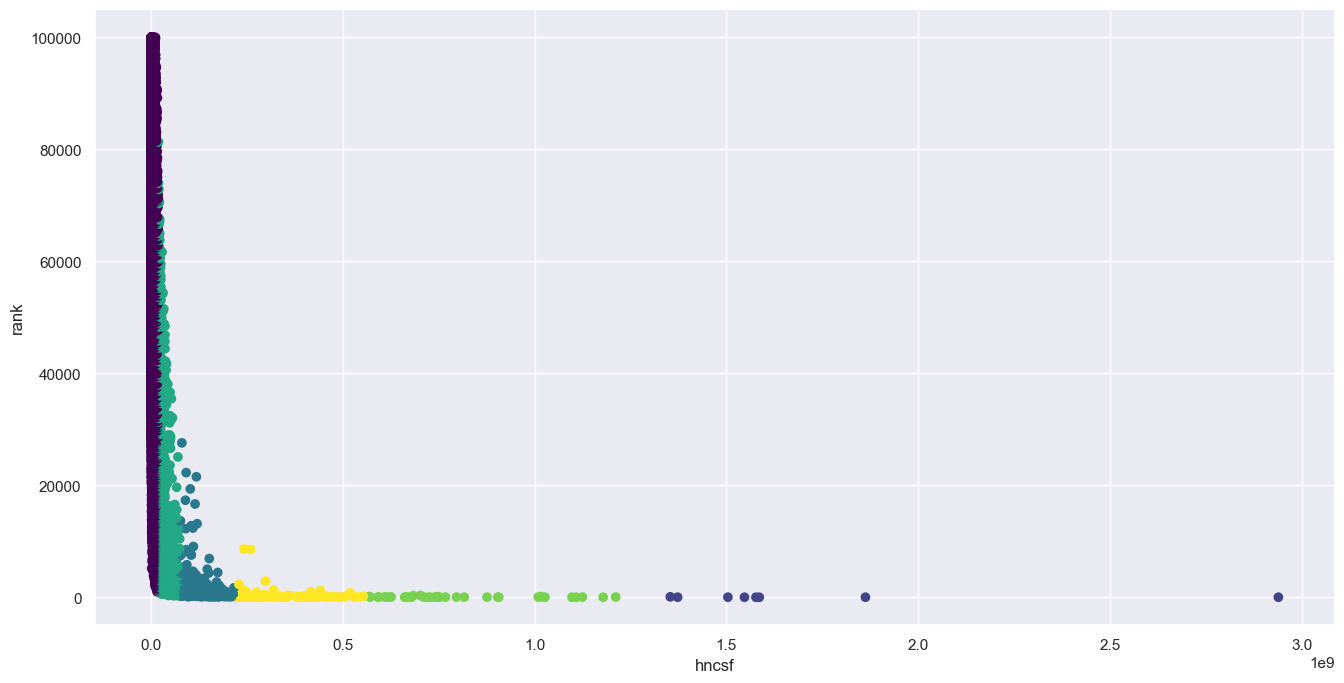

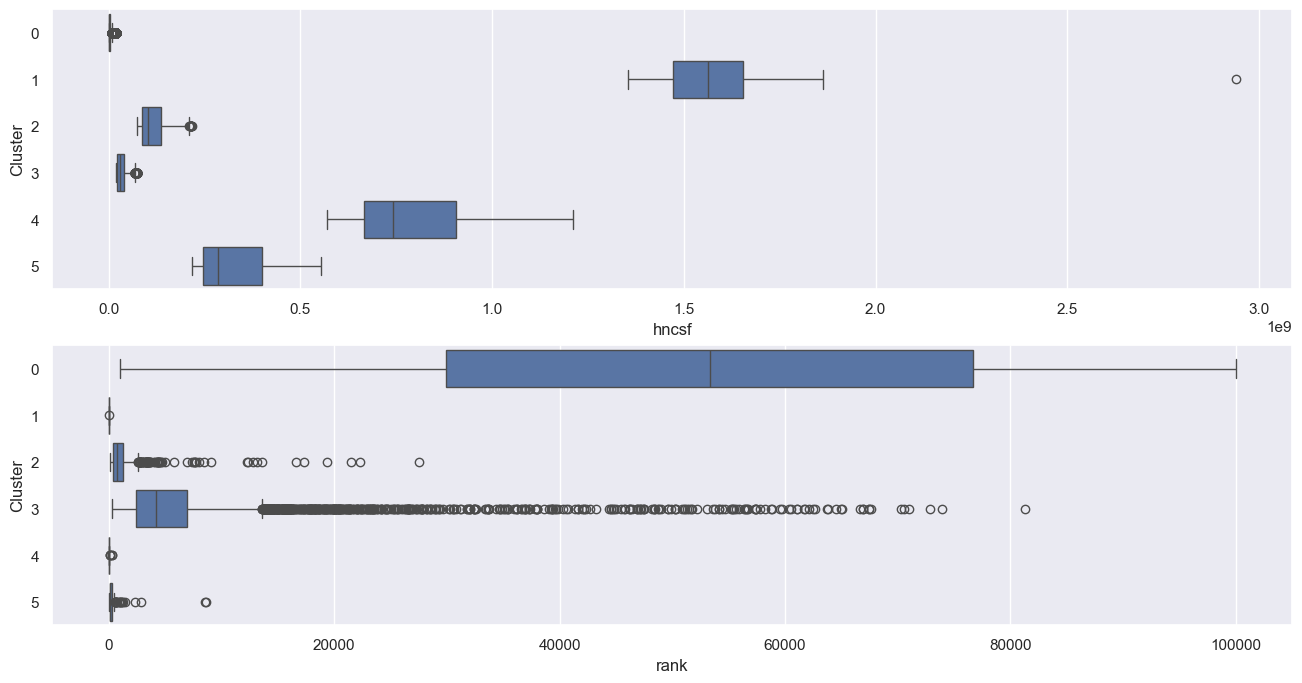

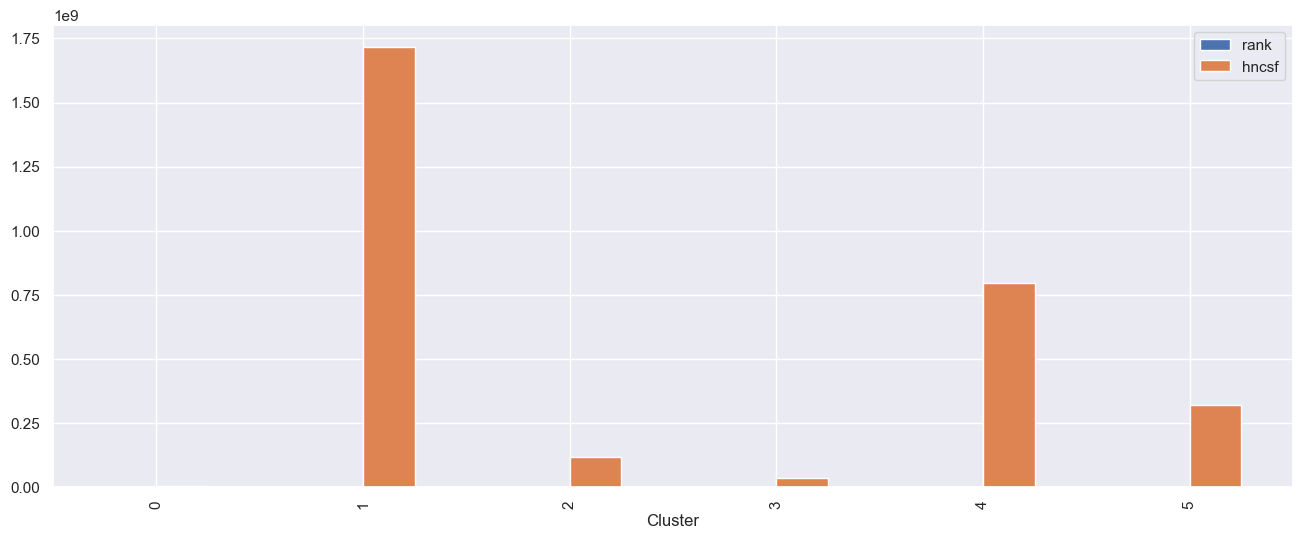

In [188]:
# Set "optimal" Number of Clusters
num_clust = 6

Bivariate_KMeansPlus_optimal('hncsf', '\thncsf')

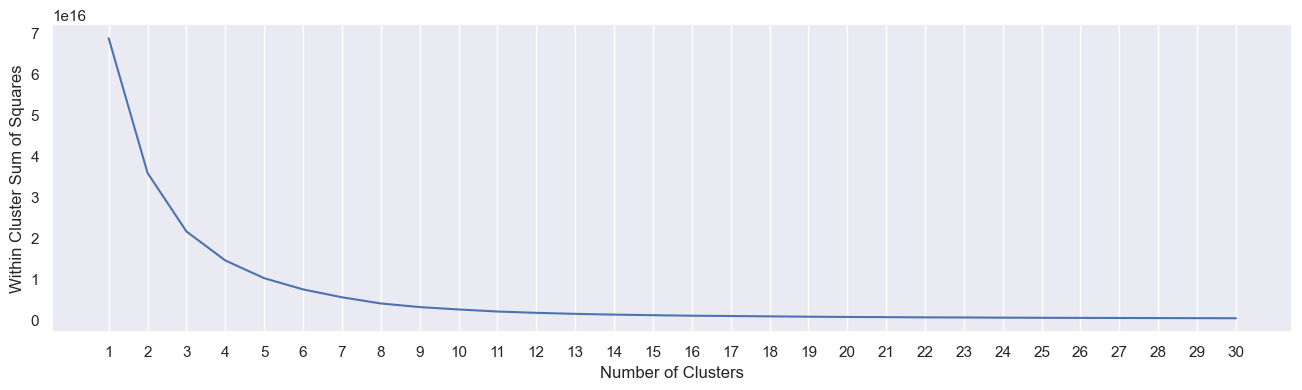

In [193]:
Bivariate_KMeansPlus_WithinSS('hnpsfl')

Features 	hnpsfl 	rank

Cluster 0:	20922.88	845491.05	
Cluster 1:	3498.32	6280852.05	
Cluster 2:	55710.87	154825.0	
Cluster 3:	2019.19	14176722.29	
Cluster 4:	7963.4	2535175.73	
Cluster 5:	162.7	35729088.7	

Within Cluster Sum of Squares : 7319770288750726.0



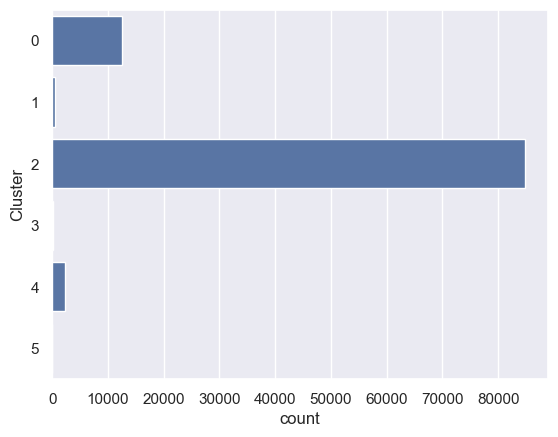

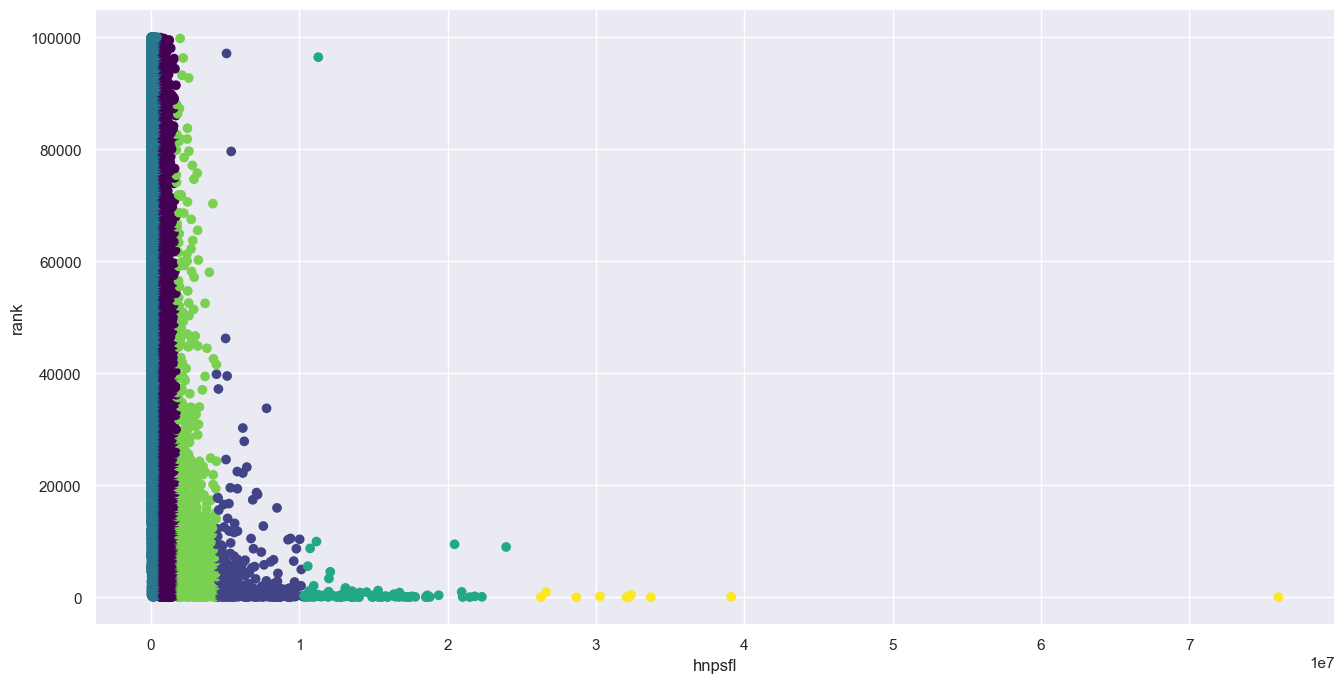

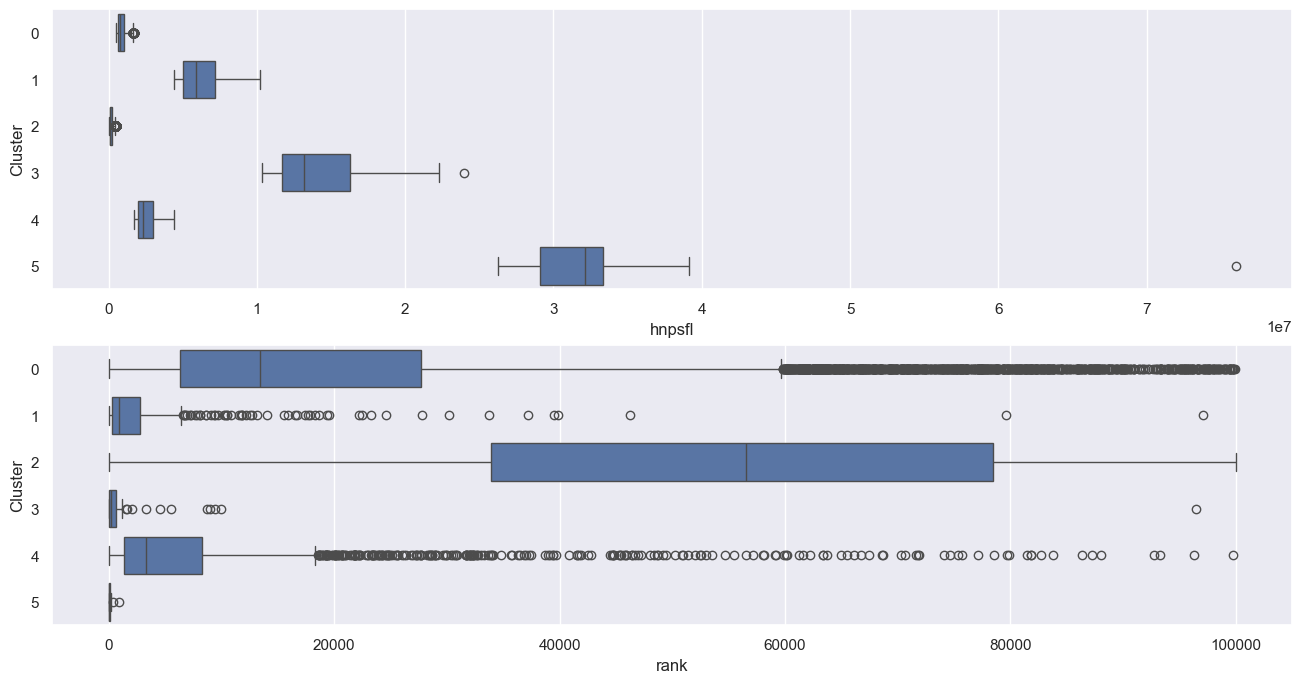

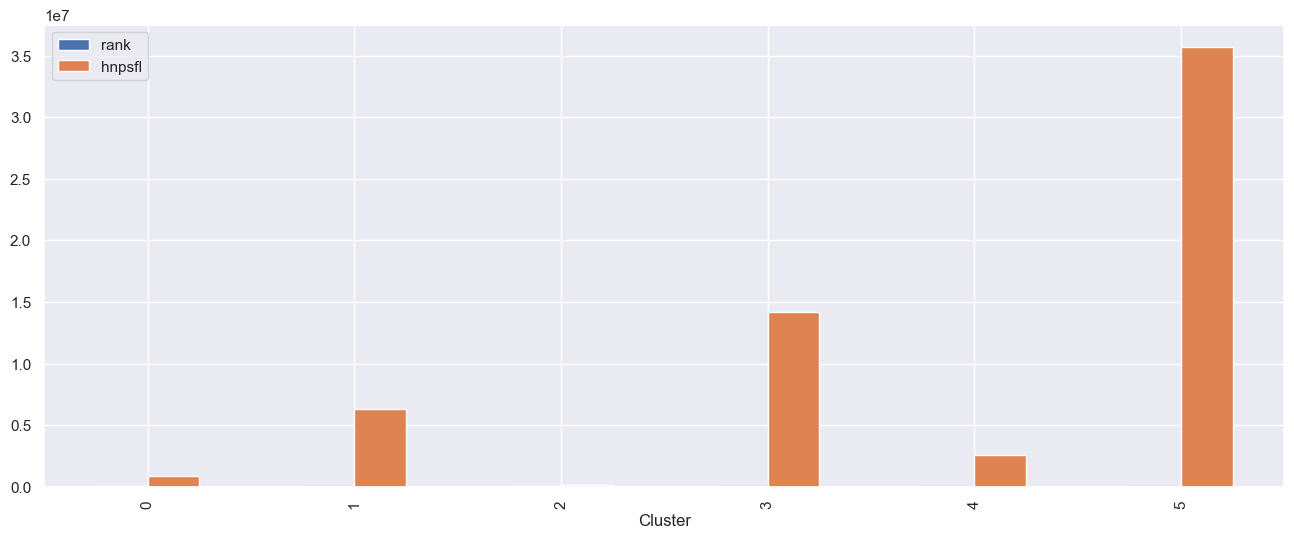

In [194]:
# Set "optimal" Number of Clusters
num_clust = 6

Bivariate_KMeansPlus_optimal('hnpsfl', '\thnpsfl')

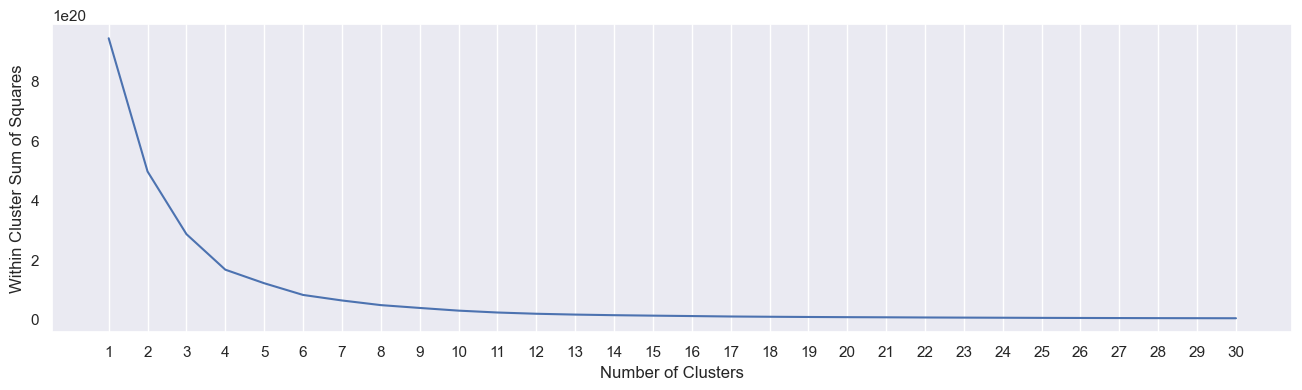

In [195]:
Bivariate_KMeansPlus_WithinSS('hncsfl')

Features 	hncsfl 	rank

Cluster 0:	52889.45	10659074.42	
Cluster 1:	409.79	1776503486.12	
Cluster 2:	8525.17	113369633.04	
Cluster 3:	22.8	4618975732.86	
Cluster 4:	1.5	9393461387.97	
Cluster 5:	911.9	918976318.81	
Cluster 6:	2765.1	376134082.26	

Within Cluster Sum of Squares : 6.148869132735319e+19



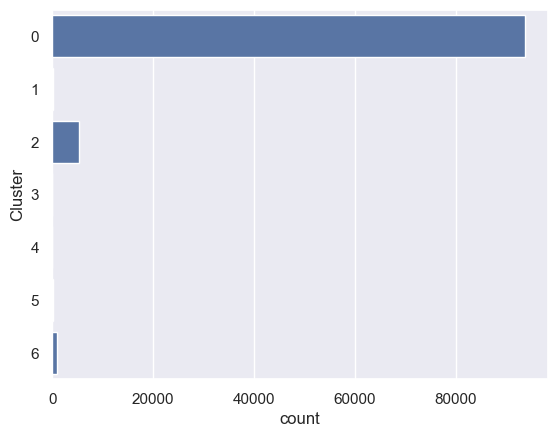

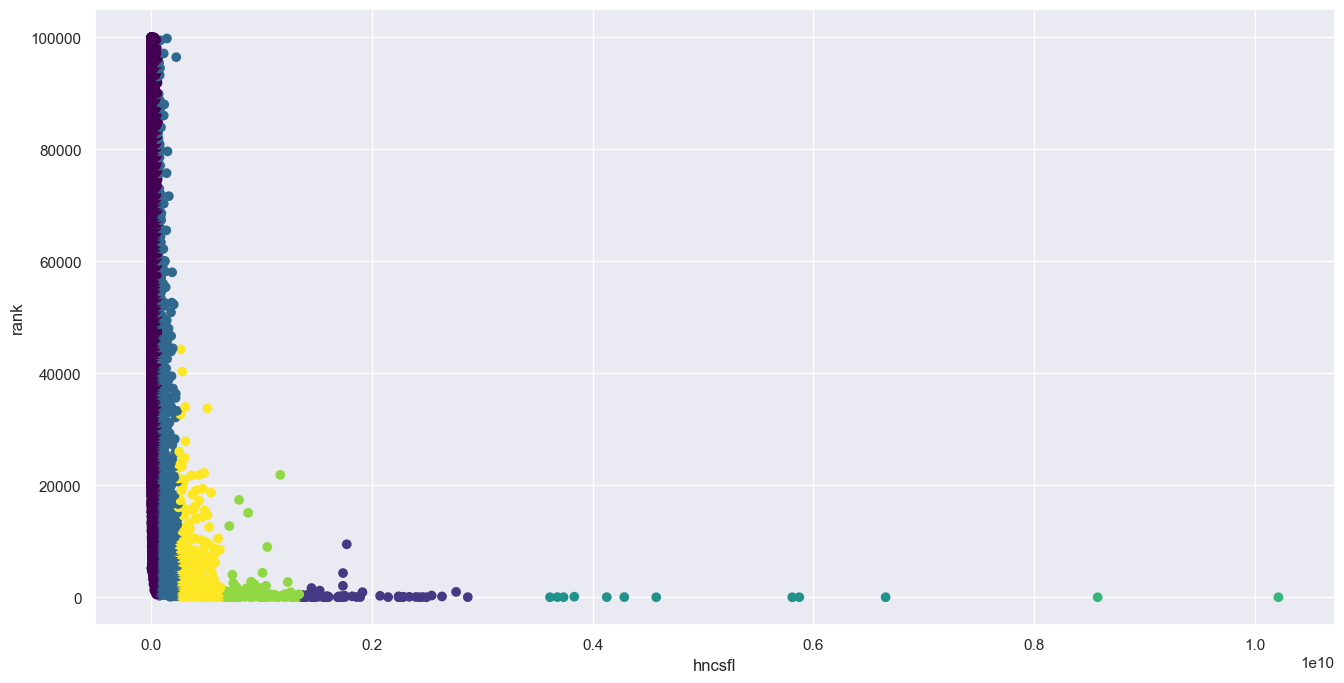

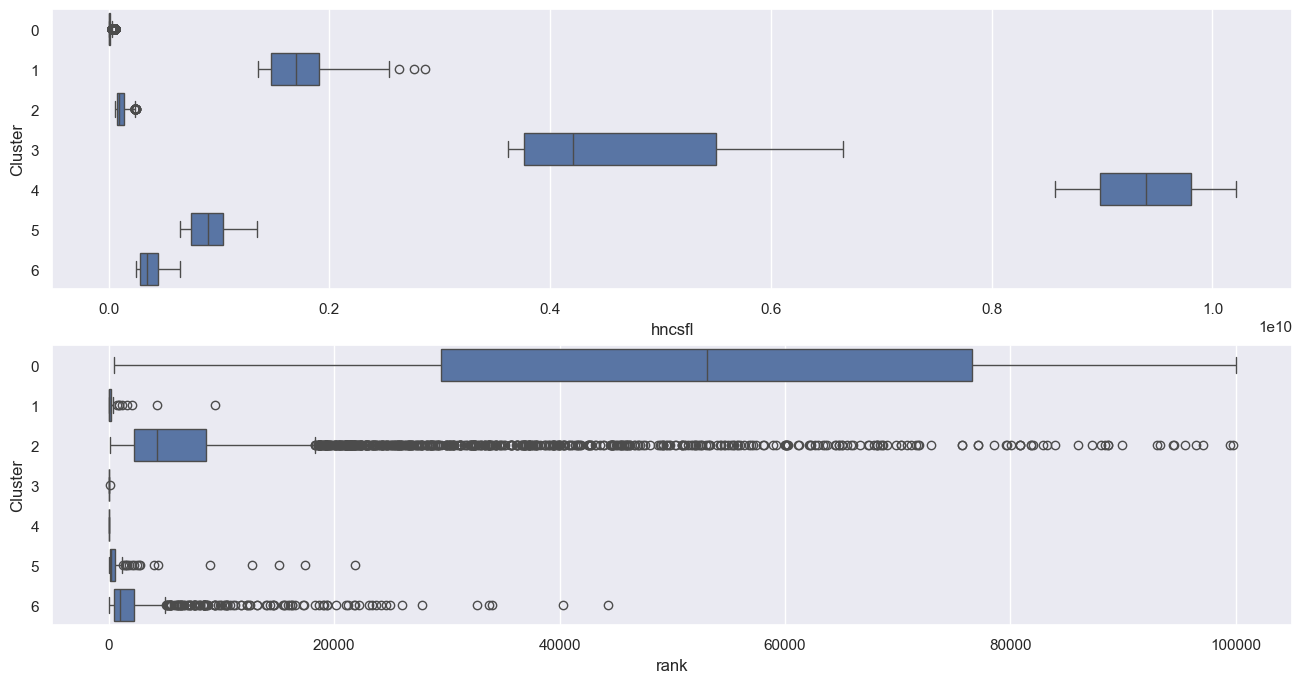

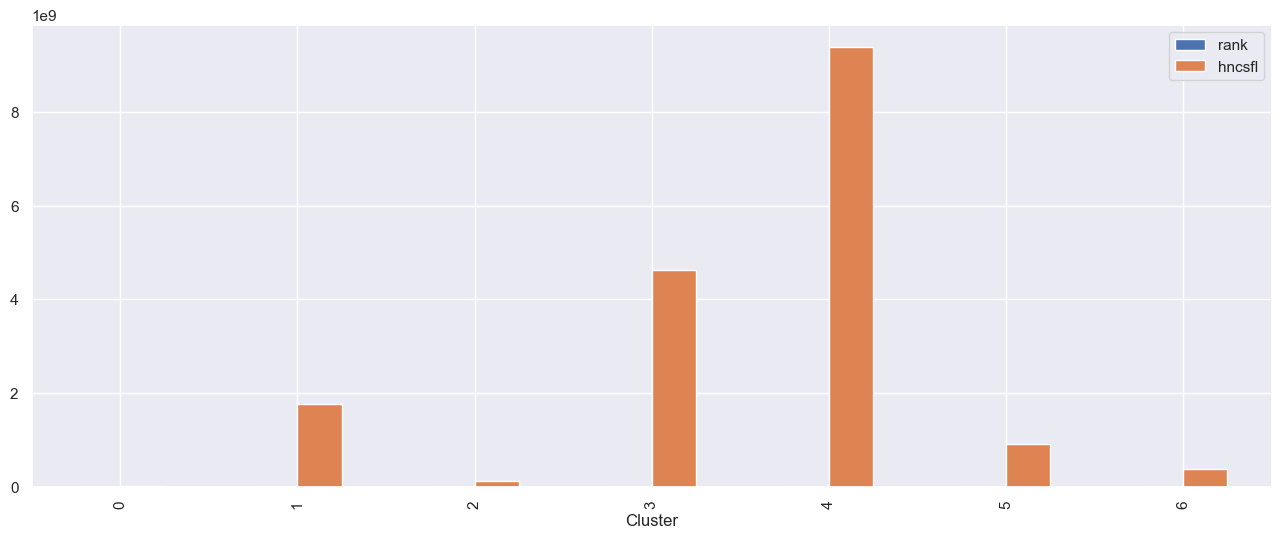

In [196]:
# Set "optimal" Number of Clusters
num_clust = 7

Bivariate_KMeansPlus_optimal('hncsfl', '\thncsfl')

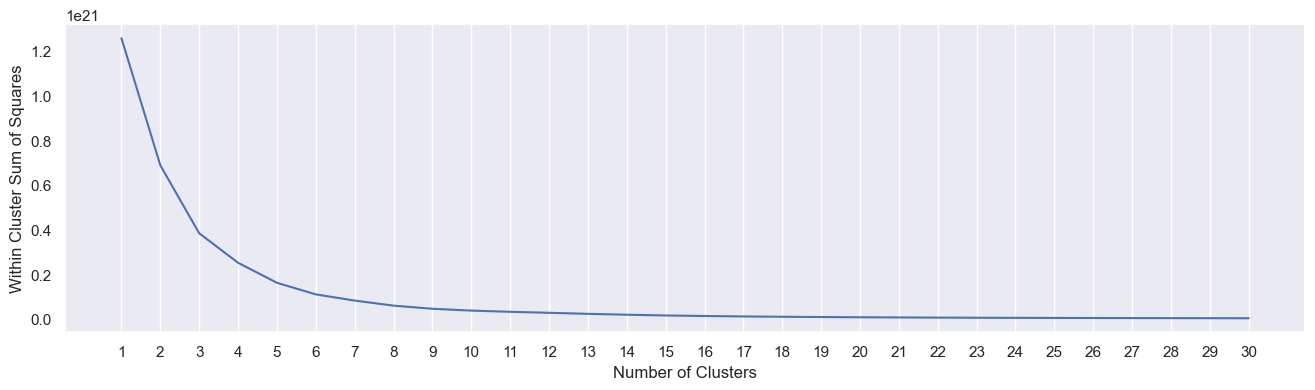

In [201]:
Bivariate_KMeansPlus_WithinSS('hnpciting')

Features 	hnpciting 	rank

Cluster 0:	53371.49	13716865.85	
Cluster 1:	1298.14	1150160393.77	
Cluster 2:	6.0	10493519316.99	
Cluster 3:	200.23	3520689470.12	
Cluster 4:	5278.06	413045701.84	
Cluster 5:	15350.77	124193461.06	

Within Cluster Sum of Squares : 1.1015366745664396e+20



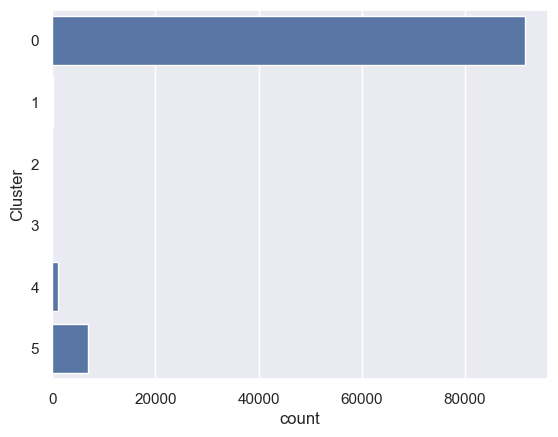

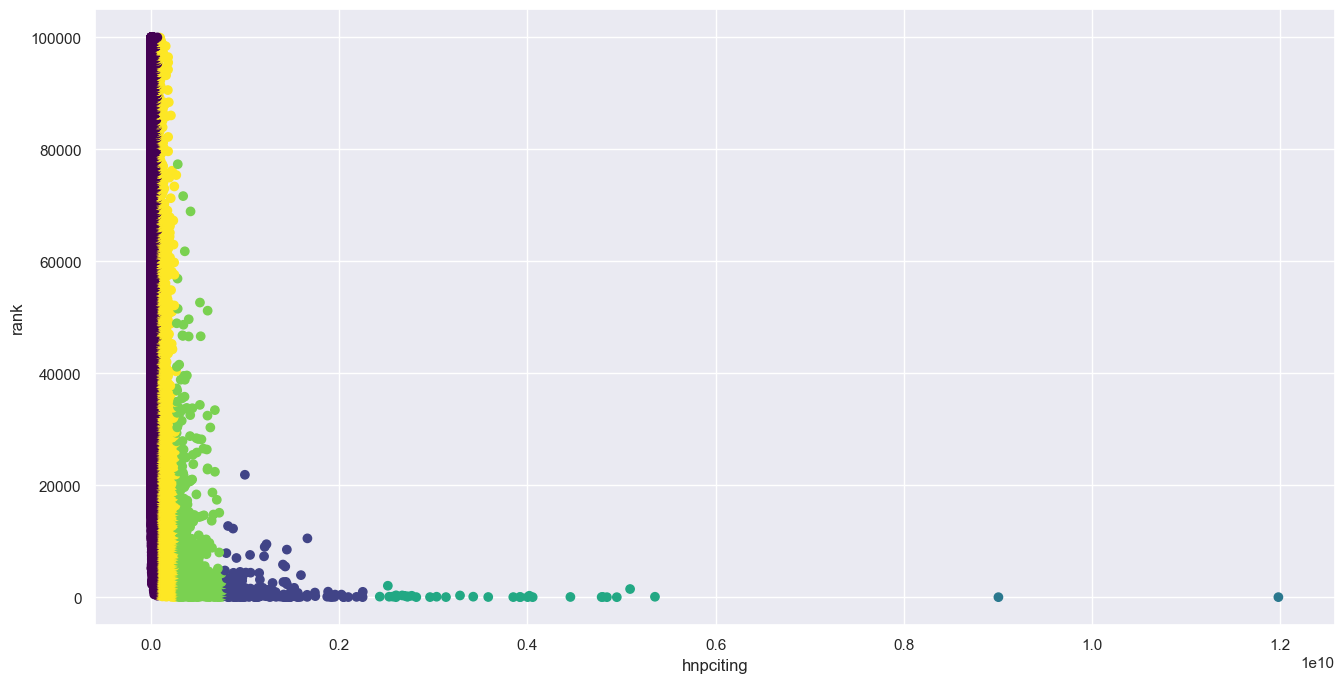

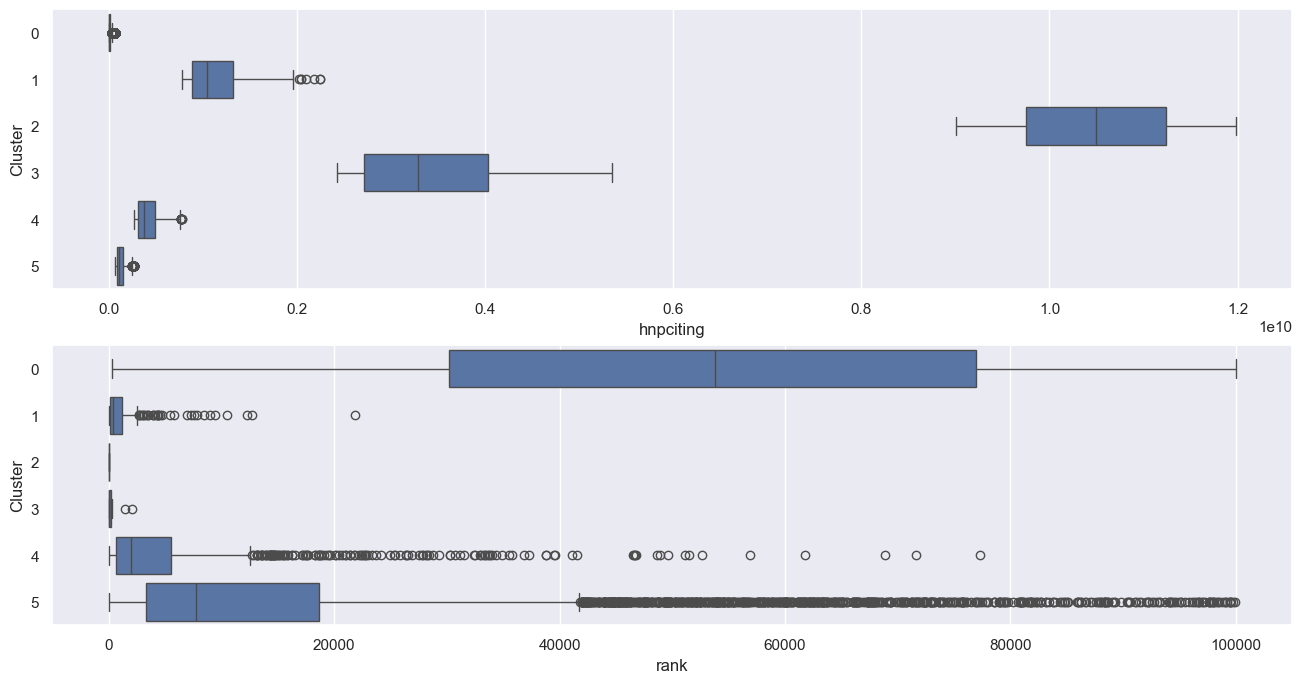

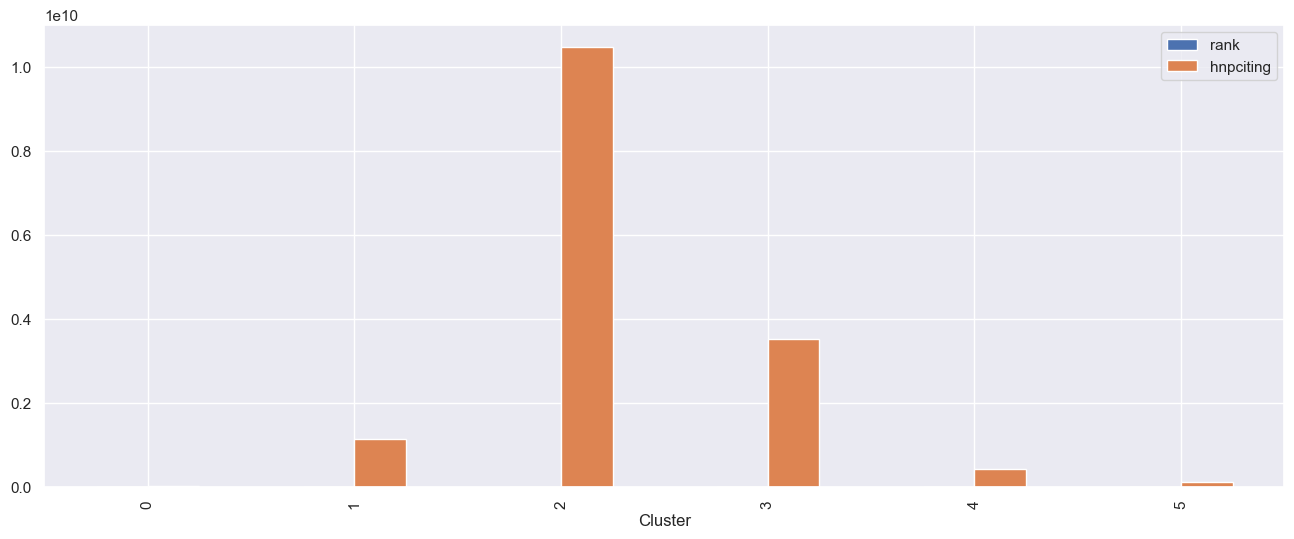

In [202]:
# Set "optimal" Number of Clusters
num_clust = 6

Bivariate_KMeansPlus_optimal('hnpciting', '\thnpciting')

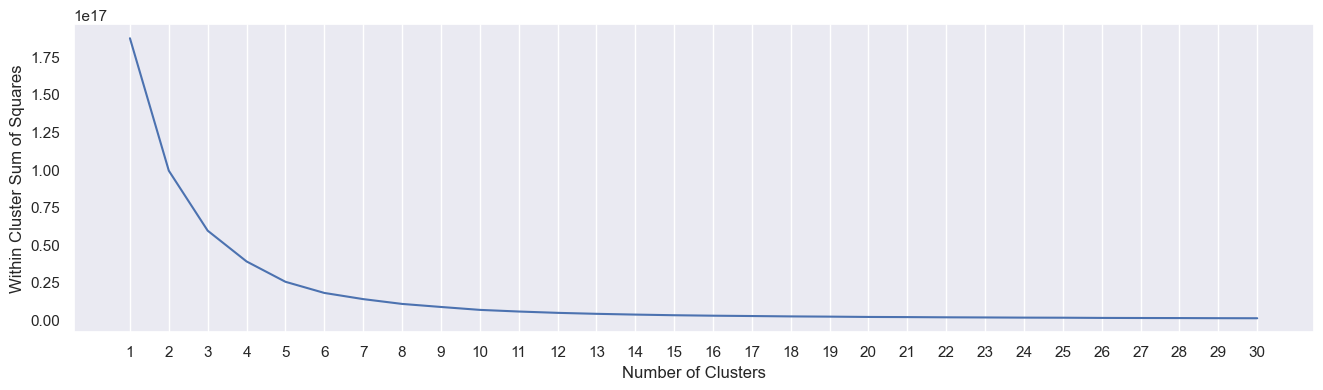

In [203]:
Bivariate_KMeansPlus_WithinSS('hnp6023 cited9623')

Features 	hnp6023 cited9623 	rank

Cluster 0:	6102.43	6408387.26	
Cluster 1:	56949.9	213260.4	
Cluster 2:	256.43	70447870.36	
Cluster 3:	2363.09	13497008.07	
Cluster 4:	13419.64	2804756.53	
Cluster 5:	1171.2	28096494.4	
Cluster 6:	27741.71	1040045.13	

Within Cluster Sum of Squares : 1.3321682957371278e+16



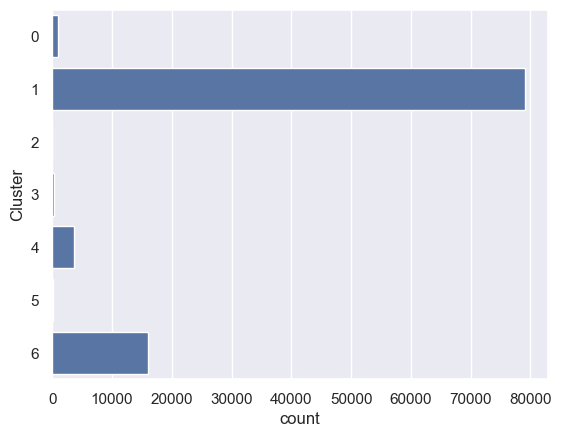

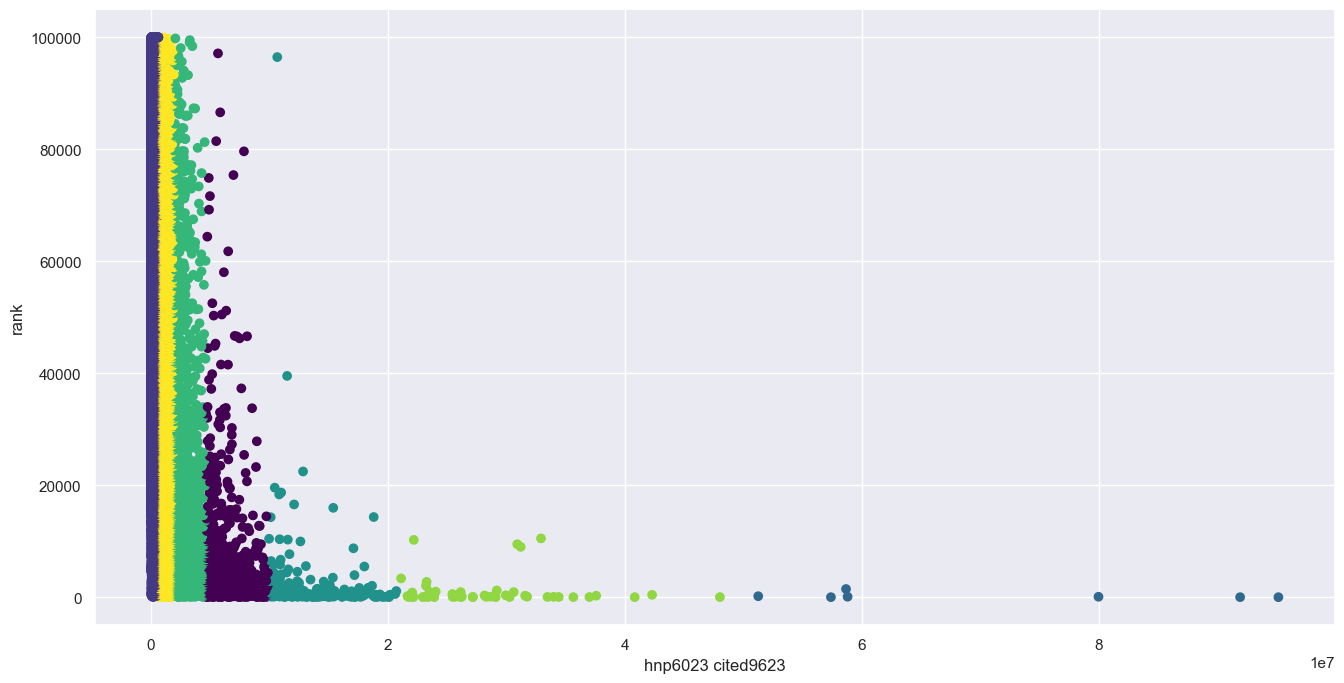

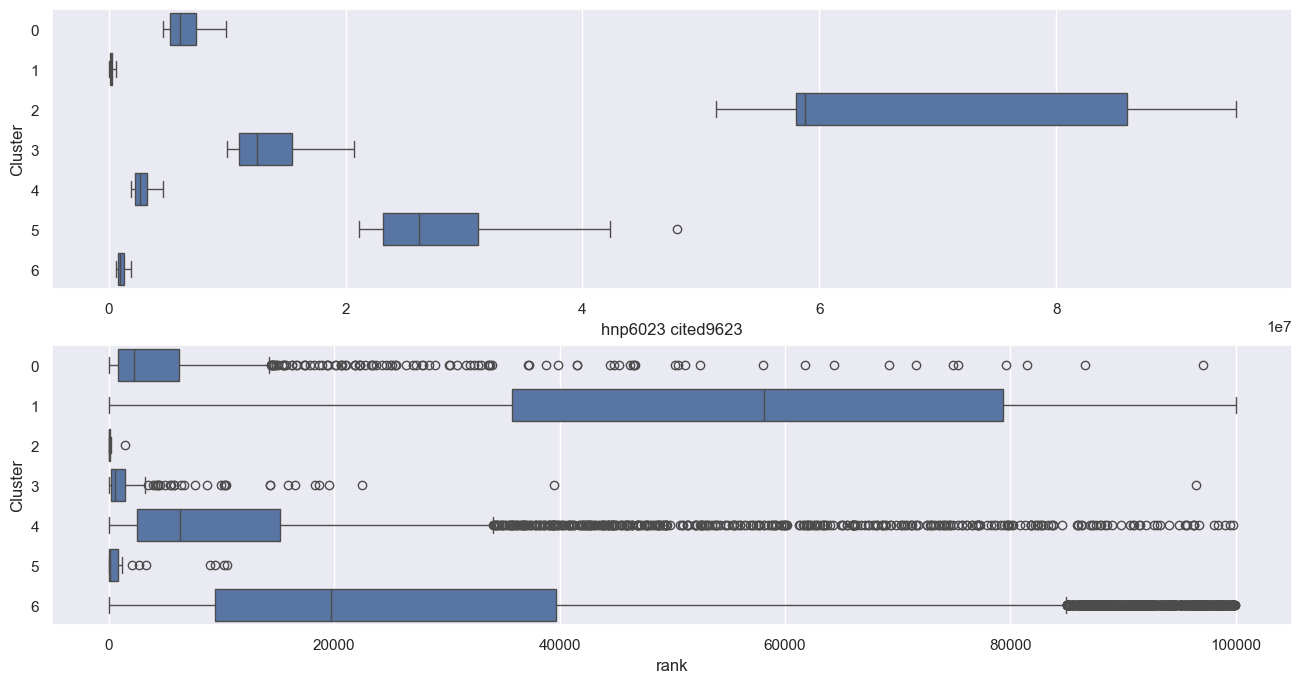

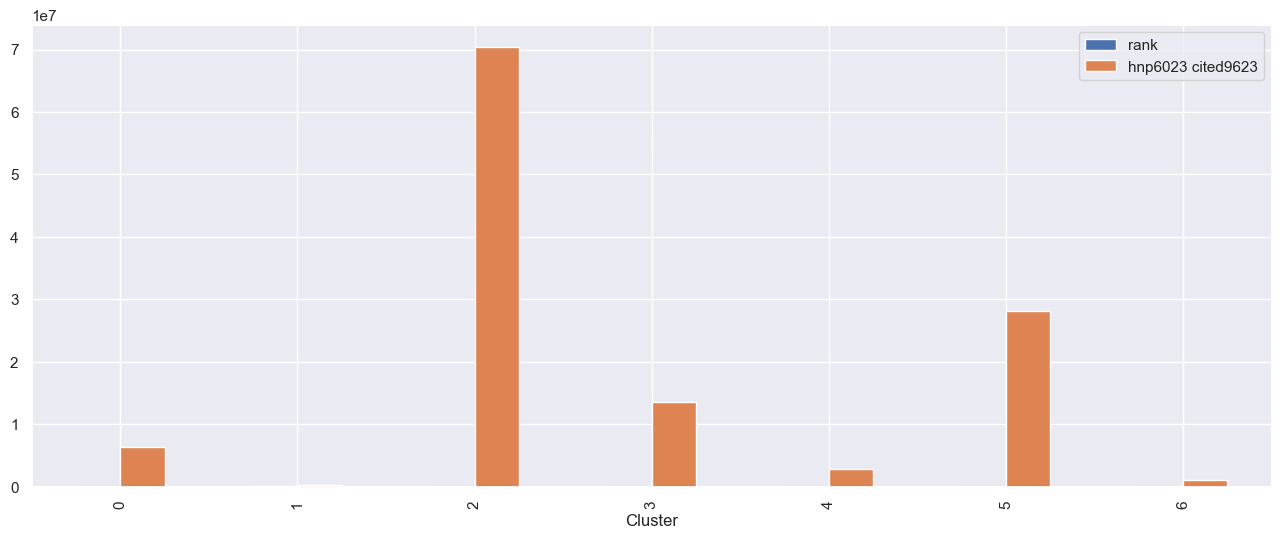

In [204]:
# Set "optimal" Number of Clusters
num_clust = 7

Bivariate_KMeansPlus_optimal('hnp6023 cited9623', '\thnp6023 cited9623')

From our attempts above, we can see that no matter we use KMeans or KMeans++, the simple bi-variate clustering cannot be directly used on our current dataset to achieve our goal as scatter-plot visualisations were not very clear in terms of cluster 'boundary' and give us a quite uneven distribution of 'dots' among clusters, even though we use the within cluster sum of squares to help us to determine the optimal number of clusters. This suggests that any individual feature or variable might not have direct and obvious impact only on itself in the rank of a scientist, and they may affect the ranking in a more collective way instead.

## Multi-Variate (KMeans++) Clustering

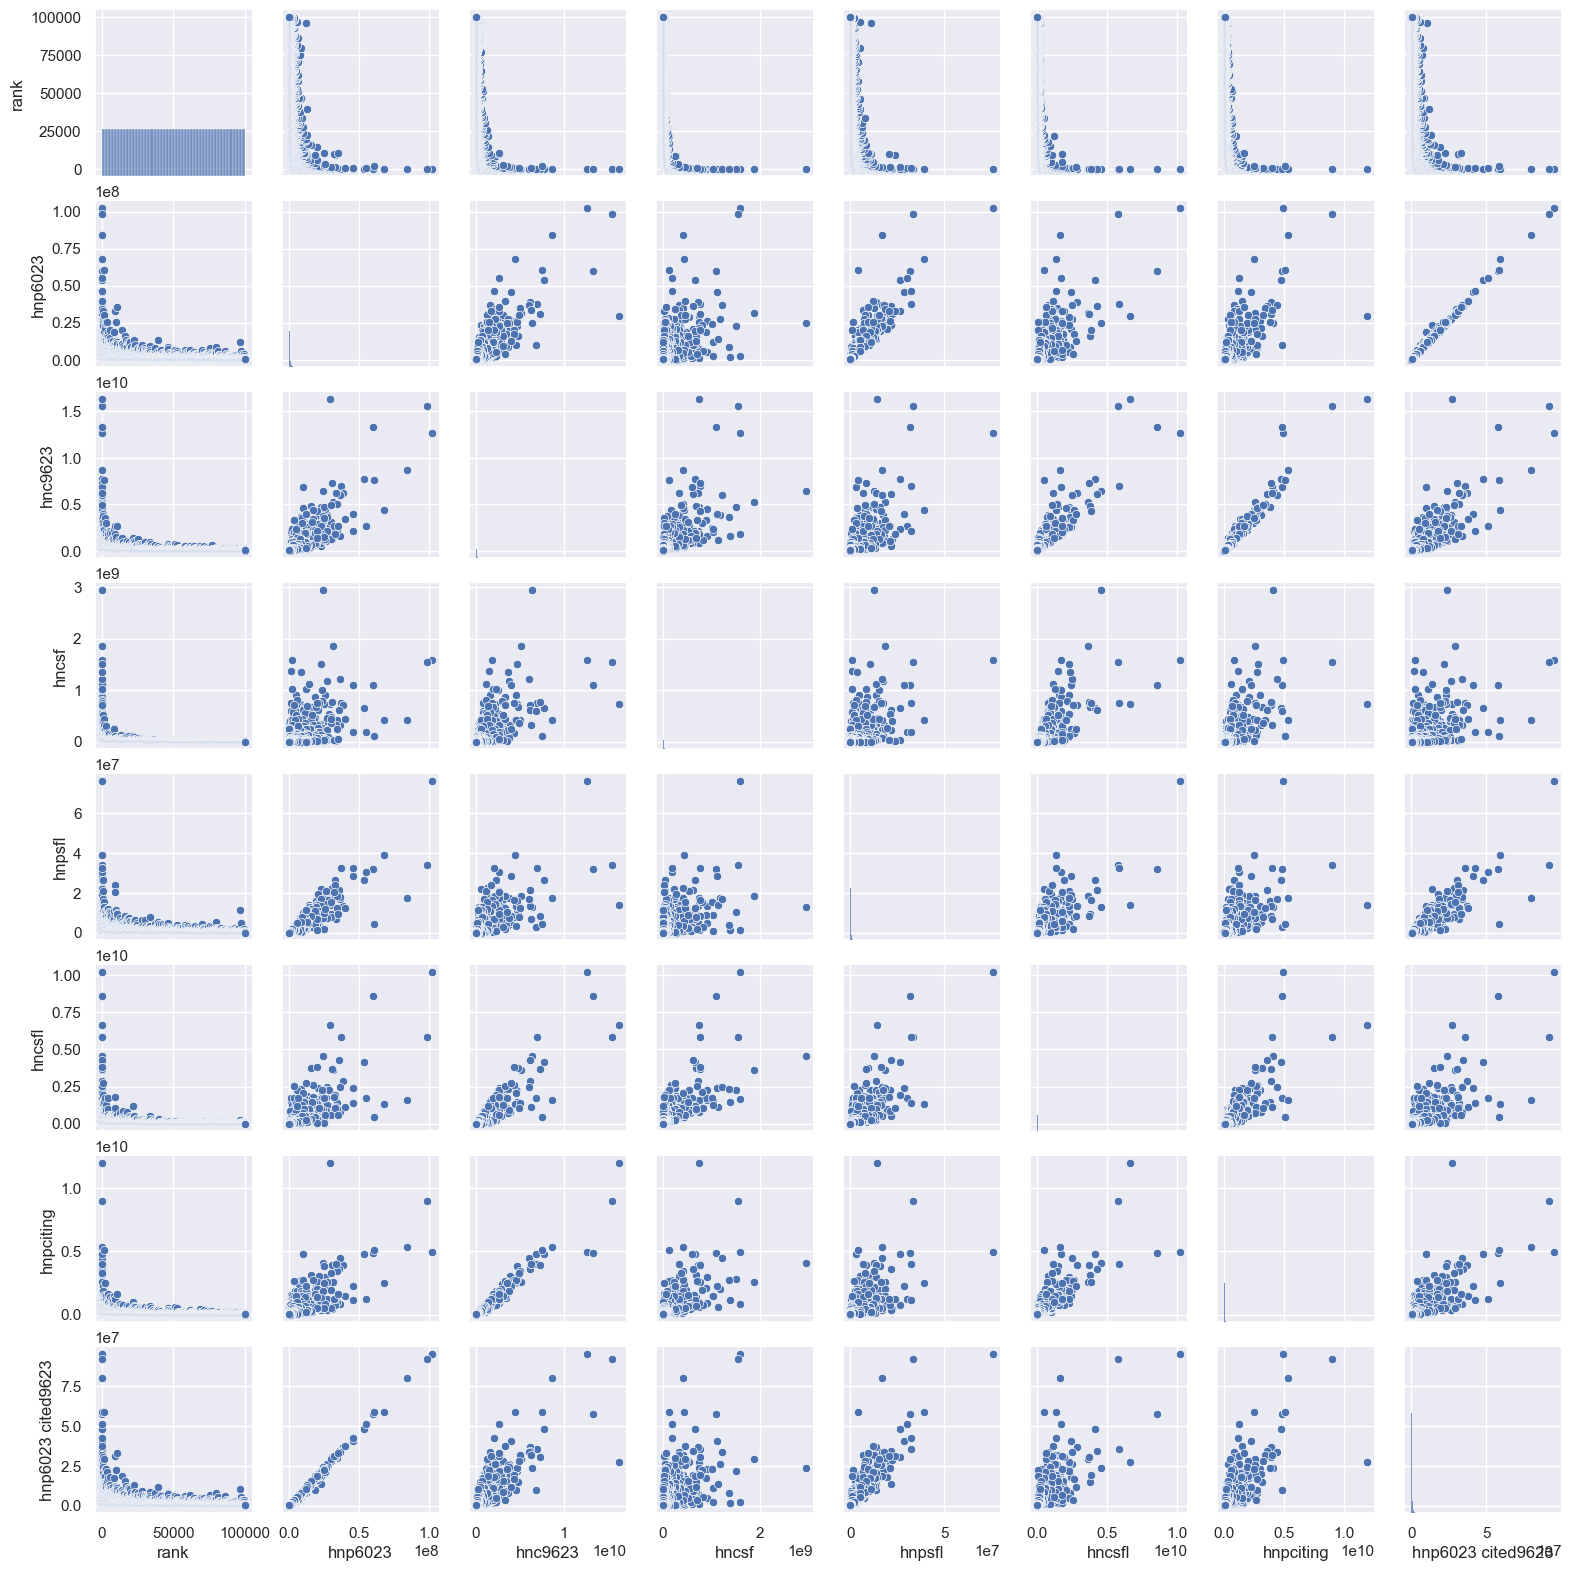

In [209]:
# Extract the Features from our Data
X = pd.DataFrame(sci3[['rank', 'hnp6023', 'hnc9623', 'hncsf', 'hnpsfl', 'hncsfl', 'hnpciting', 'hnp6023 cited9623']])

# Plot the Raw Data on 2D grids
sb.pairplot(X, height=2)

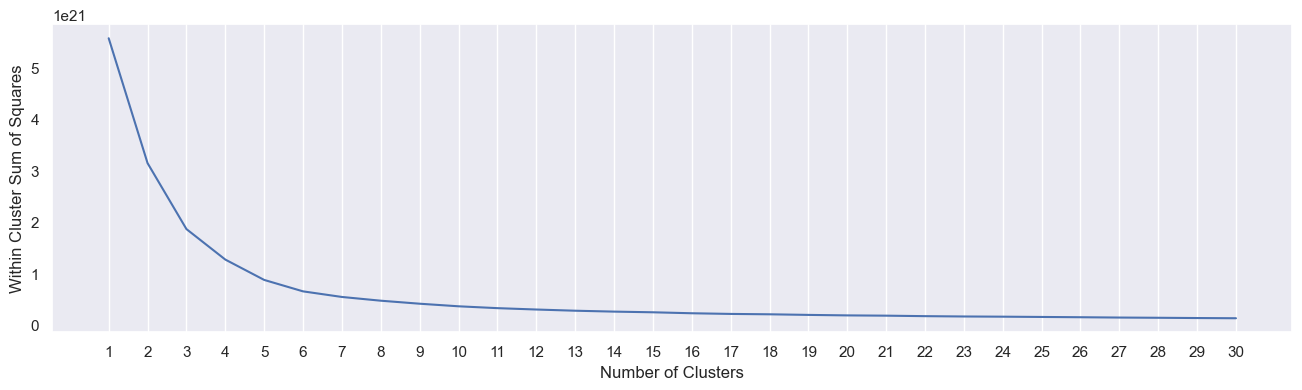

In [215]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Vary the Number of Clusters
min_clust = 1
max_clust = 30
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

In [217]:
# Import essential models from sklearn
from sklearn.cluster import KMeans

# Set "optimal" Clustering Parameters
num_clust = 6
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(n_clusters=6, n_init=20)

Features 	rank 	hnp6023 	hnc9623 	hncsf 	hnpsfl 	hncsfl 	hnpciting 	hnp6023 cited9623

Cluster 0:	53006.85	381145.95	21427491.36	4248238.15	219631.02	10840797.7	14709851.99	340796.44	
Cluster 1:	960.01	14866960.57	2018006513.8	249220321.25	7892880.73	1072380845.53	1240188876.78	13812042.63	
Cluster 2:	3371.22	6926767.06	762537640.58	99231198.89	3614444.72	364148488.49	480755695.27	6370712.84	
Cluster 3:	159.46	30962009.7	5362788837.09	793925777.1	13669911.16	2563160645.56	3415829105.67	28893998.73	
Cluster 4:	3.75	72457148.24	14471150895.22	1239662390.28	38949182.79	7812357664.27	7695386031.52	67902897.61	
Cluster 5:	11945.07	2577721.08	221670526.8	30839843.53	1359961.52	103350774.38	145277783.41	2348233.76	

Within Cluster Sum of Squares : 6.483107349215937e+20



<Axes: xlabel='count', ylabel='Cluster'>

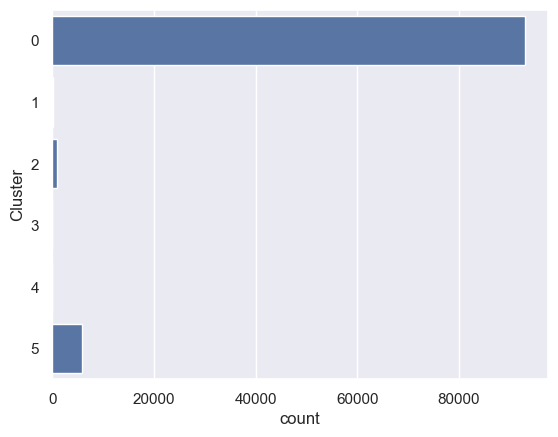

In [218]:
# Print the Cluster Centers
print("Features",'\trank', '\thnp6023', '\thnc9623', '\thncsf', '\thnpsfl', '\thncsfl', '\thnpciting', '\thnp6023 cited9623')
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

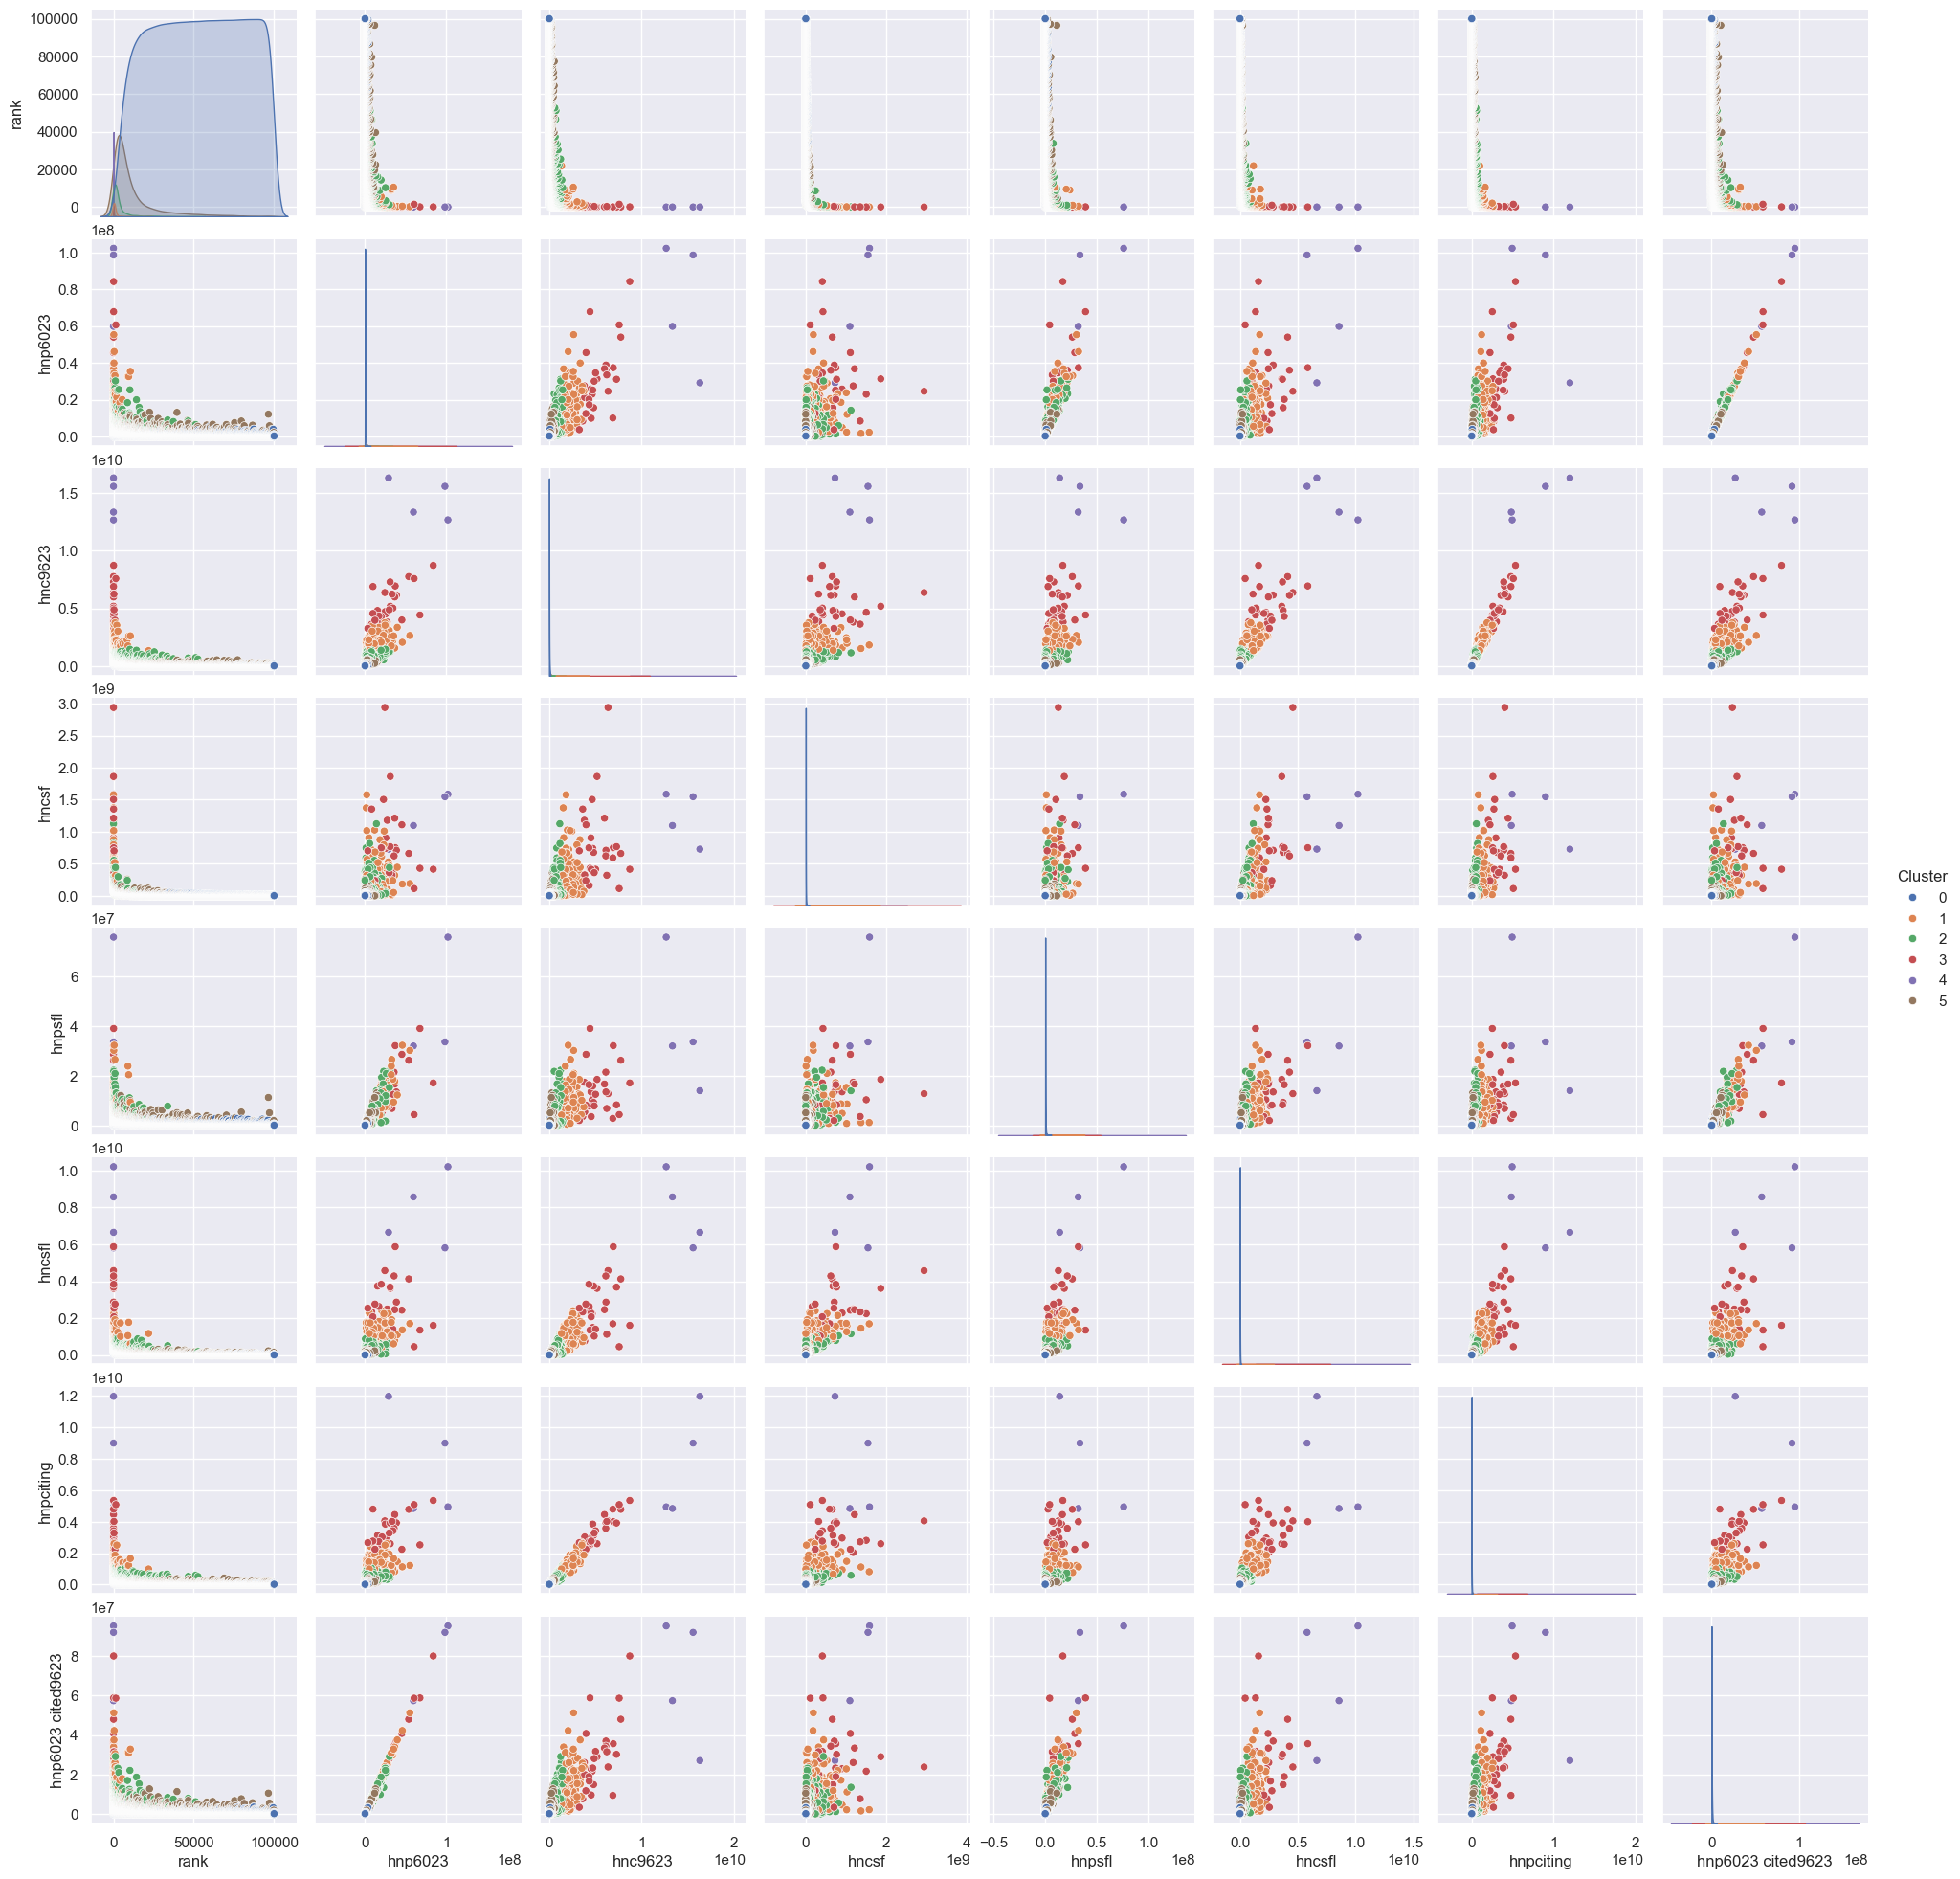

In [221]:
# Plot the Clusters on 2D grids
sb.pairplot(X_labeled, vars = X.columns.values, hue = "Cluster")

<Axes: xlabel='Cluster'>

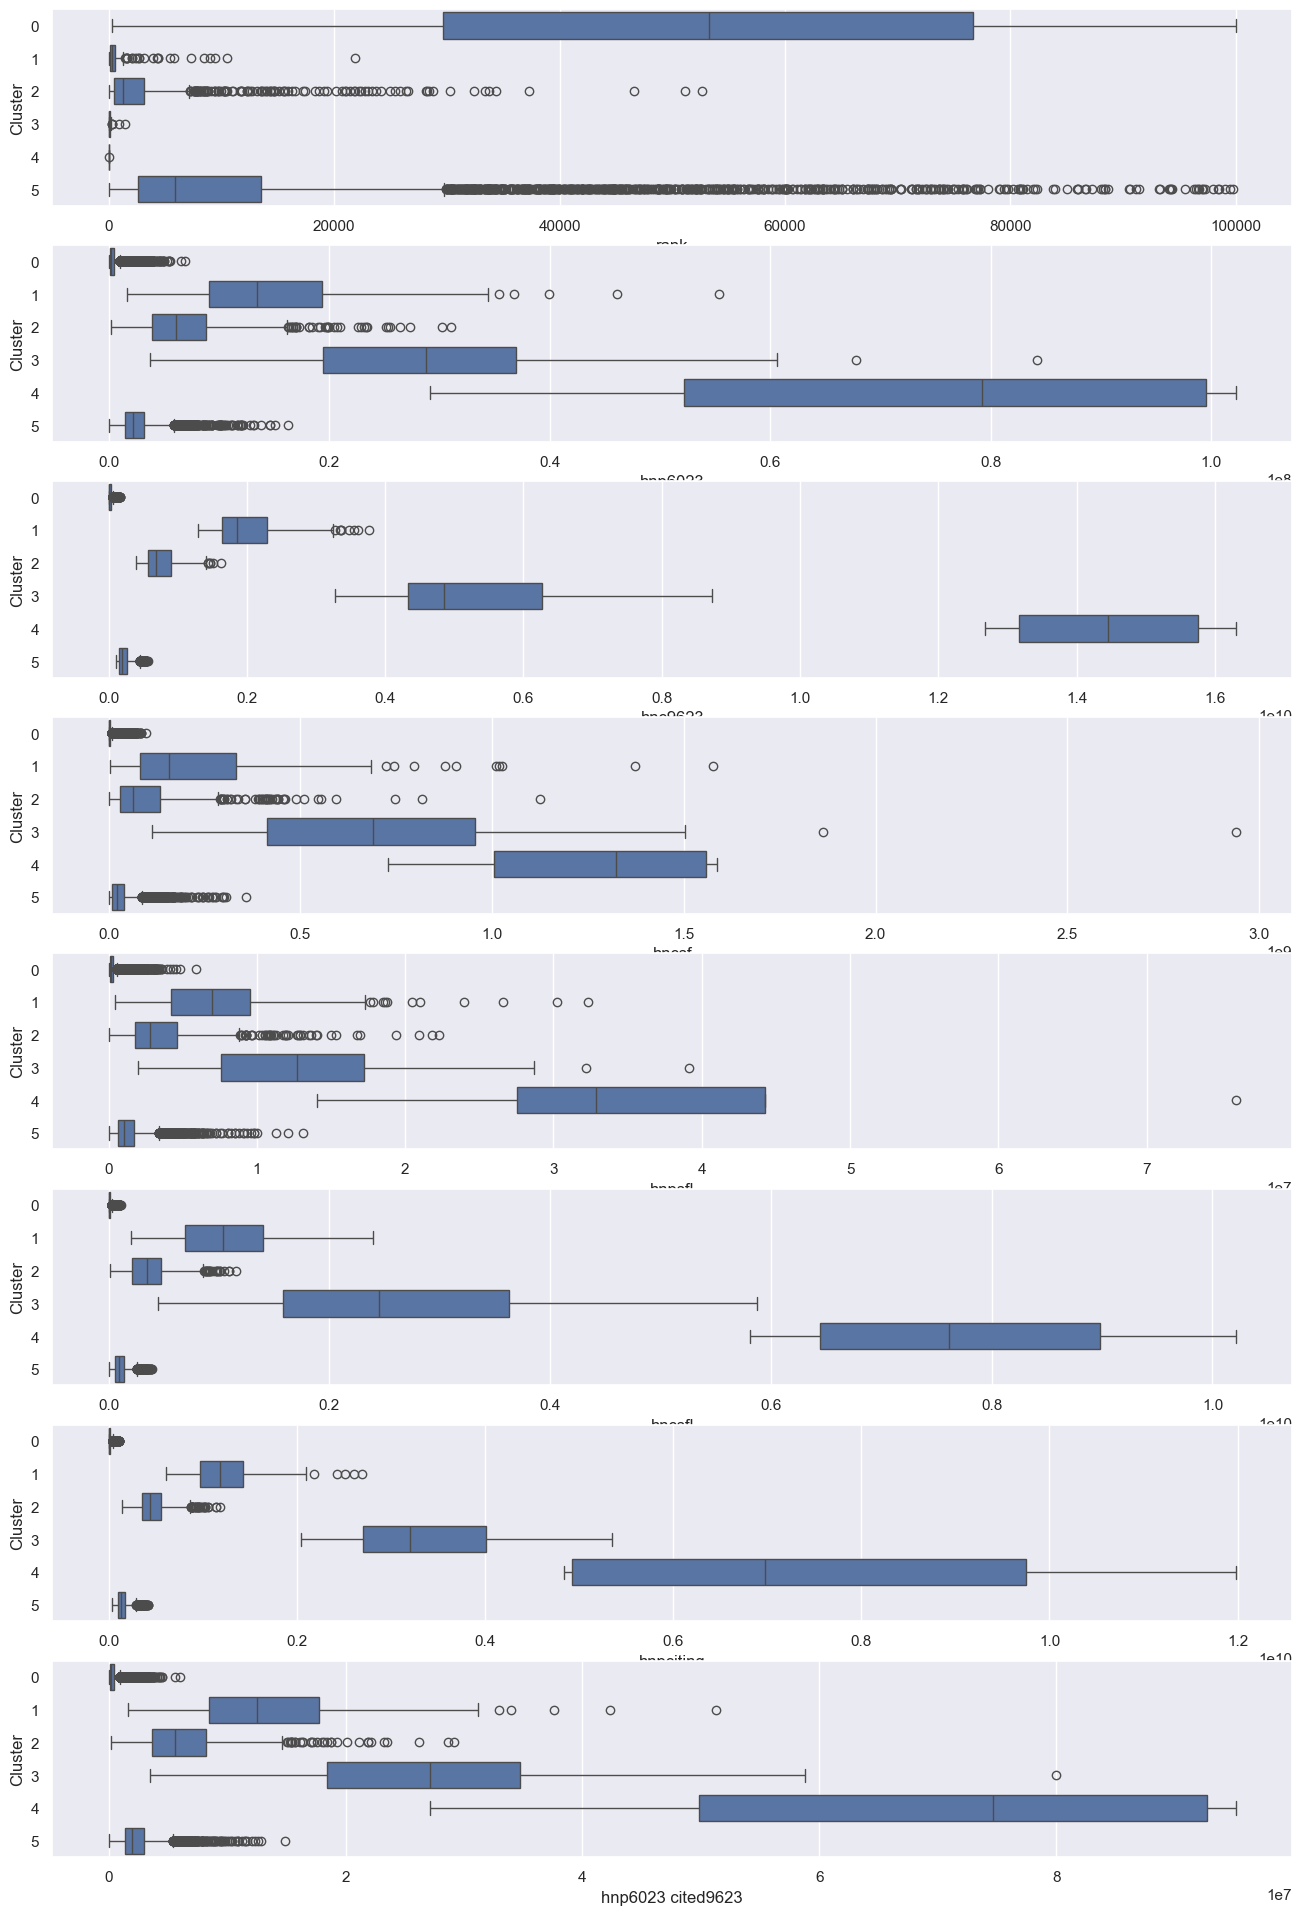

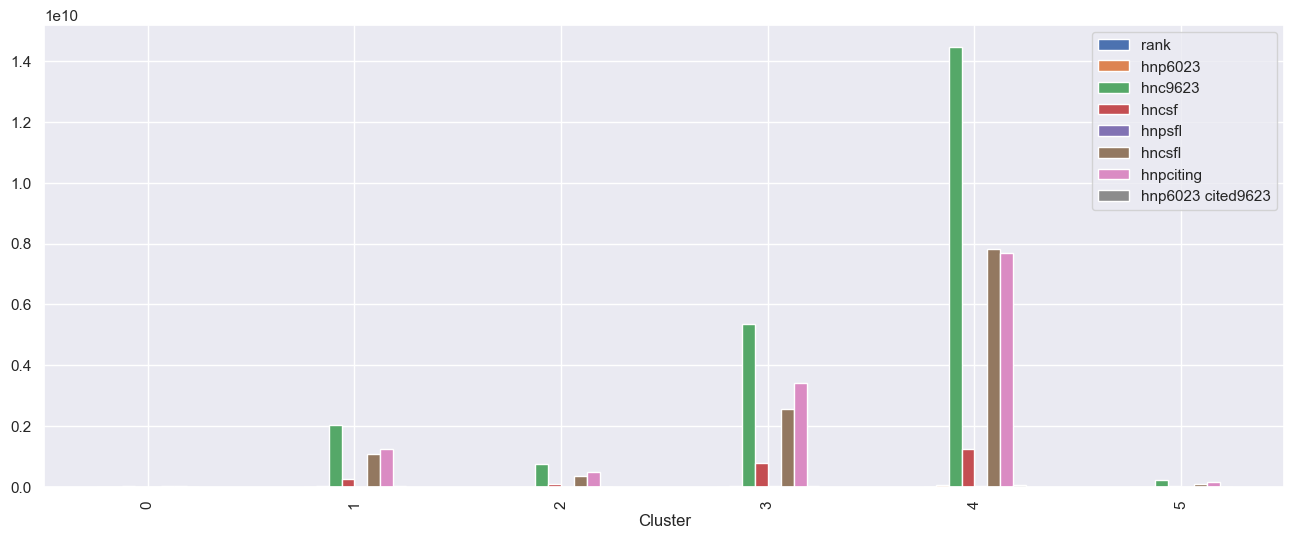

In [222]:
# Boxplots for all Features against the Clusters
f, axes = plt.subplots(8, 1, figsize=(16,24))
sb.boxplot(x = 'rank', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'hnp6023', y = 'Cluster', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'hnc9623', y = 'Cluster', data = X_labeled, ax = axes[2])
sb.boxplot(x = 'hncsf', y = 'Cluster', data = X_labeled, ax = axes[3])
sb.boxplot(x = 'hnpsfl', y = 'Cluster', data = X_labeled, ax = axes[4])
sb.boxplot(x = 'hncsfl', y = 'Cluster', data = X_labeled, ax = axes[5])
sb.boxplot(x = 'hnpciting', y = 'Cluster', data = X_labeled, ax = axes[6])
sb.boxplot(x = 'hnp6023 cited9623', y = 'Cluster', data = X_labeled, ax = axes[7])

# Average Behaviour of each Cluster
cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
cluster_data.plot.bar(figsize = (16,6))

It can be seen that the problems of 'overlapping' phenomenon of boxplots and vague boundary & uneven distribution in scatter-plot visualisations still exist, so we switch to multi-variate linear regression in hope of obtaining better results.

## Multi-Variate Linear Regression

In [229]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

#Initialising linear regression model
linreg = LinearRegression()

#Splitting data into predictors(X) and response(Y) variables
X = sci3.iloc[:,1:] #Selecting all variables as predictor variables
Y = sci3.iloc[:,0] #Selecting `rank` as response variable

#Training the model using data
linreg.fit(X, Y)
print("Coefficient = ", linreg.coef_)

# prints in a DataFrame with columns and its corresponding coefficients
pd.DataFrame({"Feature":X.columns.tolist(),"Coefficients":linreg.coef_})

Coefficient =  [ 6.84522052e-03  1.08405256e-04 -1.73394271e-04 -1.08495244e-02
  3.01976659e-05 -1.53154273e-04 -9.80023986e-03]


Feature  Coefficients
0            hnp6023      0.006845
1            hnc9623      0.000108
2              hncsf     -0.000173
3             hnpsfl     -0.010850
4             hncsfl      0.000030
5          hnpciting     -0.000153
6  hnp6023 cited9623     -0.009800

In [231]:
# Explained Variance
Y_pred = linreg.predict(X)
print("Explained Variance (R^2) \t: ", linreg.score(X, Y))

Explained Variance (R^2) 	:  0.14729368295656753


The low explained variance (which is smaller than 0.5) implies that the proportion to which this model accounts for the variation or dispersion of a given dataset is relatively small. In addition, the correlation coefficient for every feature is almost zero except for 'hhm23' (whose coefficient is still lower than 0.5 in absolute term nevertheless). Therefore, we need to look for other methods to make our model.

In [234]:
scihigh = pd.DataFrame(sci100k_impt['rank'])
scihigh['score'] = pd.DataFrame(sci3['hncsf'])

In [236]:
scihigh.head()

rank         score
1     1  1.585626e+09
0     2  1.097389e+09
2     3  1.547060e+09
3     4  1.577006e+09
5     5  1.862466e+09

Lets make it a lower magnitude

In [244]:
scihigh['score'] = scihigh['score'] / (10**9)
scihigh.head(10)

rank         score        h1        h2             h3           h4
1      1  1.585626e-09  0.000006  0.000807  418789.188849  3117.340658
0      2  1.097389e-09  0.000004  0.001164  276794.350417  1034.837539
2      3  1.547060e-09  0.000011  0.001873  220237.952382  1277.871780
3      4  1.577006e-09  0.000006  0.008129  441178.586785   305.939247
5      5  1.862466e-09  0.000013  0.002477  272840.109000  1400.574508
4      6  2.939138e-09  0.000014  0.005138  600548.284268  1681.187202
7      7  1.178578e-09  0.000011  0.001545  128750.258124   899.255295
10     8  1.108664e-09  0.000011  0.000941  110776.591131  1306.006108
6      9  7.285746e-10  0.000003  0.001454  173232.461251   365.015890
8     10  7.511322e-10  0.000003  0.000628  163843.720923   898.354140

In [246]:
scihigh['h1'] = scihigh['score']/ sci100k['ncsfl']
scihigh['h2'] = scihigh['score']/ sci100k['npsfl']
scihigh['h3'] = scihigh['score']* sci100k['ncsfl']
scihigh['h4'] = scihigh['score']* sci100k['npsfl']

In [248]:
scihigh.head()

rank         score            h1            h2        h3            h4
1     1  1.585626e-09  6.003521e-15  8.065239e-13  0.000419  3.117341e-06
0     2  1.097389e-09  4.350746e-15  1.163721e-12  0.000277  1.034838e-06
2     3  1.547060e-09  1.086732e-14  1.872954e-12  0.000220  1.277872e-06
3     4  1.577006e-09  5.637058e-15  8.128899e-12  0.000441  3.059392e-07
5     5  1.862466e-09  1.271360e-14  2.476684e-12  0.000273  1.400575e-06

rank     score        h1        h2        h3        h4
rank   1.000000 -0.822733 -0.572106 -0.605789 -0.843898 -0.786103
score -0.822733  1.000000  0.800570  0.789643  0.958284  0.898516
h1    -0.572106  0.800570  1.000000  0.742567  0.621041  0.654182
h2    -0.605789  0.789643  0.742567  1.000000  0.711833  0.472375
h3    -0.843898  0.958284  0.621041  0.711833  1.000000  0.902171
h4    -0.786103  0.898516  0.654182  0.472375  0.902171  1.000000

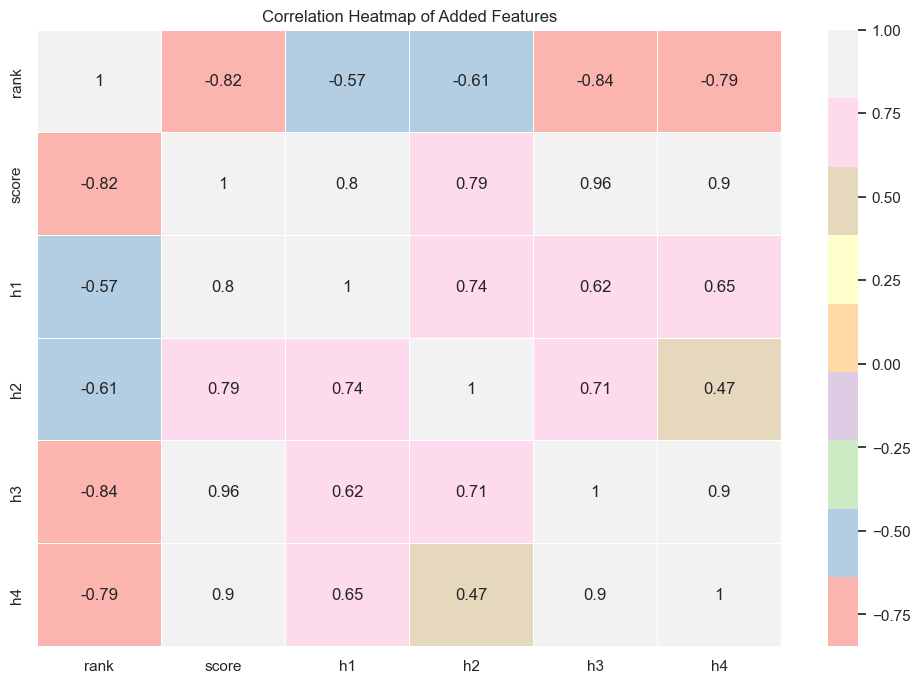

In [250]:
plt.figure(figsize=(12, 8))
sb.heatmap(scihigh.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Added Features')
scihigh.corr(method = 'spearman')

In [252]:
scihigh['h3'].describe()

count    1.000000e+05
mean     2.381857e-07
std      4.307058e-06
min      2.026850e-10
25%      5.597326e-09
50%      1.418206e-08
75%      4.897820e-08
max      6.005483e-04
Name: h3, dtype: float64

In [254]:
newscore = pd.DataFrame(scihigh['h3'])

In [256]:
Q1 = newscore.quantile(0.25)
Q3 = newscore.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
(newscore > (Q3 + 1.5 * IQR)).sum()

h3    4.338088e-08
dtype: float64


h3    14331
dtype: int64

From this, we see that 14,307 scientists in the top 100k are suitable to be considered "top top scientists". We believe that 14,307 is a somewhat acceptable amount, considering the large amount of scientists in this dataset.

In [259]:
#if scientist's rank is less than or equal to 10000 it will be 1, otherwise 0

scihigh['ultra'] = scihigh['rank'].apply(lambda x: 1 if x <= 10000 else 0)

scihigh.head(100000)


rank         score            h1            h2            h3  \
1            1  1.585626e-09  6.003521e-15  8.065239e-13  4.187892e-04   
0            2  1.097389e-09  4.350746e-15  1.163721e-12  2.767944e-04   
2            3  1.547060e-09  1.086732e-14  1.872954e-12  2.202380e-04   
3            4  1.577006e-09  5.637058e-15  8.128899e-12  4.411786e-04   
5            5  1.862466e-09  1.271360e-14  2.476684e-12  2.728401e-04   
...        ...           ...           ...           ...           ...   
93120    99996  2.298949e-12  4.593305e-16  1.074275e-14  1.150624e-08   
102597   99997  1.301443e-12  4.221352e-16  2.366260e-14  4.012349e-09   
83063    99998  9.148300e-13  4.777180e-16  7.560579e-15  1.751899e-09   
96092    99999  6.987419e-13  1.790728e-16  5.063347e-15  2.726491e-09   
94496   100000  2.645531e-12  8.267284e-16  6.783413e-14  8.465699e-09   

                  h4  ultra  
1       3.117341e-06      1  
0       1.034838e-06      1  
2       1.277872e-06      1  
3       3.059392e-07      1  
5       1.400575e-06      1  
...              ...    ...  
93120   4.919751e-10      0  
102597  7.157936e-11      0  
83063   1.106944e-10      0  
96092   9.642638e-11      0  
94496   1.031757e-10      0  

[100000 rows x 7 columns]

In [261]:
scifinal = pd.DataFrame(sci100k_impt[['h23', 'hm23', 'ncsf', 'ncsfl']])

In [263]:
scifinal['fscore'] = scihigh['h3']
scifinal['ultra'] = scihigh['ultra']
scifinal.head()

h23        hm23    ncsf   ncsfl    fscore  ultra
1  275  140.601151   41009  264116  0.000419      1
0  281  120.981965   32280  252230  0.000277      1
2  320  127.503846   37917  142359  0.000220      1
3  117   51.704883  260685  279757  0.000441      1
5  215  114.742940   75496  146494  0.000273      1

Let's use Naive Bayes classification!

Accuracy: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     17995
           1       0.90      1.00      0.94      2005

    accuracy                           0.99     20000
   macro avg       0.95      0.99      0.97     20000
weighted avg       0.99      0.99      0.99     20000



array([[17770,   225],
       [    9,  1996]])

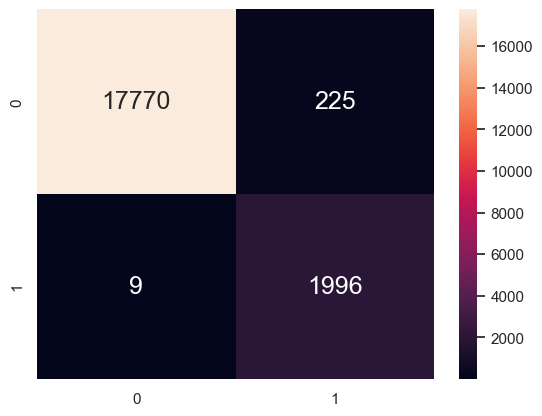

In [266]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = scifinal.drop(['fscore'], axis = 1)
y = scifinal['ultra']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a Naive Bayes classifier
# Use GaussianNB for continuous data, MultinomialNB for counts or frequency data, BernoulliNB for binary features
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
confusion_matrix(y_test, y_pred)

Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     17995
           1       0.91      0.51      0.66      2005

    accuracy                           0.95     20000
   macro avg       0.93      0.75      0.81     20000
weighted avg       0.94      0.95      0.94     20000



array([[17888,   107],
       [  973,  1032]])

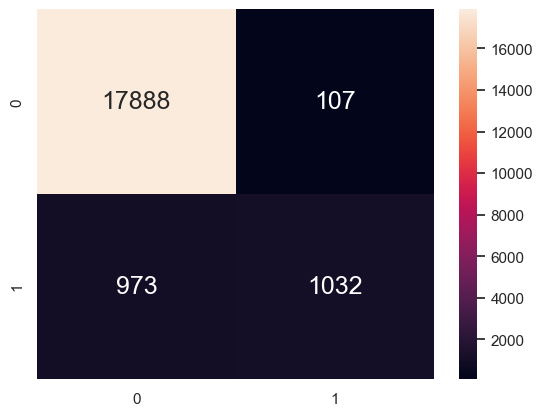

In [268]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = pd.DataFrame(scifinal['fscore'])
y = scifinal['ultra']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a Naive Bayes classifier
# Use GaussianNB for continuous data, MultinomialNB for counts or frequency data, BernoulliNB for binary features
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
confusion_matrix(y_test, y_pred)

In [270]:
def assign_ultra(x):
    if x<=5000:
        return 1
    elif 5000 < x <= 20000:
        return 2
    else:
        return 0

In [272]:
scihigh['ultramax'] = scihigh['rank'].apply(assign_ultra)

scihigh.head(20000)

rank         score            h1            h2            h3  \
1          1  1.585626e-09  6.003521e-15  8.065239e-13  4.187892e-04   
0          2  1.097389e-09  4.350746e-15  1.163721e-12  2.767944e-04   
2          3  1.547060e-09  1.086732e-14  1.872954e-12  2.202380e-04   
3          4  1.577006e-09  5.637058e-15  8.128899e-12  4.411786e-04   
5          5  1.862466e-09  1.271360e-14  2.476684e-12  2.728401e-04   
...      ...           ...           ...           ...           ...   
19125  19996  3.759622e-12  4.891519e-16  5.370888e-14  2.889645e-08   
18770  19997  5.331021e-12  4.939332e-16  2.297854e-14  5.753771e-08   
20675  19998  7.573451e-12  1.183907e-15  5.781260e-14  4.844736e-08   
19942  19999  2.920638e-12  1.857203e-16  1.825399e-14  4.592995e-08   
19449  20000  1.869319e-11  1.228603e-15  6.379928e-14  2.844169e-07   

                 h4  ultra  ultramax  
1      3.117341e-06      1         1  
0      1.034838e-06      1         1  
2      1.277872e-06      1         1  
3      3.059392e-07      1         1  
5      1.400575e-06      1         1  
...             ...    ...       ...  
19125  2.631735e-10      0         2  
18770  1.236797e-09      0         2  
20675  9.921220e-10      0         2  
19942  4.673021e-10      0         2  
19449  5.477105e-09      0         2  

[20000 rows x 8 columns]

In [274]:
scifinal['ultramax'] = scihigh['ultramax']
scifinal

h23        hm23    ncsf   ncsfl        fscore  ultra  ultramax
1       275  140.601151   41009  264116  4.187892e-04      1         1
0       281  120.981965   32280  252230  2.767944e-04      1         1
2       320  127.503846   37917  142359  2.202380e-04      1         1
3       117   51.704883  260685  279757  4.411786e-04      1         1
5       215  114.742940   75496  146494  2.728401e-04      1         1
...     ...         ...     ...     ...           ...    ...       ...
93120    55   22.198129    1883    5005  1.150624e-08      0         0
102597   50   18.201999    1430    3083  4.012349e-09      0         0
83063    24   20.416667    1867    1915  1.751899e-09      0         0
96092    51   21.441036     639    3902  2.726491e-09      0         0
94496    78   23.025841    1473    3200  8.465699e-09      0         0

[100000 rows x 7 columns]

In [276]:
scifinal['fscore'] = scifinal['fscore']/(10**5)

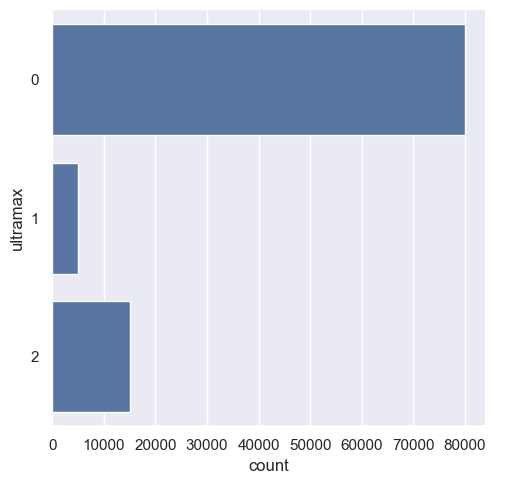

In [278]:
sb.catplot(y = "ultramax", data = scifinal, kind = "count")

In [280]:
t5k=pd.DataFrame(scifinal[:5000])
t5kt20k=pd.DataFrame(scifinal[5000:20000])
rest=pd.DataFrame(scifinal[20000:])
name=['h23','hm23','ncsf','ncsfl']

below 20k - h23 - 1.0372803306090705
ranked between 5k and 20k - h23 - 0.7472373486870959
top 5k - h23 - 1.0094273379818703


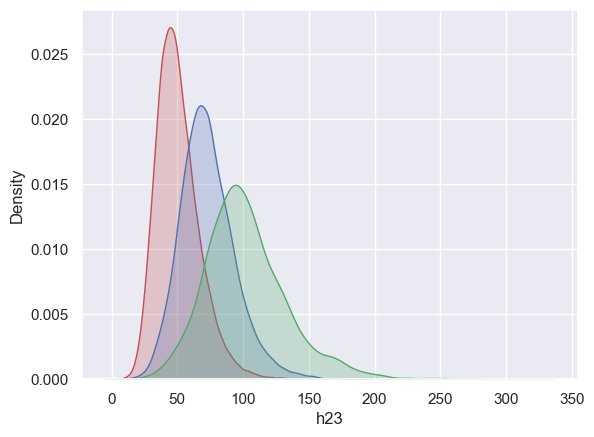

below 20k - hm23 - 0.6467973886786198
ranked between 5k and 20k - hm23 - 0.4338124641040866
top 5k - hm23 - 1.1771499040376323


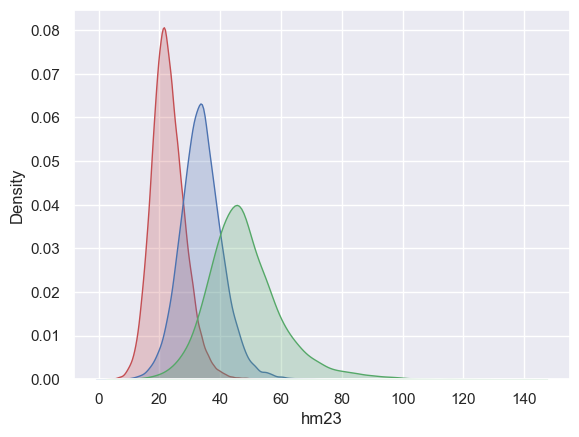

below 20k - ncsf - 7.190468949010649
ranked between 5k and 20k - ncsf - 16.15686412150817
top 5k - ncsf - 7.147297147139989


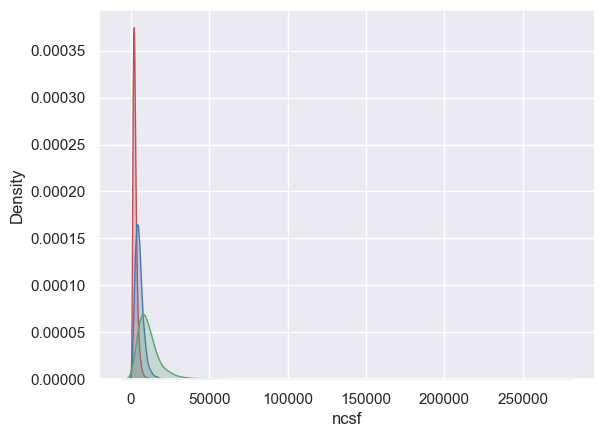

below 20k - ncsfl - 4.8353015251355425
ranked between 5k and 20k - ncsfl - 7.5533650556640195
top 5k - ncsfl - 4.34955548274442


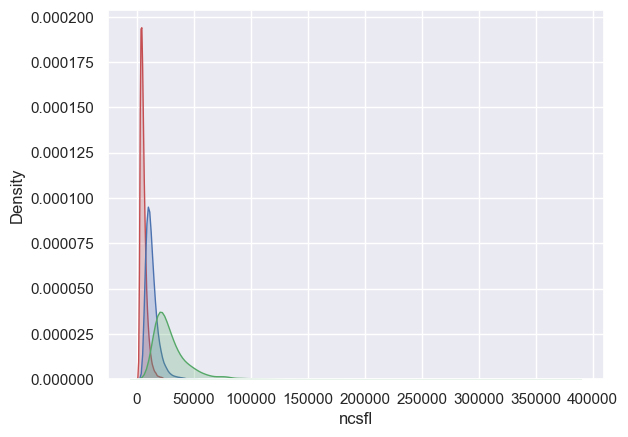

In [282]:
for var in name:
    sb.kdeplot(rest[var], fill=True, color="r")
    sb.kdeplot(t5kt20k[var], fill=True, color="b")
    sb.kdeplot(t5k[var], fill=True, color="g")
    print('below 20k -',var,'-',rest[var].skew())
    print('ranked between 5k and 20k -',var,'-',t5kt20k[var].skew())
    print('top 5k -',var,'-',t5k[var].skew())
    plt.show()

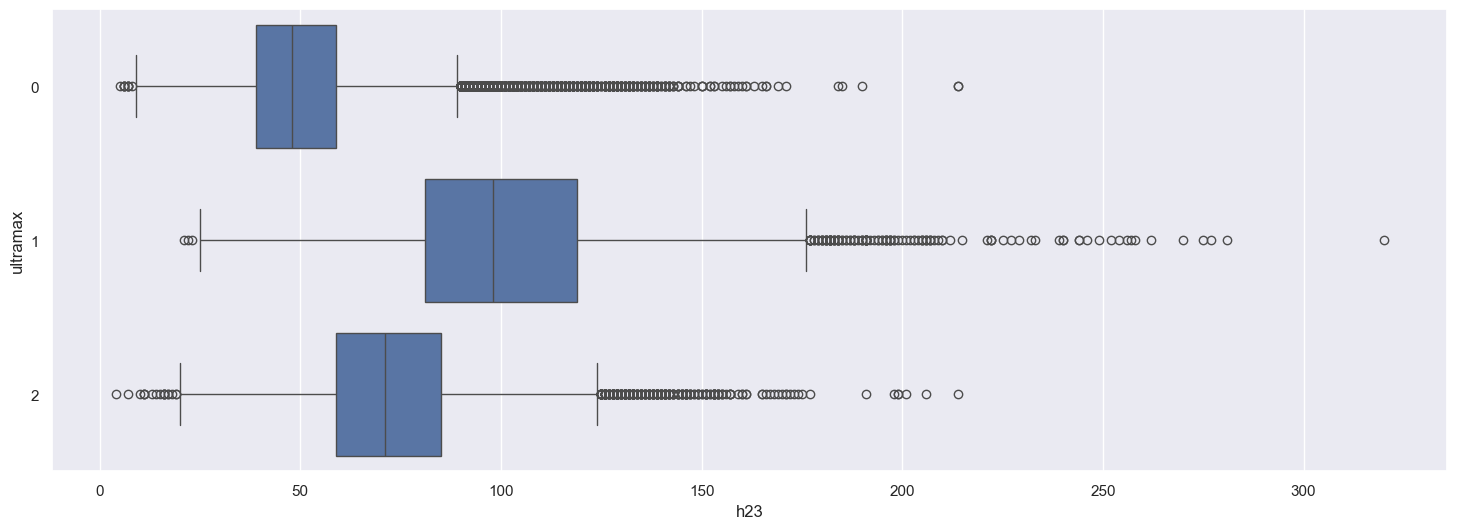

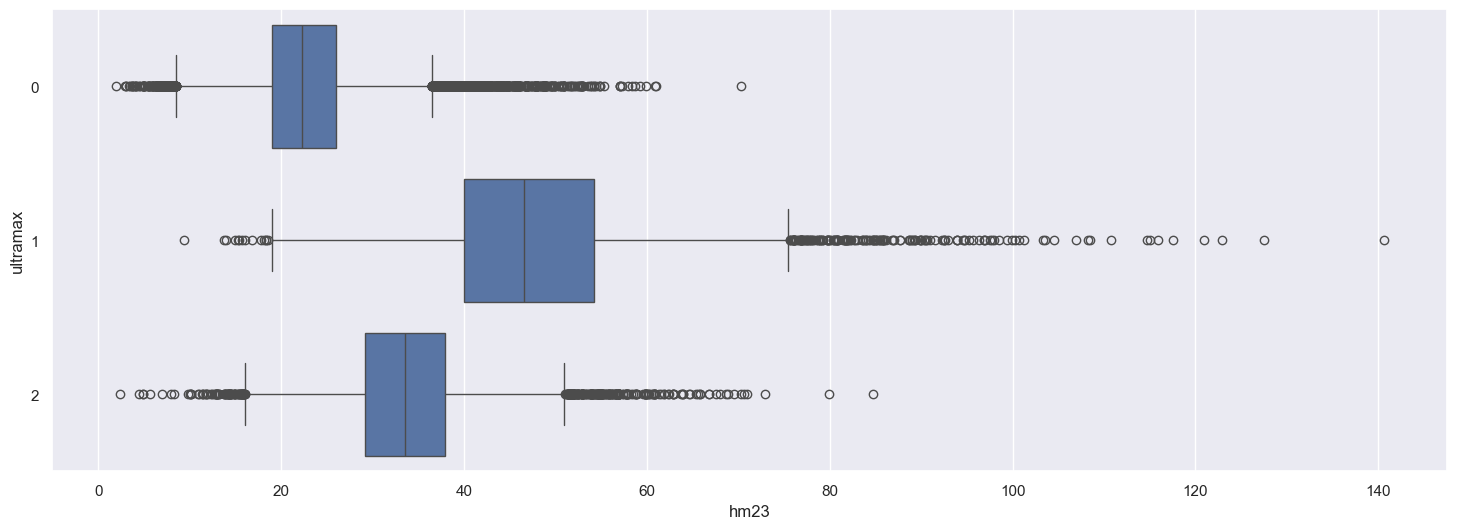

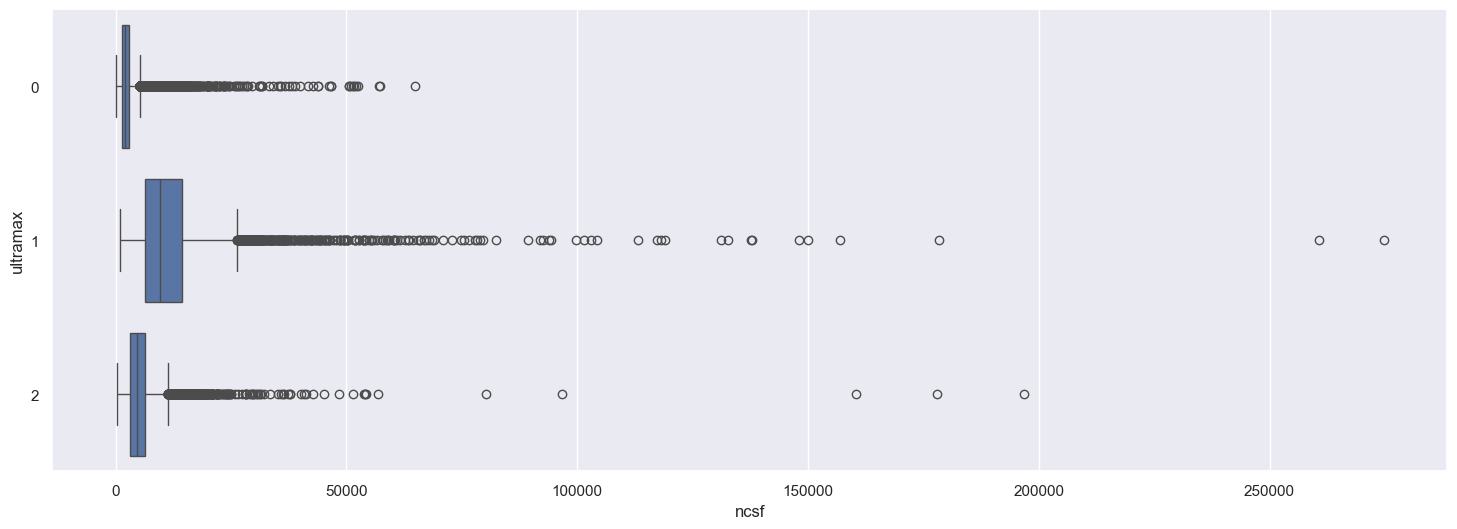

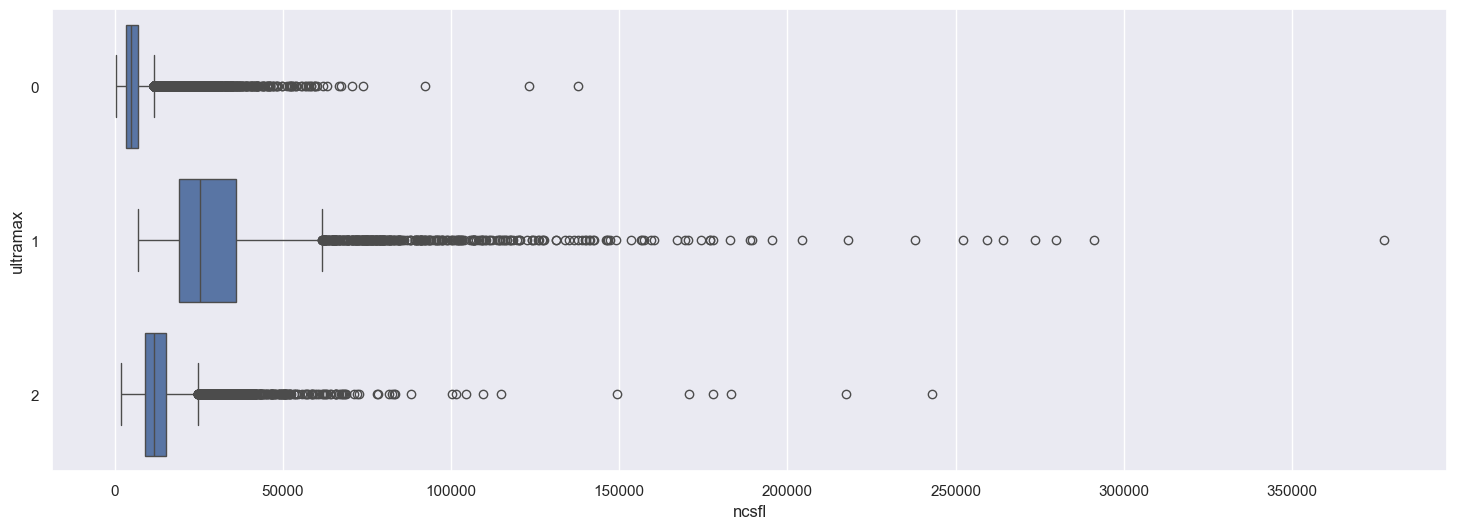

In [284]:
for var in name:
    f = plt.figure(figsize=(18, 6))
    sb.boxplot(x = var, y = "ultramax", data = scifinal, orient = "h")

Class Labels:
0: Class 0 - Ranked below 20k
1: Class 1 - Top 5k
2: Class 2 - Ranked between 5k and 20k
Accuracy: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     15982
           1       0.83      1.00      0.91       991
           2       1.00      0.99      0.99      3027

    accuracy                           0.99     20000
   macro avg       0.94      0.99      0.97     20000
weighted avg       0.99      0.99      0.99     20000



array([[15813,   169,     0],
       [    0,   991,     0],
       [    0,    32,  2995]])

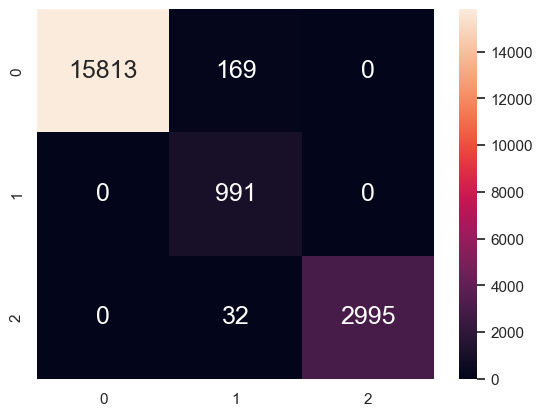

In [286]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = scifinal.drop(['fscore','ultra'], axis = 1)
y = scifinal['ultramax']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a Naive Bayes classifier
# Use GaussianNB for continuous data, MultinomialNB for counts or frequency data, BernoulliNB for binary features
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

class_labels = {
    0: "Class 0 - Ranked below 20k",
    1: "Class 1 - Top 5k",
    2: "Class 2 - Ranked between 5k and 20k",
}

print("Class Labels:")
for key, value in class_labels.items():
    print(f"{key}: {value}")
    
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
confusion_matrix(y_test, y_pred)

Class Labels:
0: Class 0 - Ranked below 20k
1: Class 1 - Top 5k
2: Class 2 - Ranked between 5k and 20k
Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     15982
           1       0.97      0.28      0.43       991
           2       0.49      0.27      0.35      3027

    accuracy                           0.85     20000
   macro avg       0.78      0.51      0.57     20000
weighted avg       0.82      0.85      0.82     20000



array([[15841,     2,   139],
       [    4,   276,   711],
       [ 2204,     8,   815]])

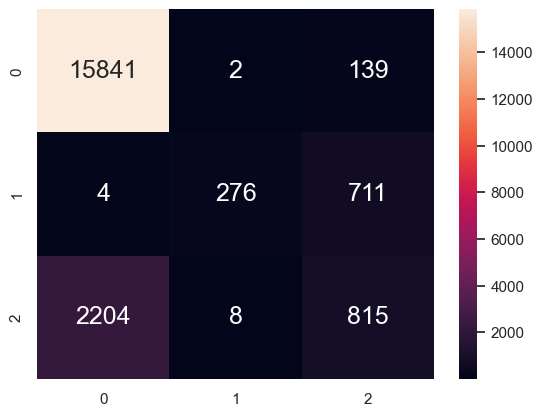

In [288]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = pd.DataFrame(scifinal['fscore'])
y = scifinal['ultramax']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a Naive Bayes classifier
# Use GaussianNB for continuous data, MultinomialNB for counts or frequency data, BernoulliNB for binary features
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

class_labels = {
    0: "Class 0 - Ranked below 20k",
    1: "Class 1 - Top 5k",
    2: "Class 2 - Ranked between 5k and 20k"
}

print("Class Labels:")
for key, value in class_labels.items():
    print(f"{key}: {value}")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cr=classification_report(y_test, y_pred)
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
confusion_matrix(y_test, y_pred)

<Axes: xlabel='fscore', ylabel='ultramax'>

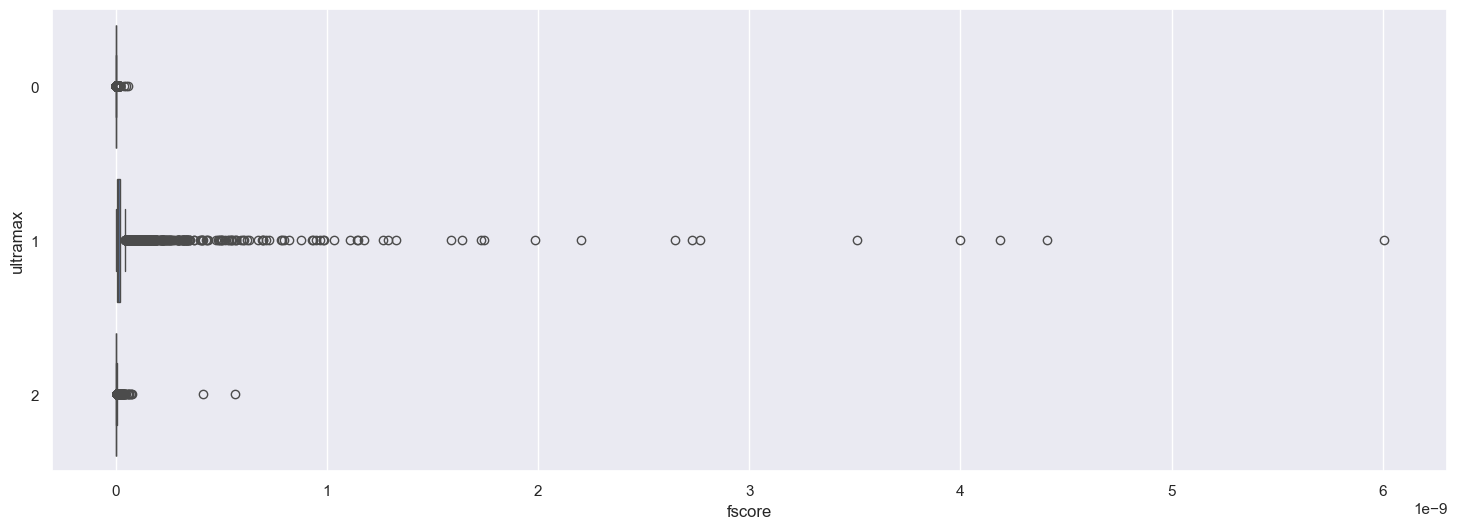

In [290]:
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = 'fscore', y = "ultramax", data = scifinal, orient = "h")

#### Conclusion

Overall, we manage to identify the key features in determining the ranking of top scientists and categorising them into distinct performance tiers with high accuracy of classification. Our new feature is a good scoring estimator of such lass or tier with the prediction accuracy of 85%. We also find that the accuracy, precision, and recall will all be higher if we have less classes, such as the scenario 'classifying only top 5000 or 10000', which might also indicate the viability or suitability of our model (i.e., the less the number of classes is, the more accurate our model will be.)